In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('plot_style.txt')

''' import libraries '''
import sys
import pycce as pc
import ase
import warnings
from mpl_toolkits import mplot3d
from ase.build import bulk
import pycce.filter
import scipy.stats as stats
from scipy.optimize import curve_fit
import matplotlib as mpl

import time

C:\Users\Daniel Low\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key "axes.titlelocation" on line 28 in
plot_style.txt.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [18]:
data_nitrogen_10_1000 = pd.read_csv('datapoints_T2_14N_conc_substi.csv')
print(data_nitrogen_10_1000)

conc = data_nitrogen_10_1000['conc']
T2_hahn = data_nitrogen_10_1000['T2_hahn']*1000
T2_err_hahn = data_nitrogen_10_1000['T2_err_hahn']

    Unnamed: 0         conc   T2_hahn  T2_err_hahn
0            0    10.000000  0.556723     0.016295
1            1    44.137931  0.556677     0.016112
2            2    78.275862  0.556723     0.016111
3            3   112.413793  0.561055     0.016092
4            4   146.551724  0.557107     0.016104
5            5   180.689655  0.561258     0.016250
6            6   214.827586  0.561276     0.016249
7            7   248.965517  0.561274     0.016249
8            8   283.103448  0.004445     0.001094
9            9   317.241379  0.561280     0.016249
10          10   351.379310  0.004772     0.000879
11          11   385.517241  0.561221     0.016250
12          12   419.655172  0.561262     0.016249
13          13   453.793103  0.561225     0.016250
14          14   487.931034  0.561100     0.016250
15          15   522.068966  0.534141     0.016605
16          16   556.206897  0.559857     0.016253
17          17   590.344828  0.301101     0.014721
18          18   624.482759  0.

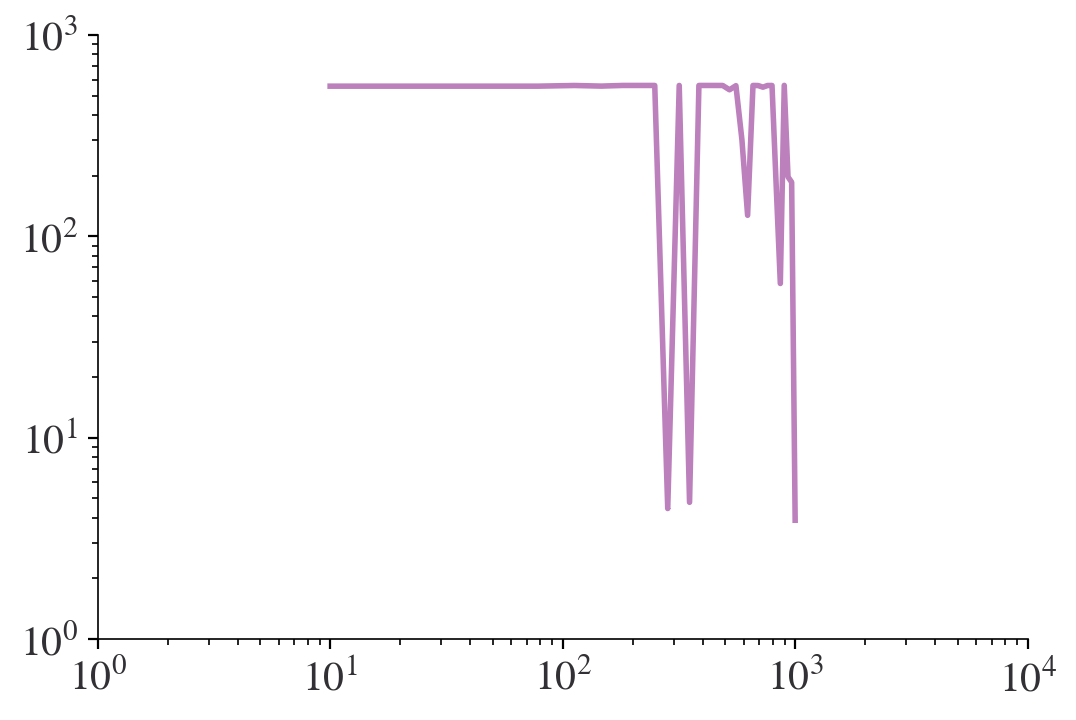

In [19]:
plt.figure()
plt.errorbar(conc, T2_hahn, yerr=T2_err_hahn)
plt.xscale('log')
plt.yscale('log')


Bad key "axes.titlelocation" on line 28 in
plot_style.txt.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


-1932.336747700003 secs for calc 1
-1890.605634200001 secs for calc 2
-1868.9777619000015 secs for calc 3


C:\Users\Daniel Low\Anaconda3\lib\site-packages\pycce\run\clusters.py:172: RuntimeWarning: overflow encountered in power
  vcalc = contribution_operator(vcalc, current_power[index])
C:\Users\Daniel Low\Anaconda3\lib\site-packages\pycce\run\clusters.py:174: RuntimeWarning: invalid value encountered in multiply
  result = result_operator(result, vcalc)


-2278.3000178 secs for calc 4
-2283.972800399999 secs for calc 5
-2419.1404440999977 secs for calc 6
-2063.8873262000016 secs for calc 7
-2275.2283989999996 secs for calc 8
-2469.0684144000043 secs for calc 9
-2589.4060492999997 secs for calc 10
-2603.521911900003 secs for calc 11
-2179.566794999999 secs for calc 12
-2086.104946899999 secs for calc 13
-2022.0401540999956 secs for calc 14
-2001.1614763000034 secs for calc 15
-2071.599207499996 secs for calc 16
-2196.7451370000053 secs for calc 17
-3456.3553646 secs for calc 18
-3010.9320107999956 secs for calc 19
-2245.4928128999964 secs for calc 20
-2271.372424100002 secs for calc 21


C:\Users\Daniel Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-2303.954067499988 secs for calc 22
-2488.94174200001 secs for calc 23
-2397.24354879999 secs for calc 24
-2516.355978700012 secs for calc 25
-2610.9413738000003 secs for calc 26
-2730.995141499996 secs for calc 27
-2783.024873699993 secs for calc 28
-2684.4224459000106 secs for calc 29
-2869.011100799995 secs for calc 30


C:\Users\Daniel Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:219: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


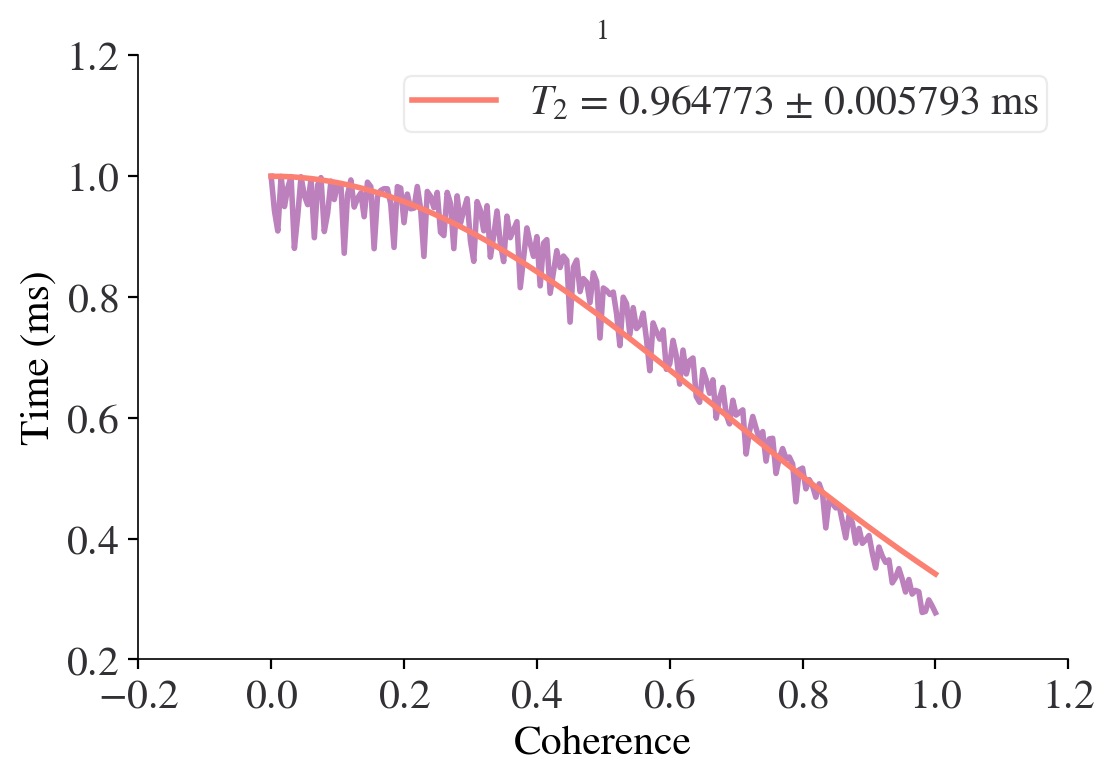

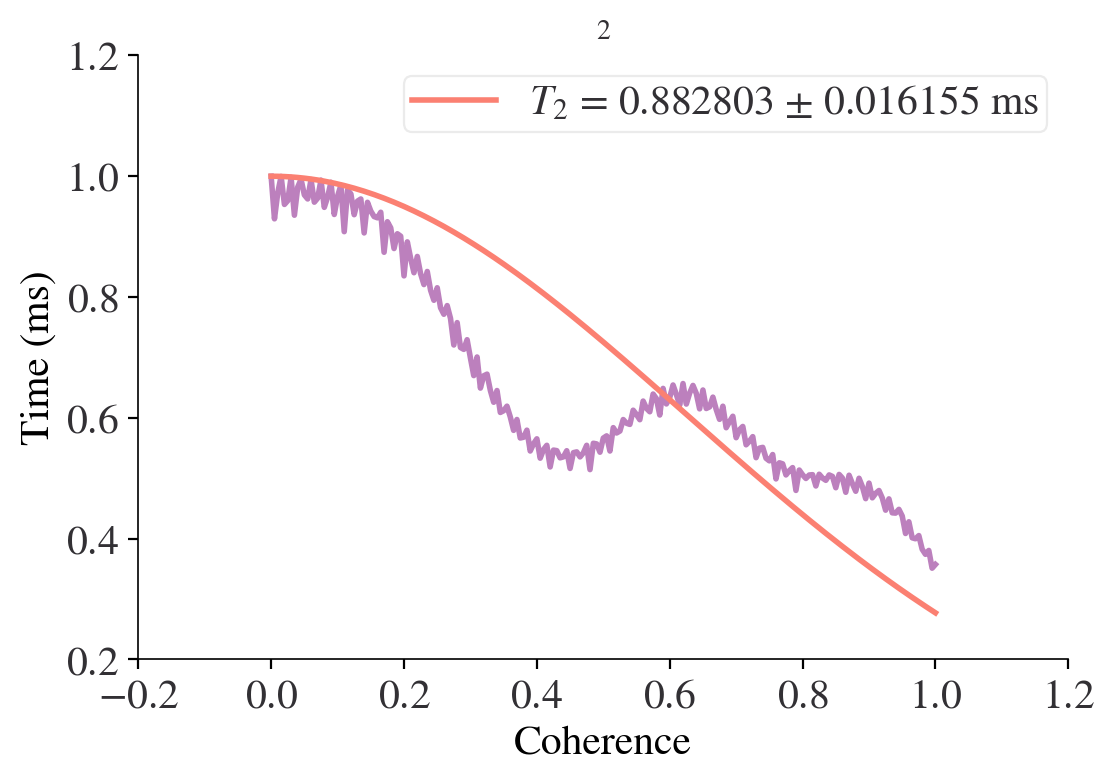

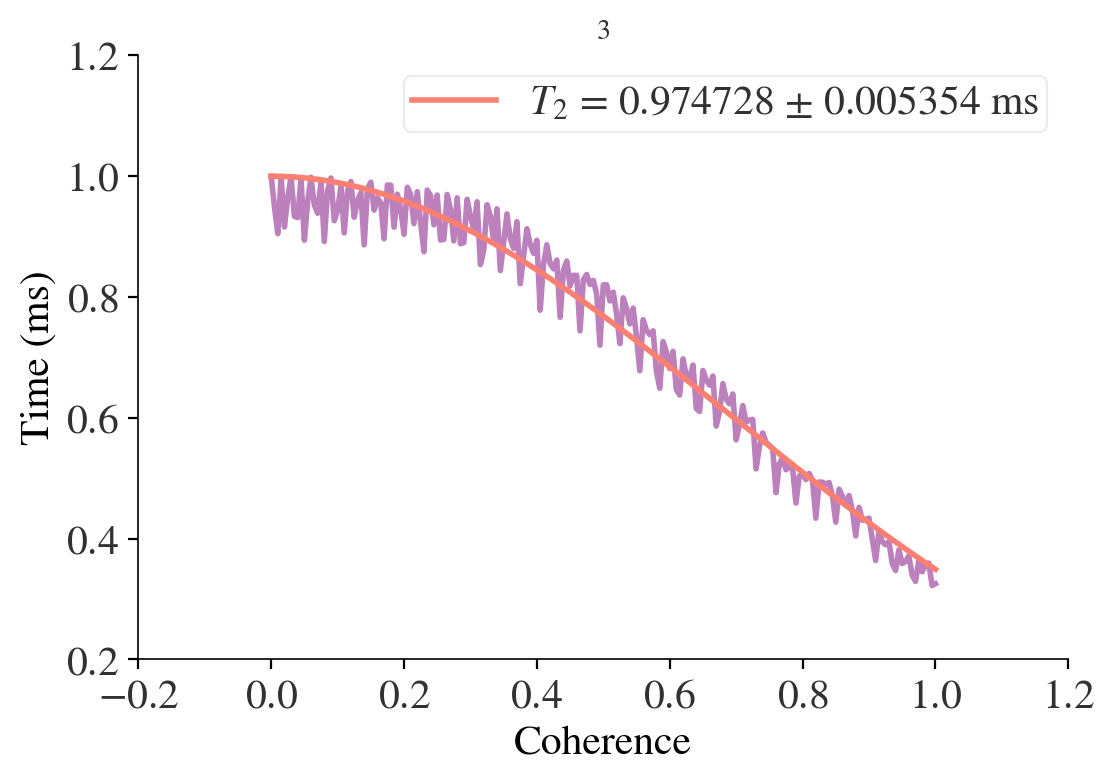

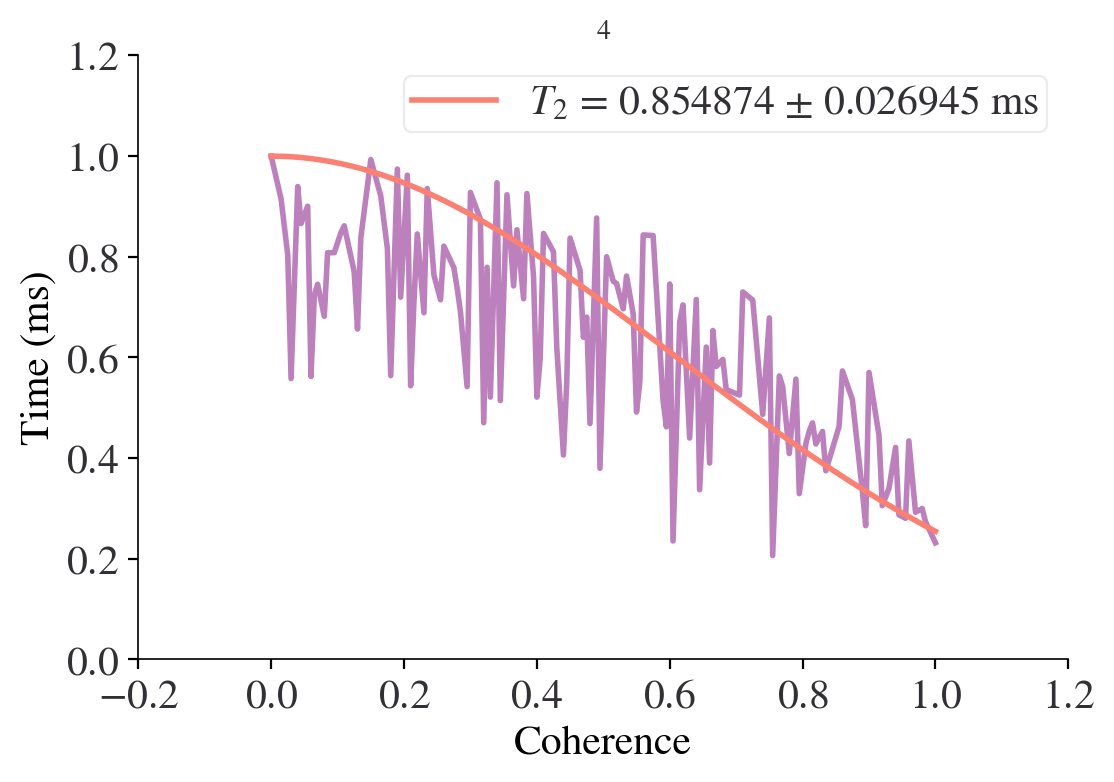

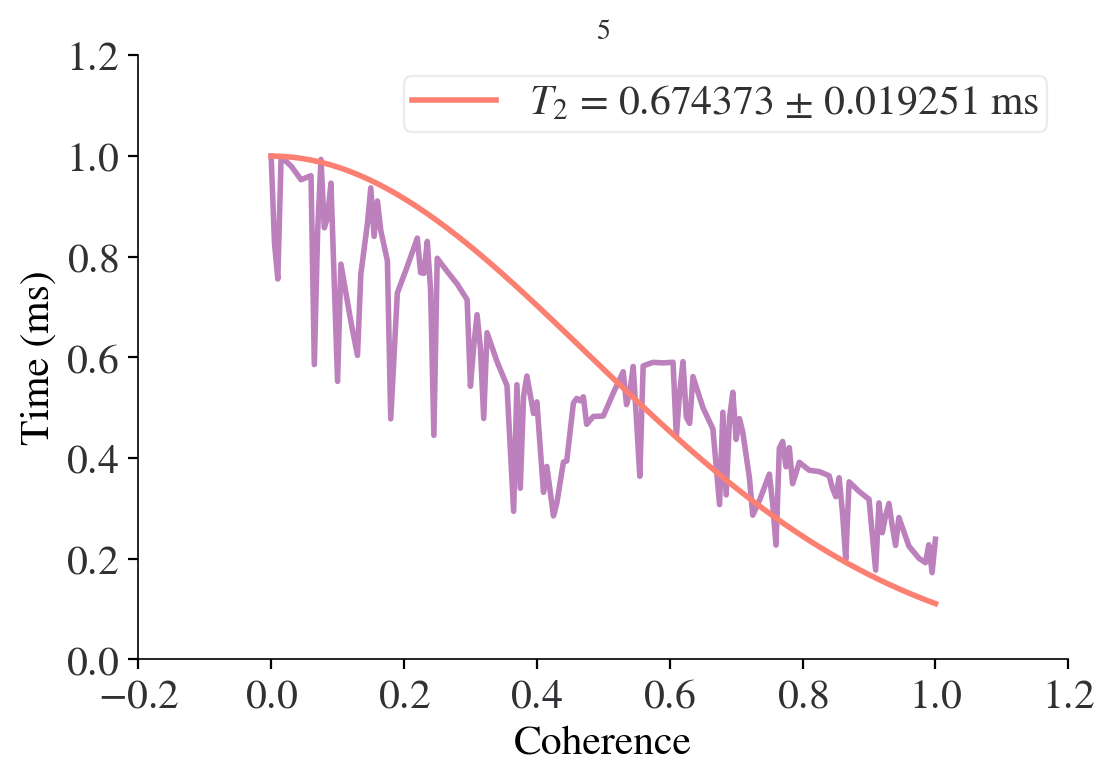

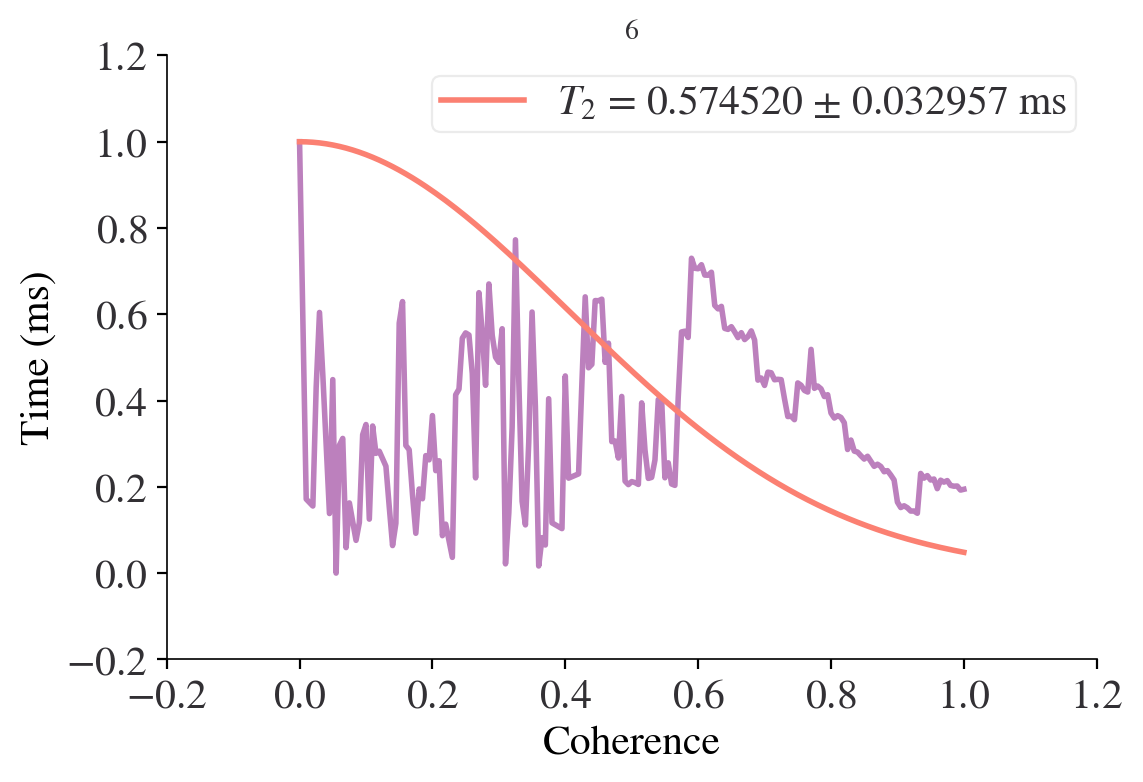

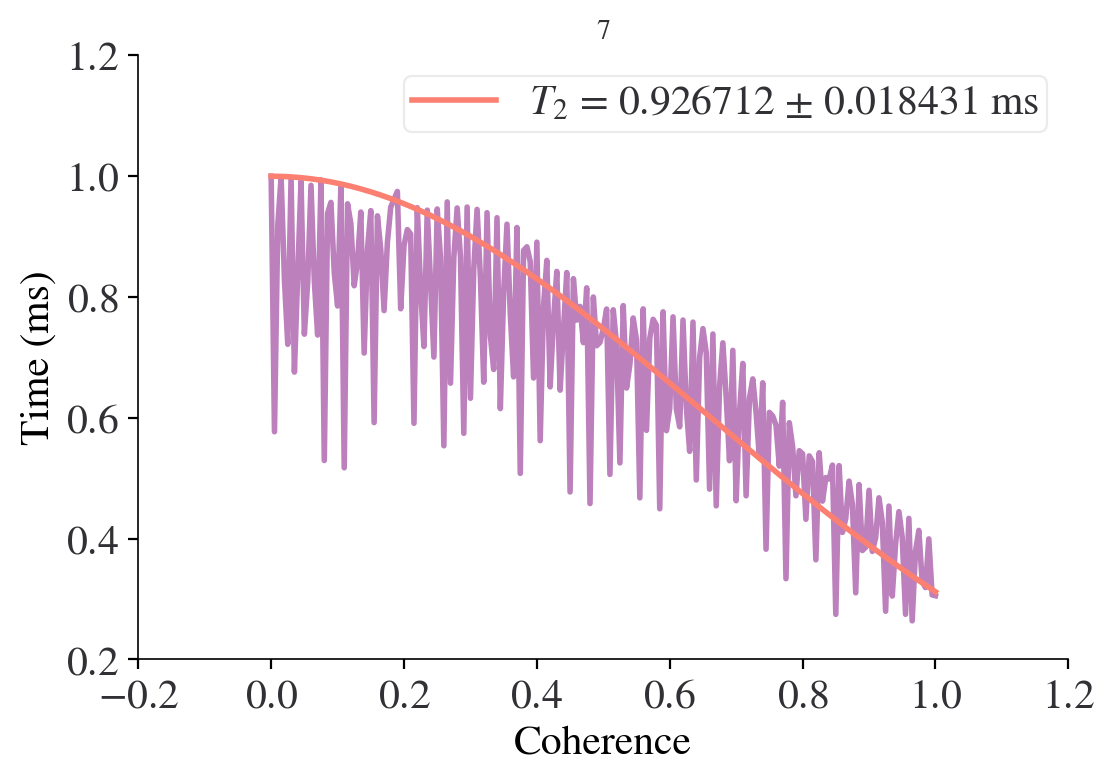

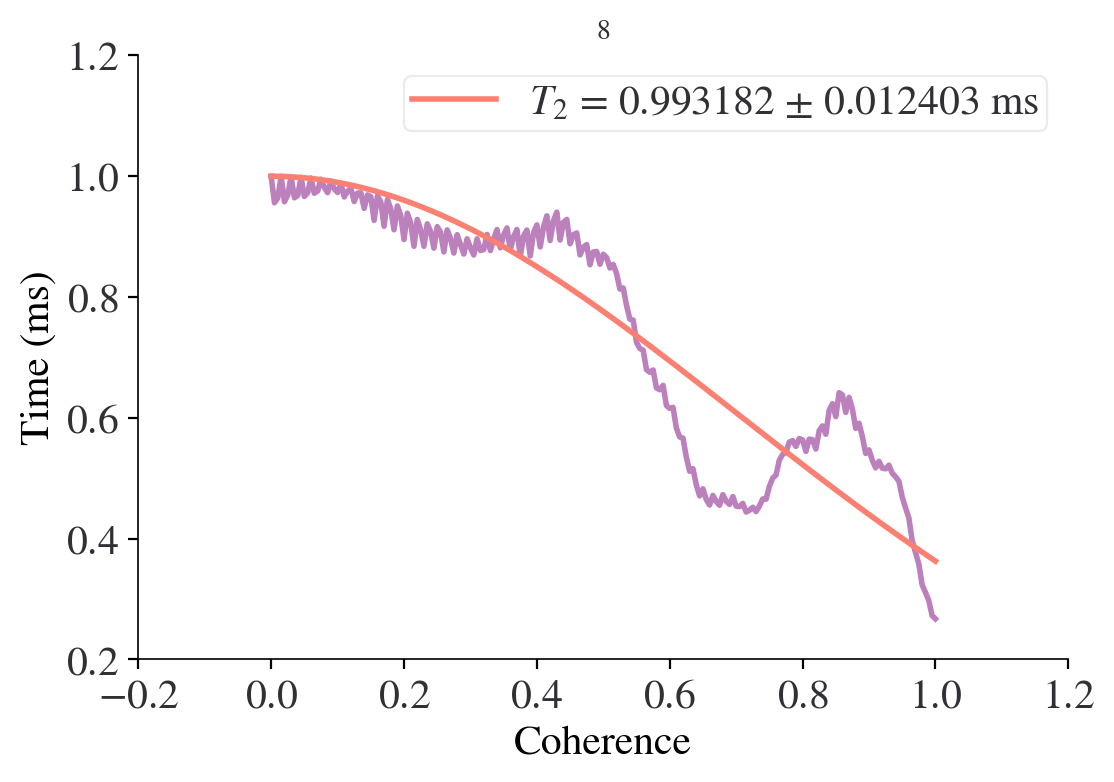

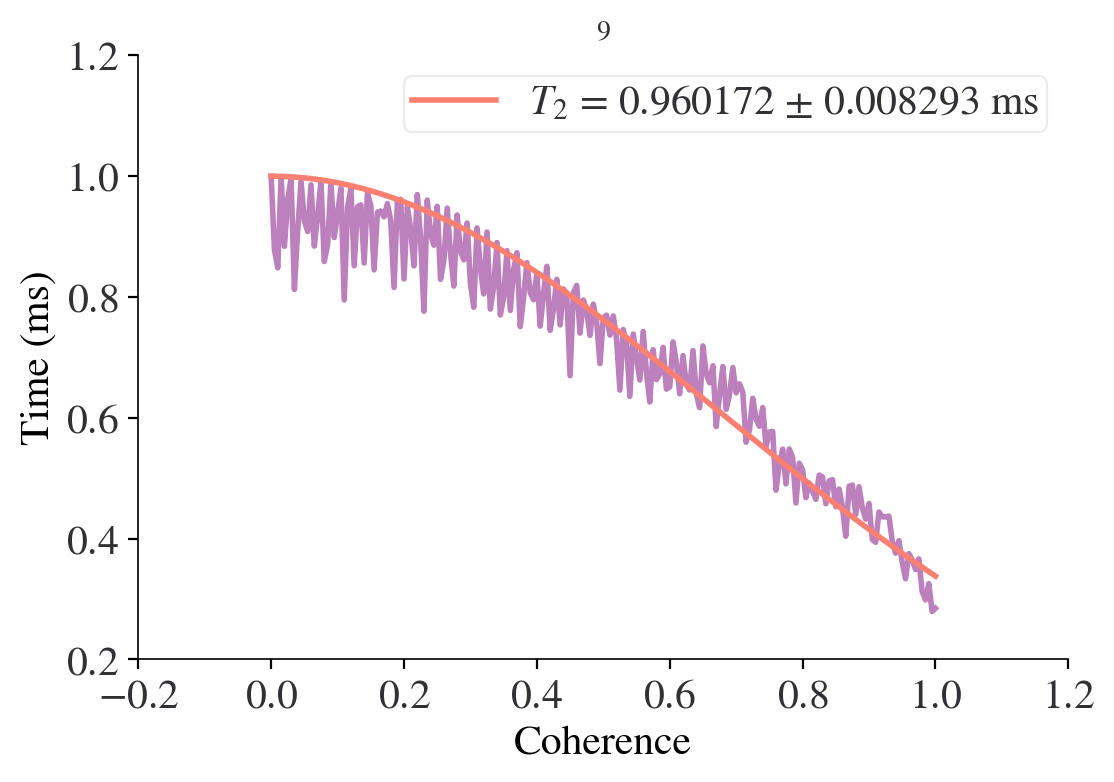

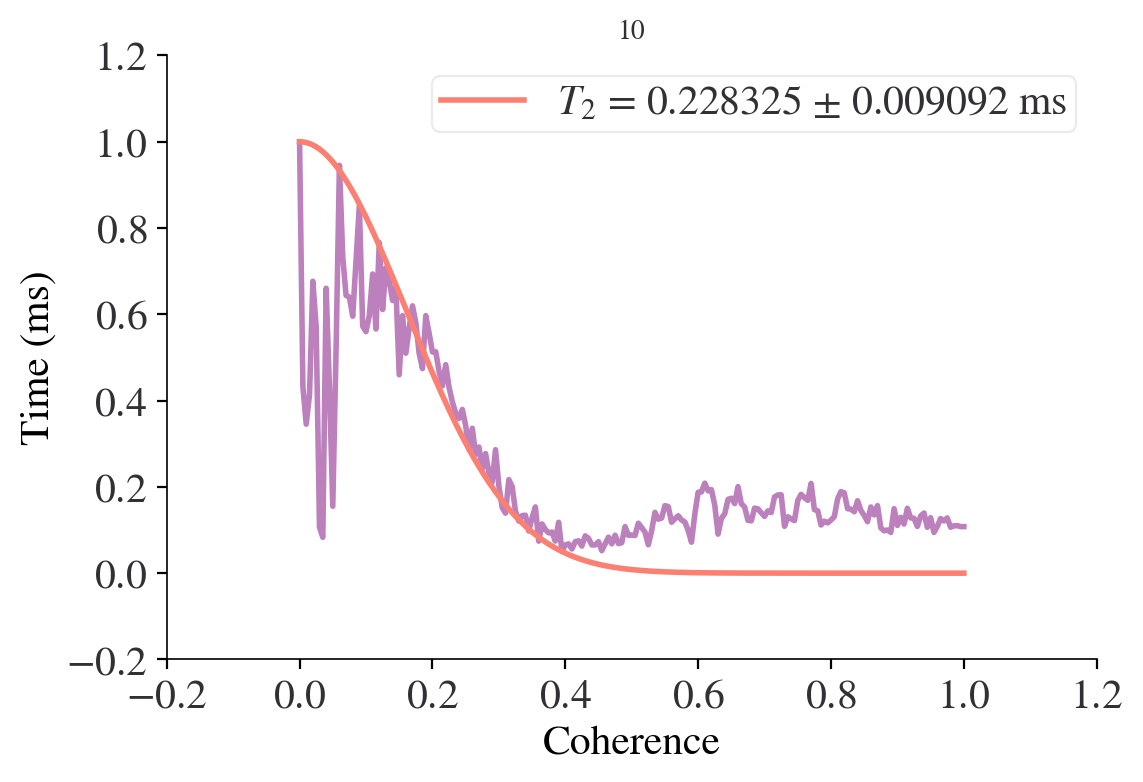

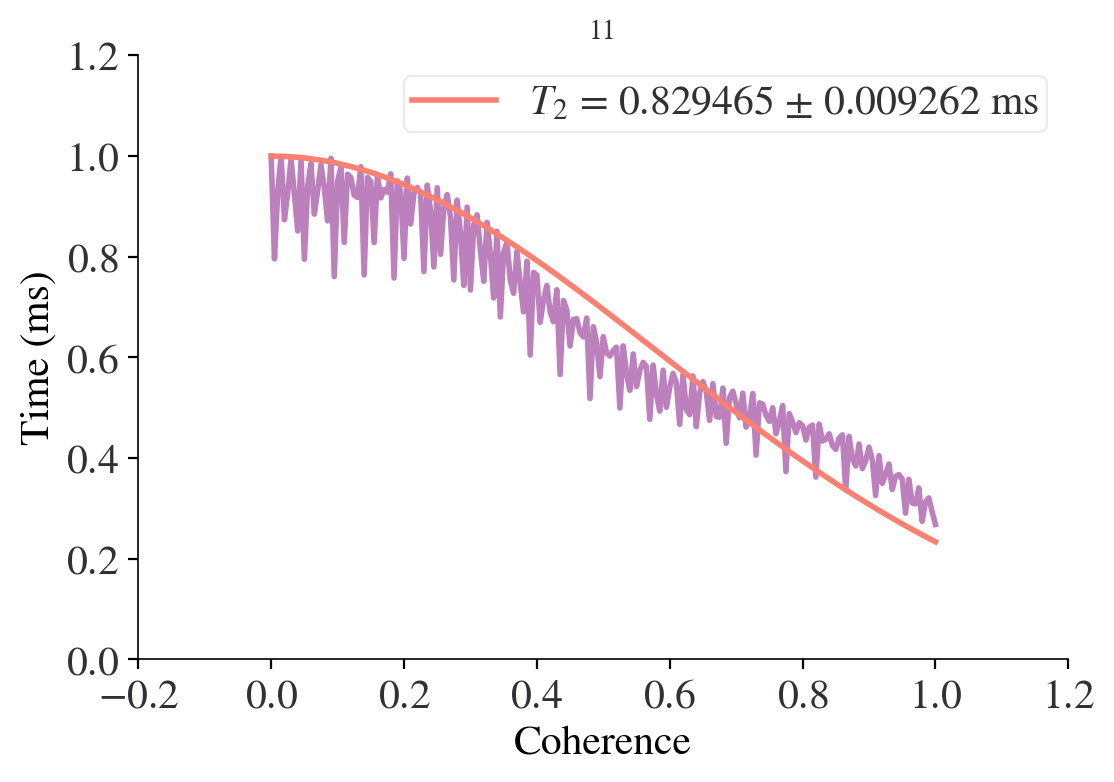

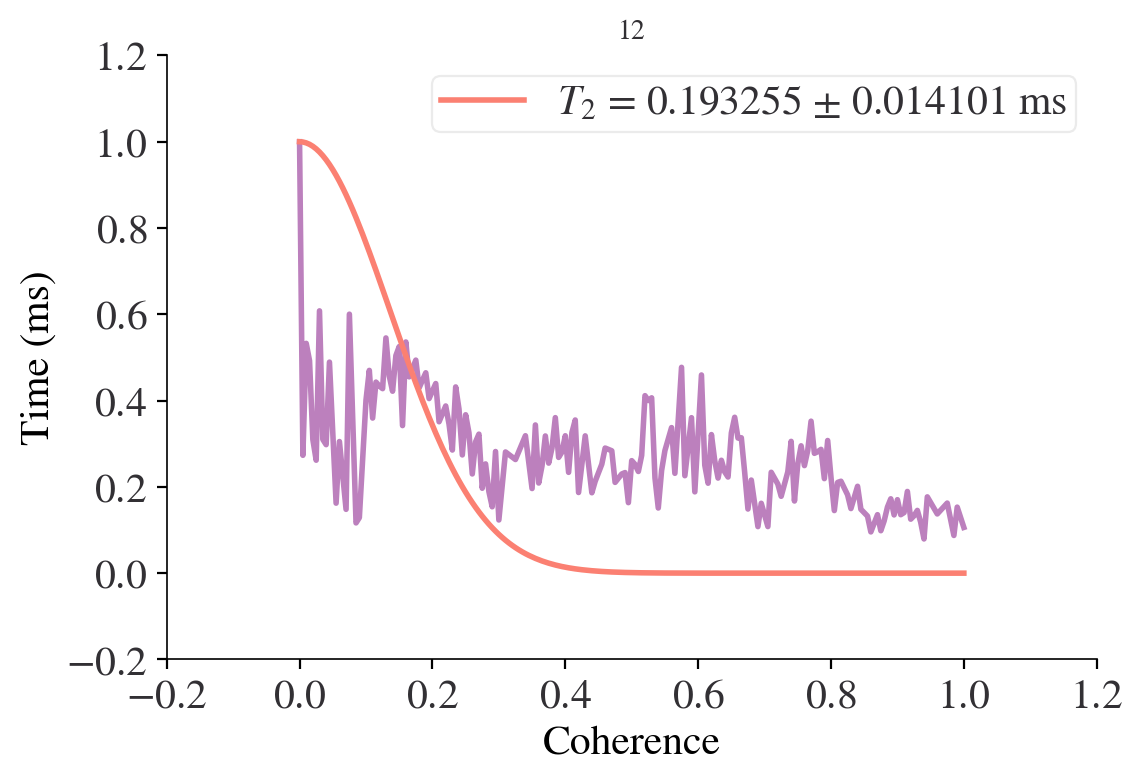

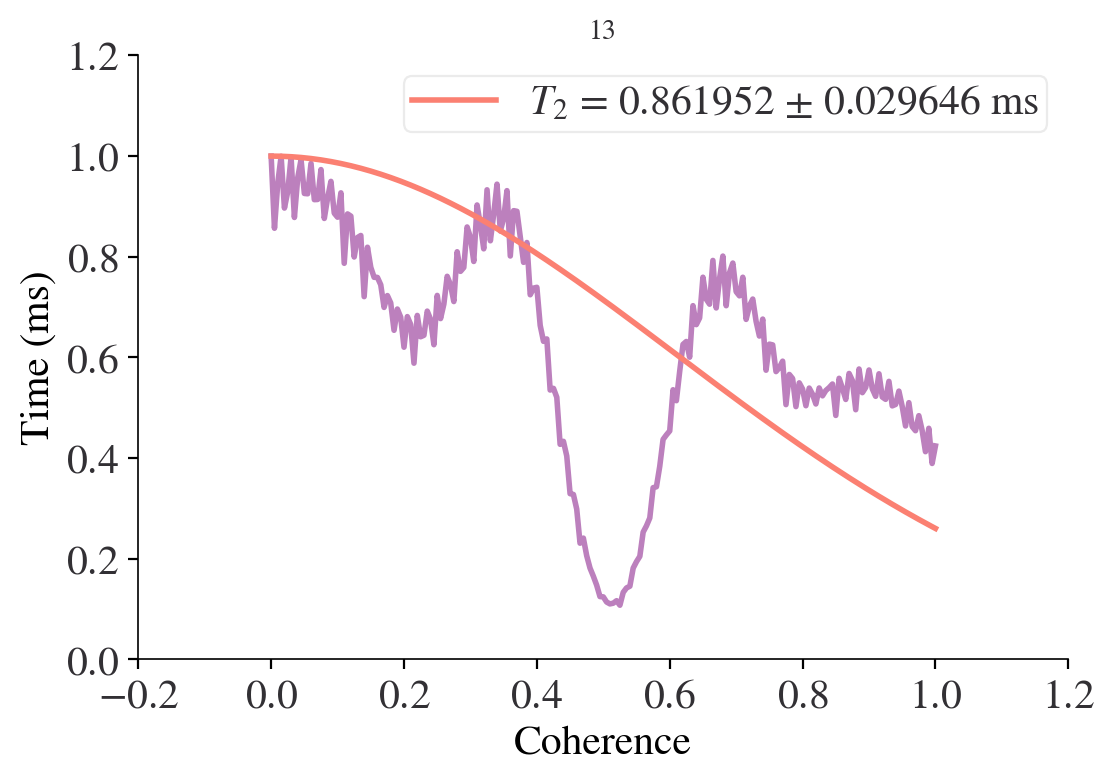

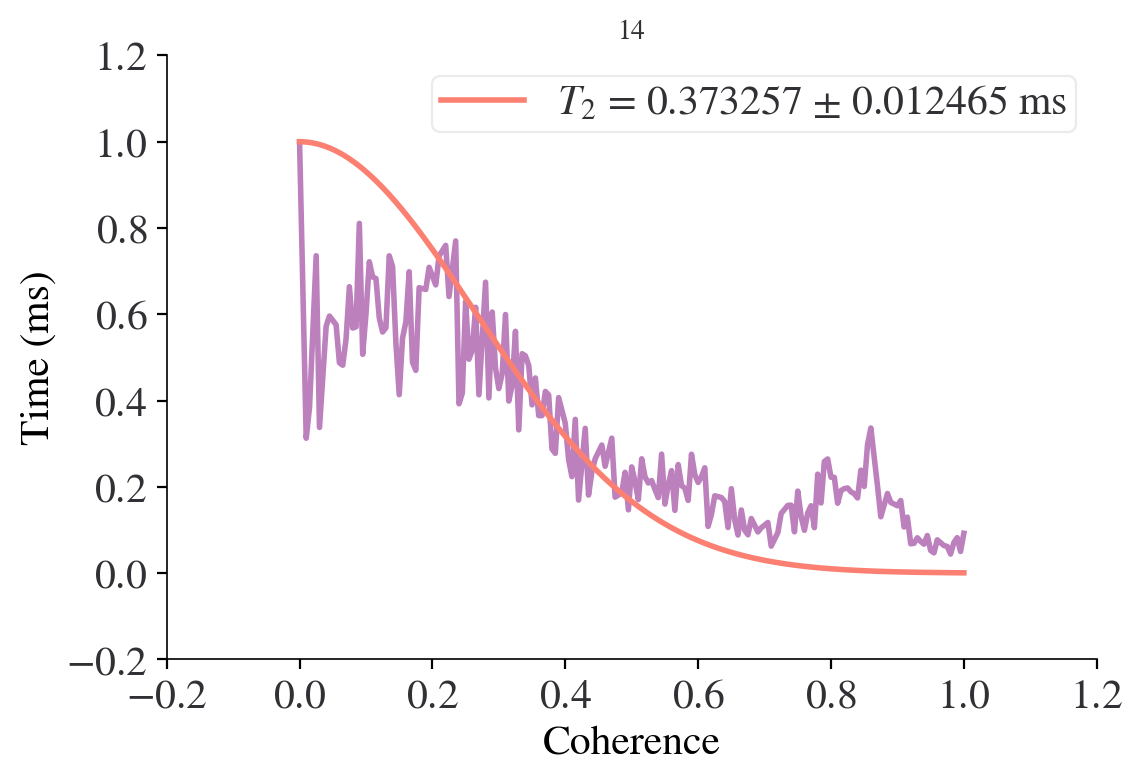

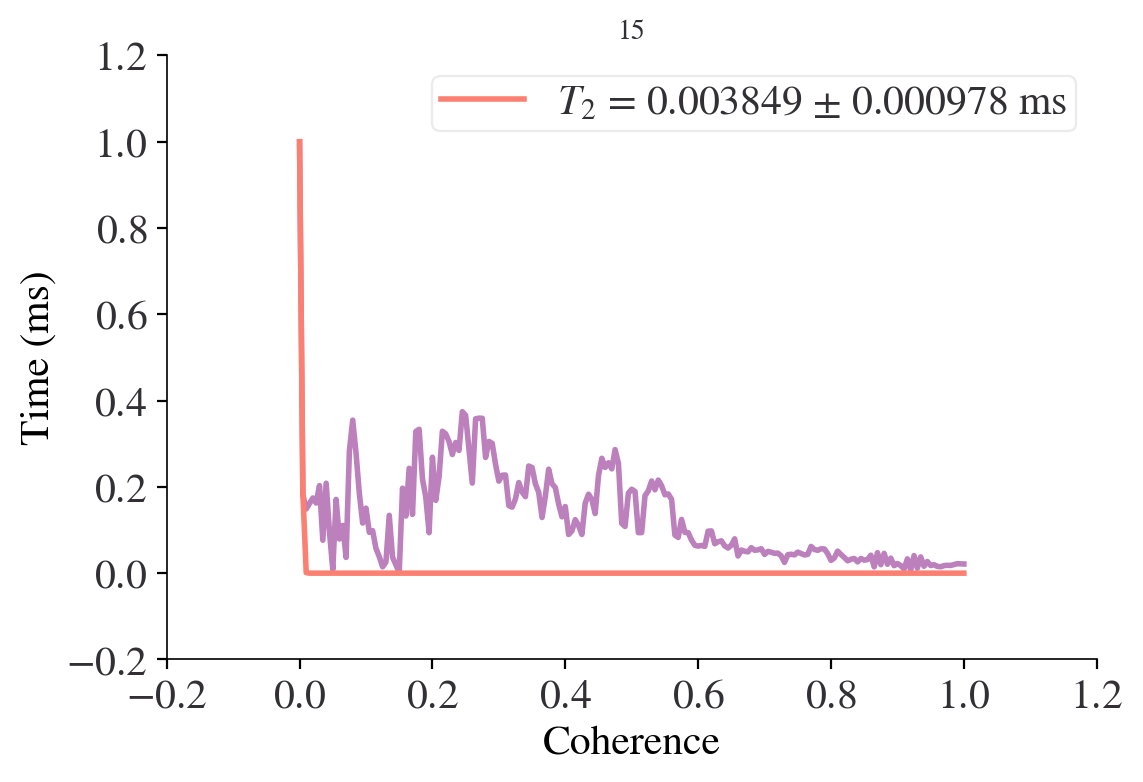

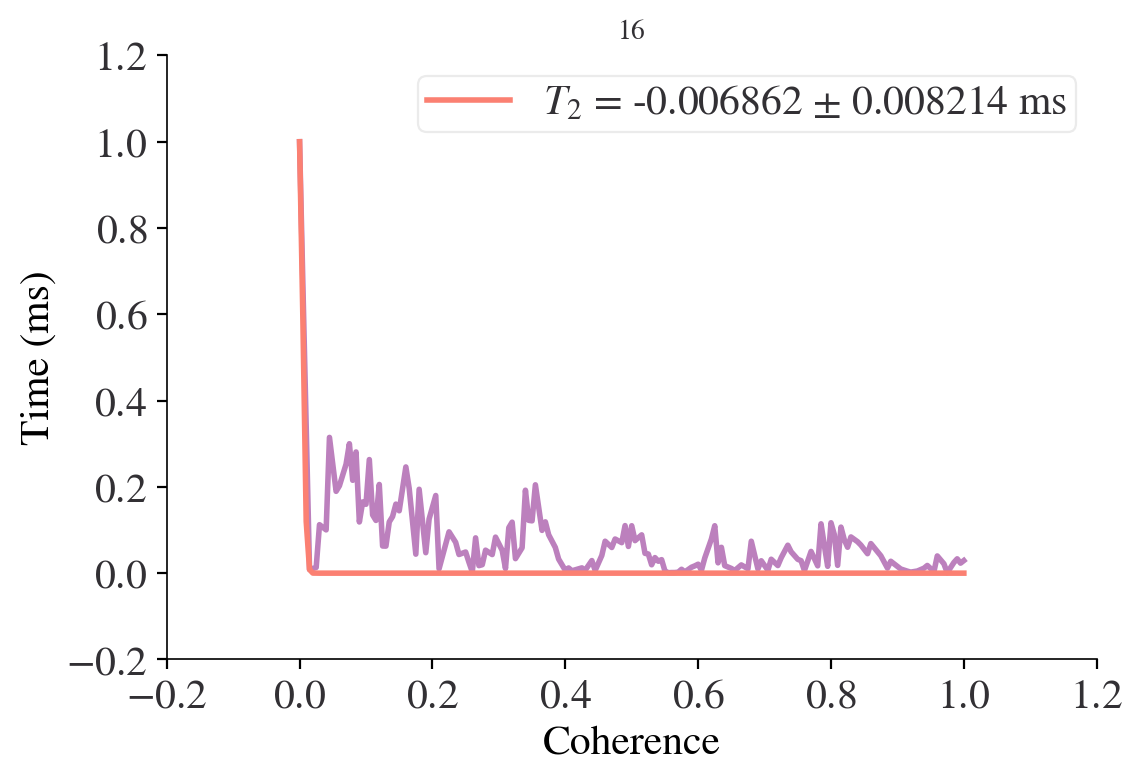

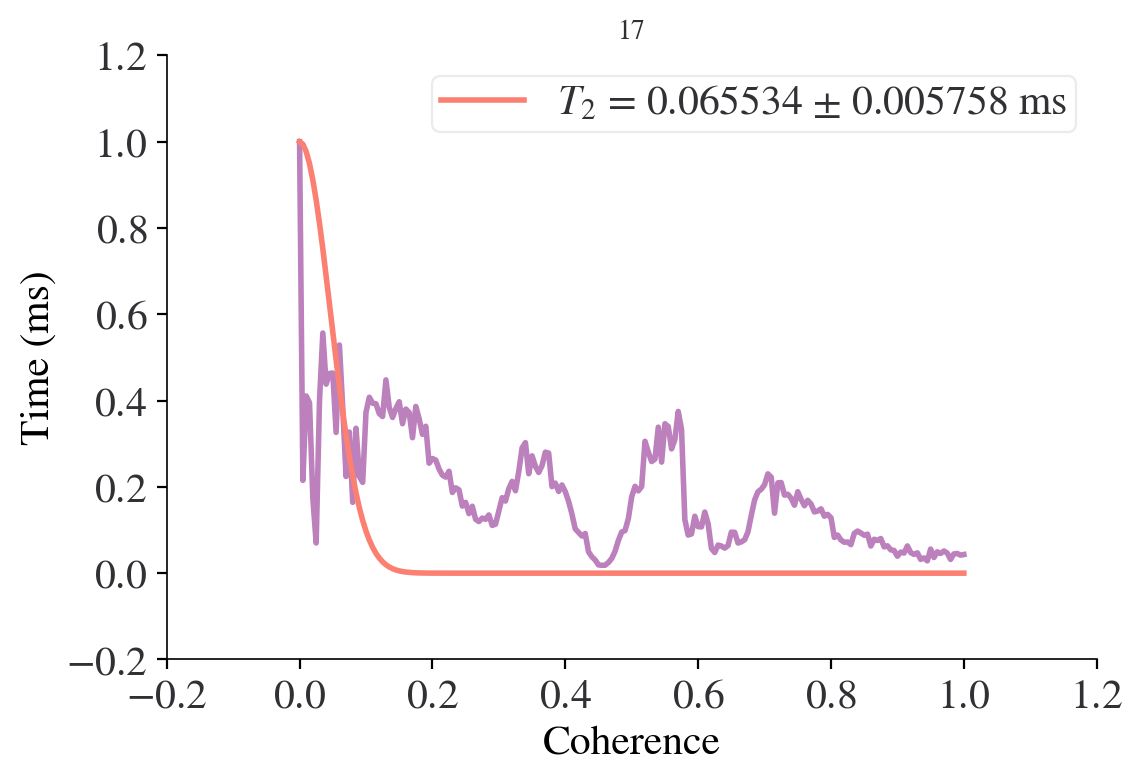

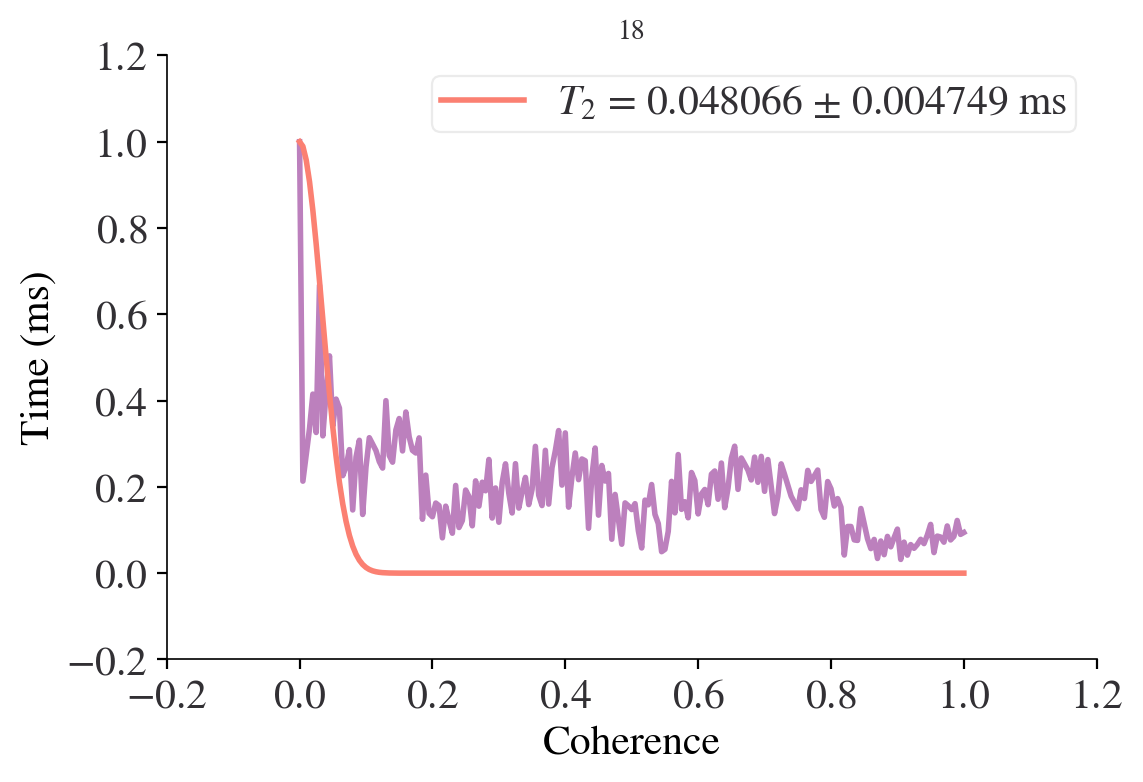

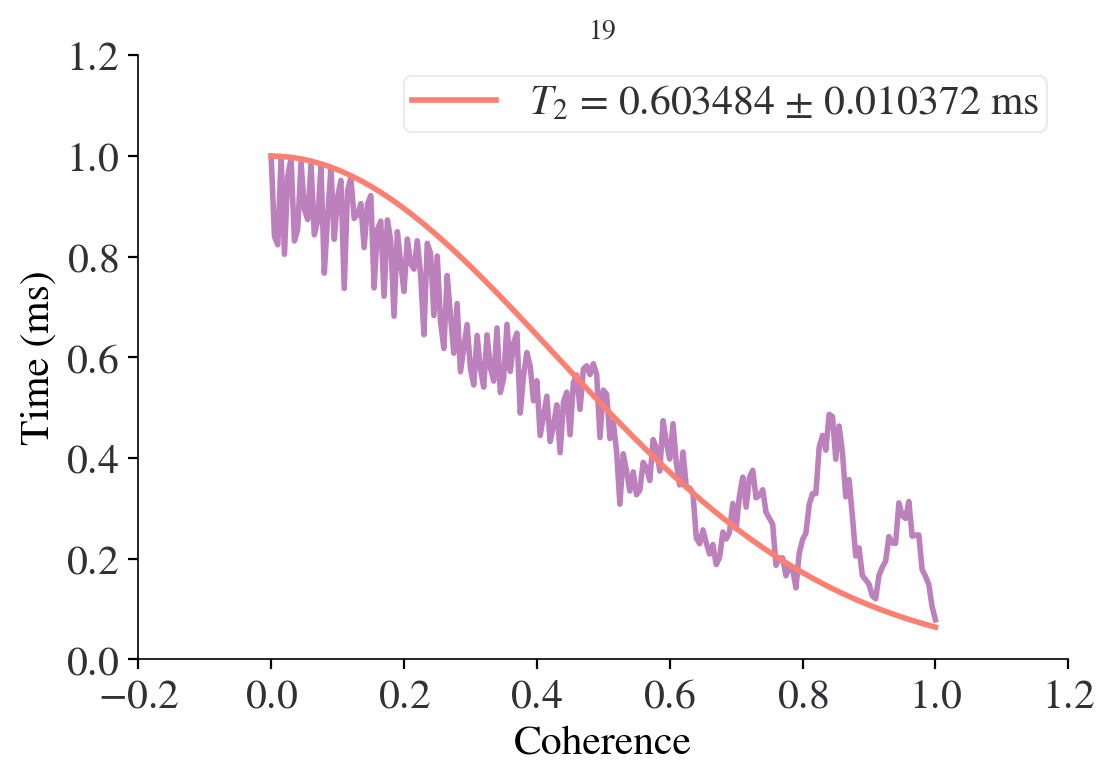

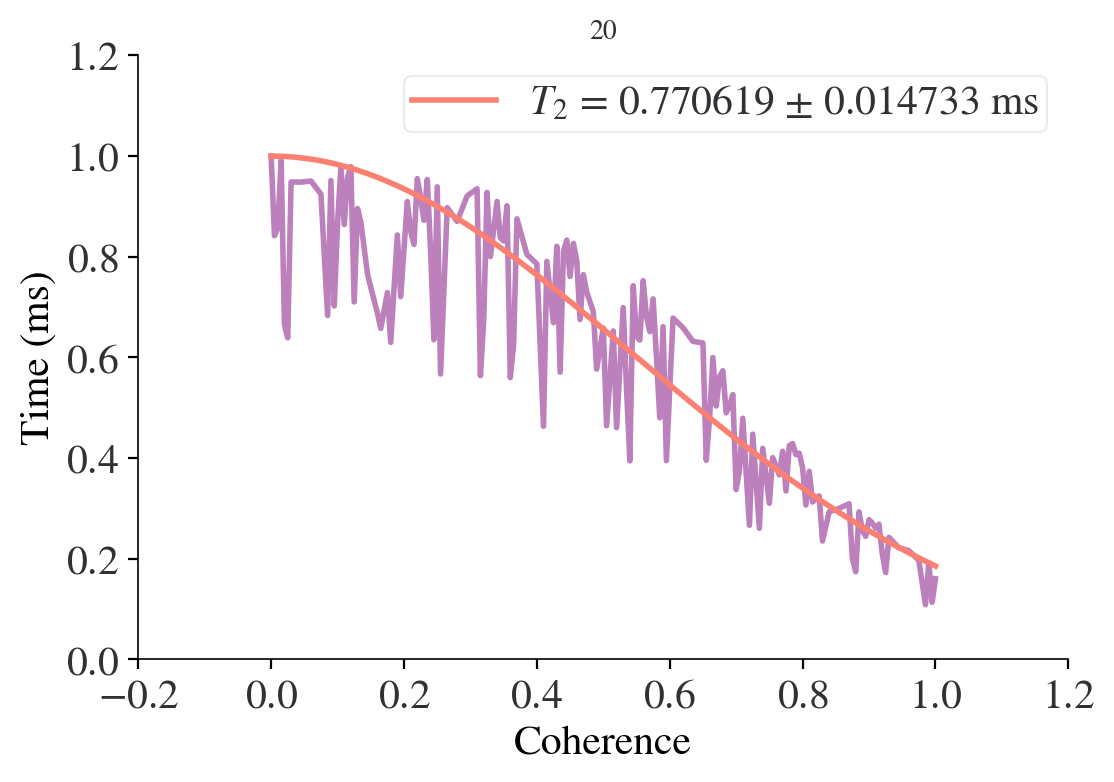

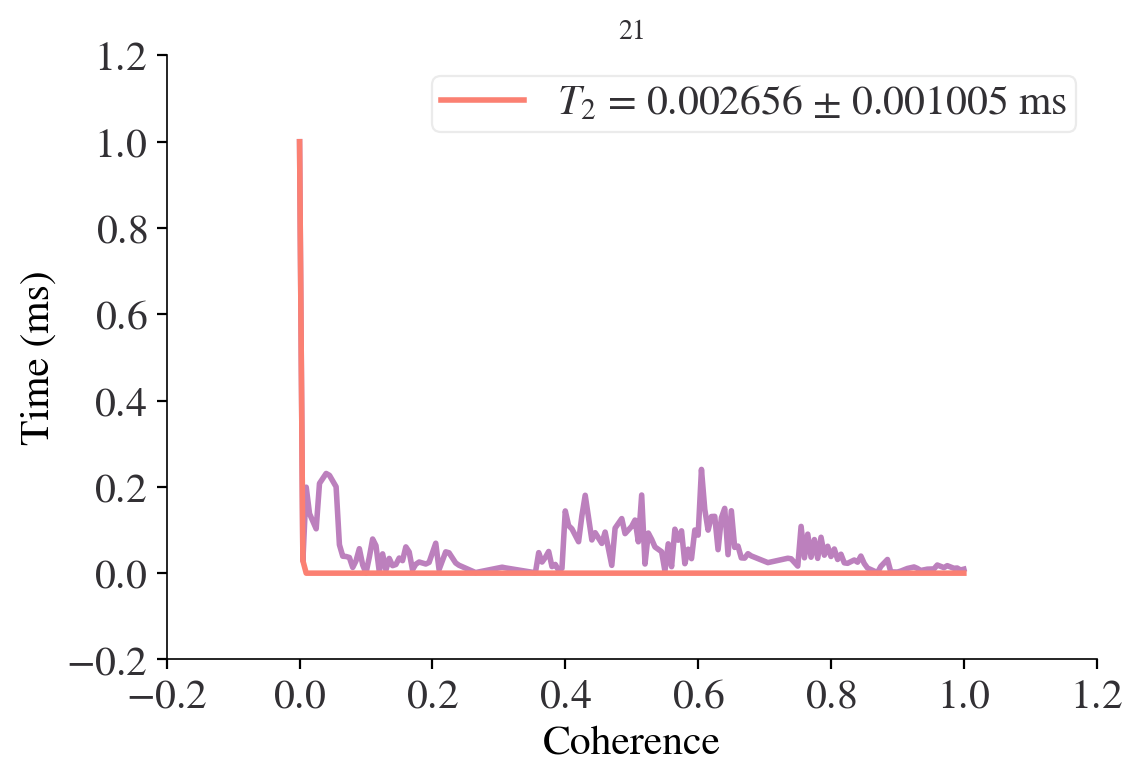

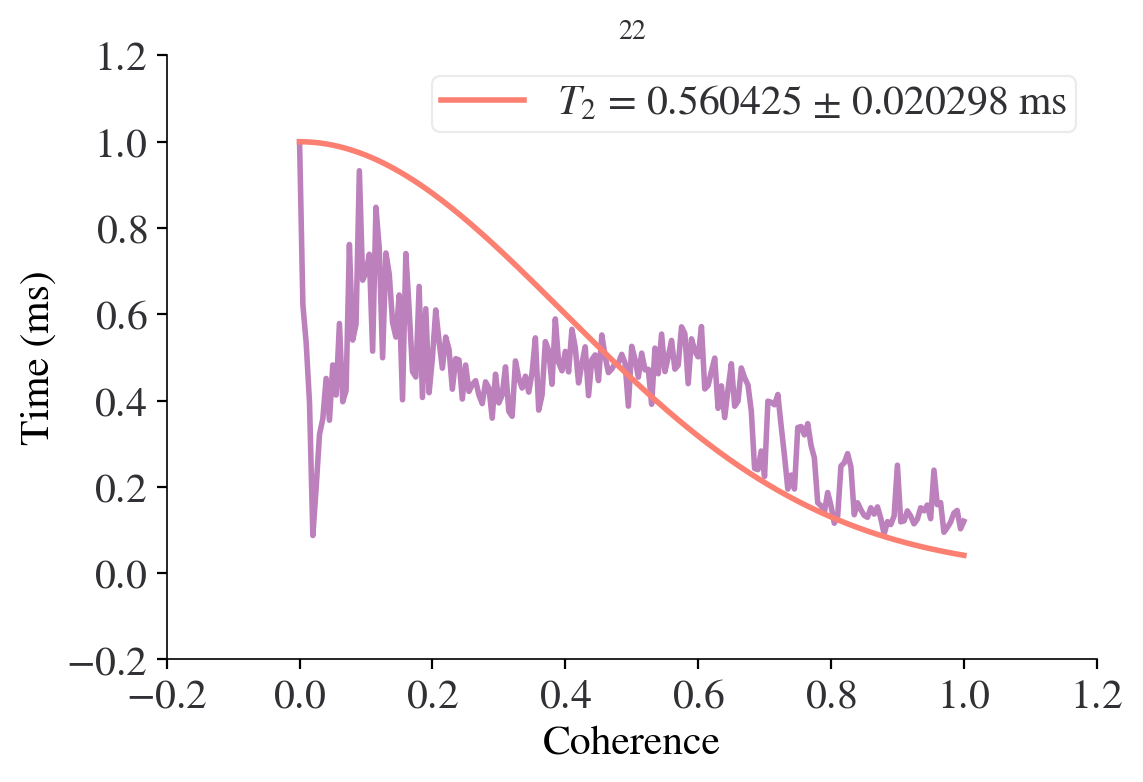

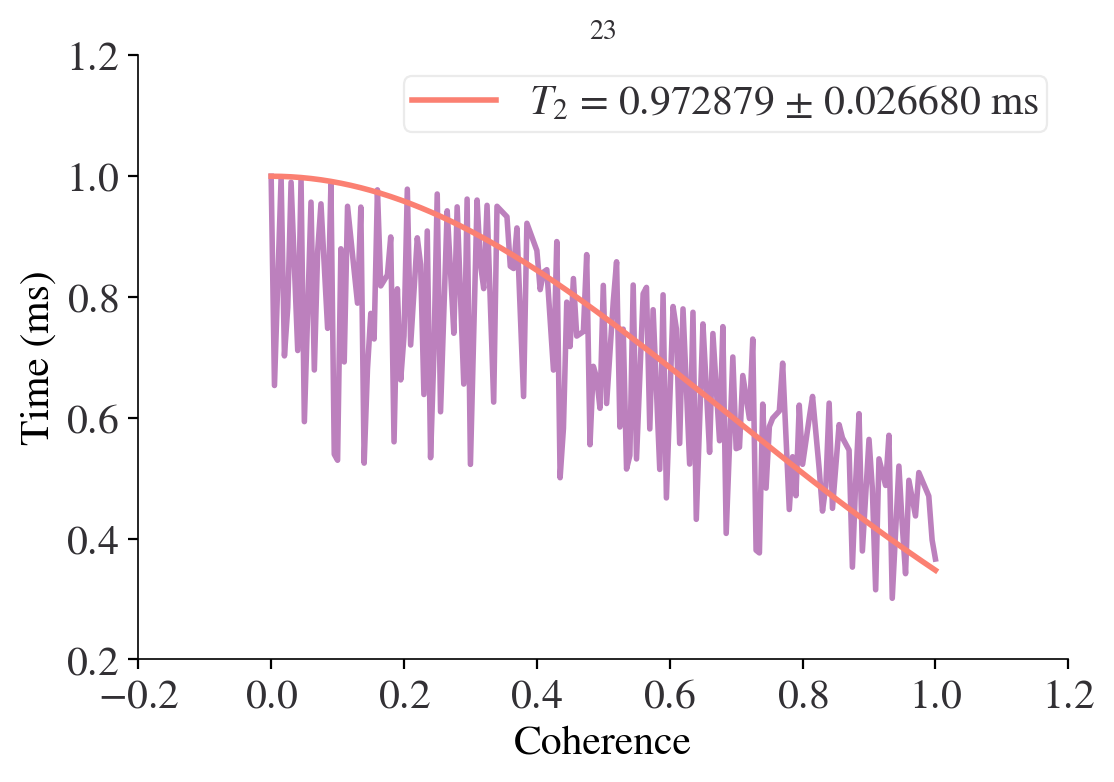

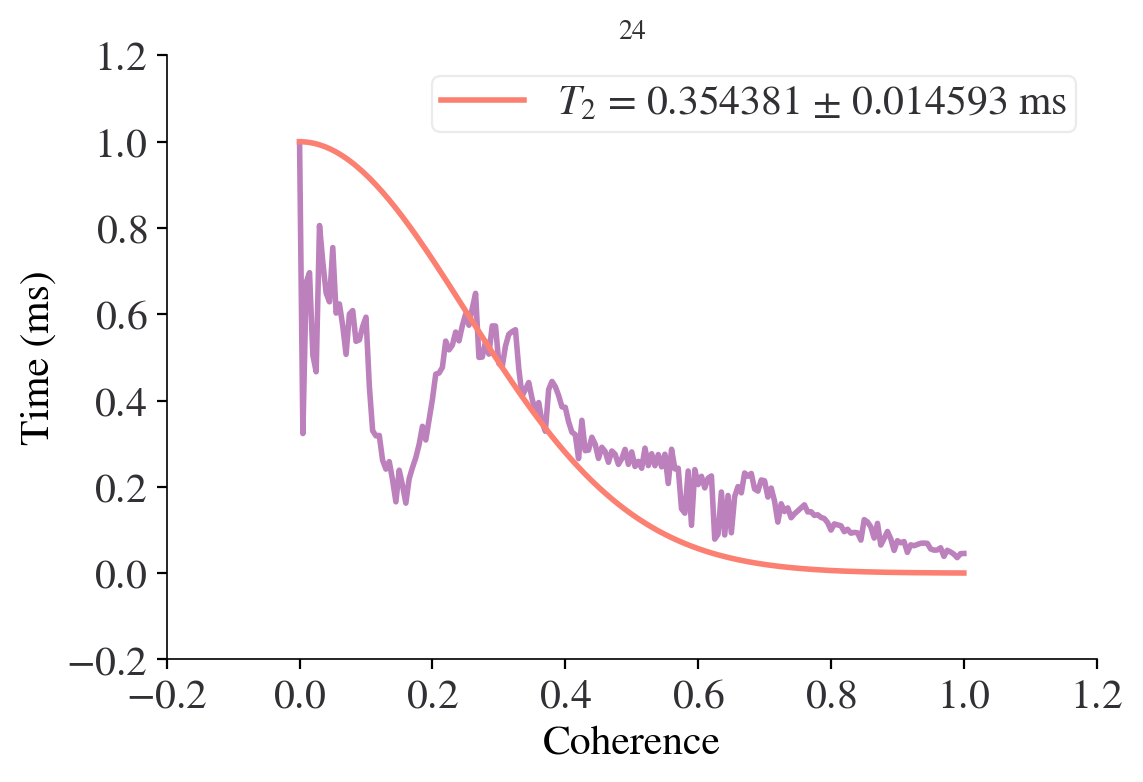

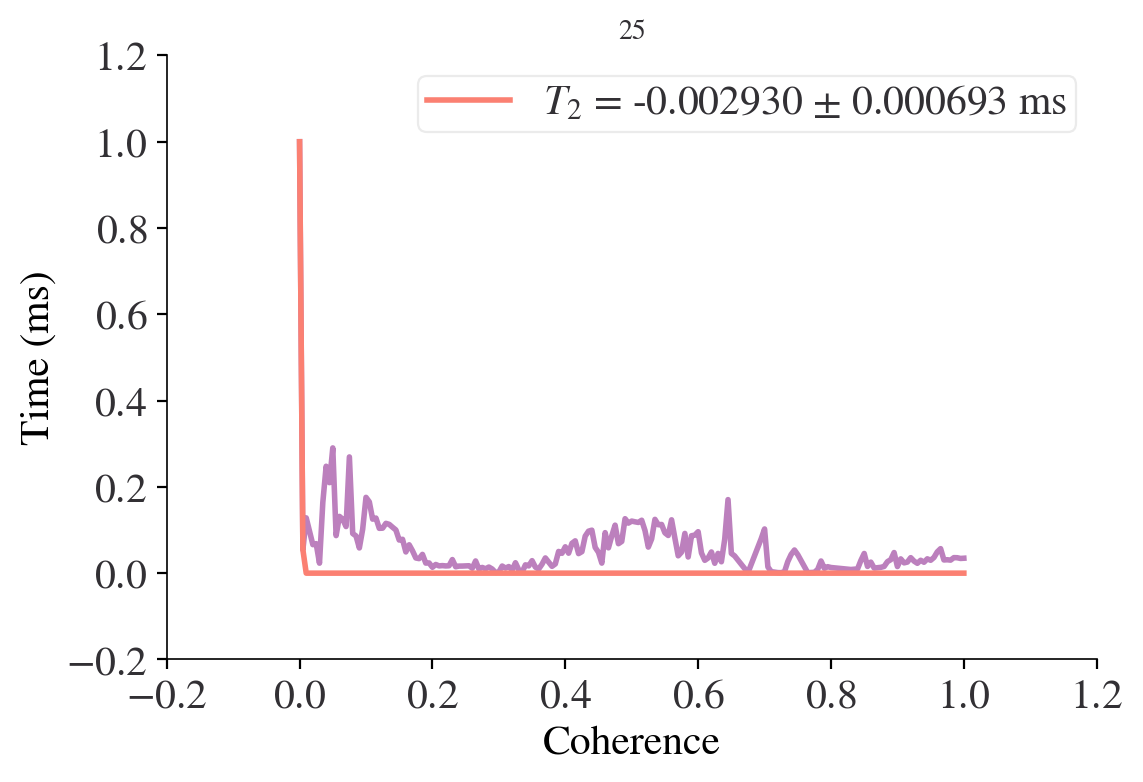

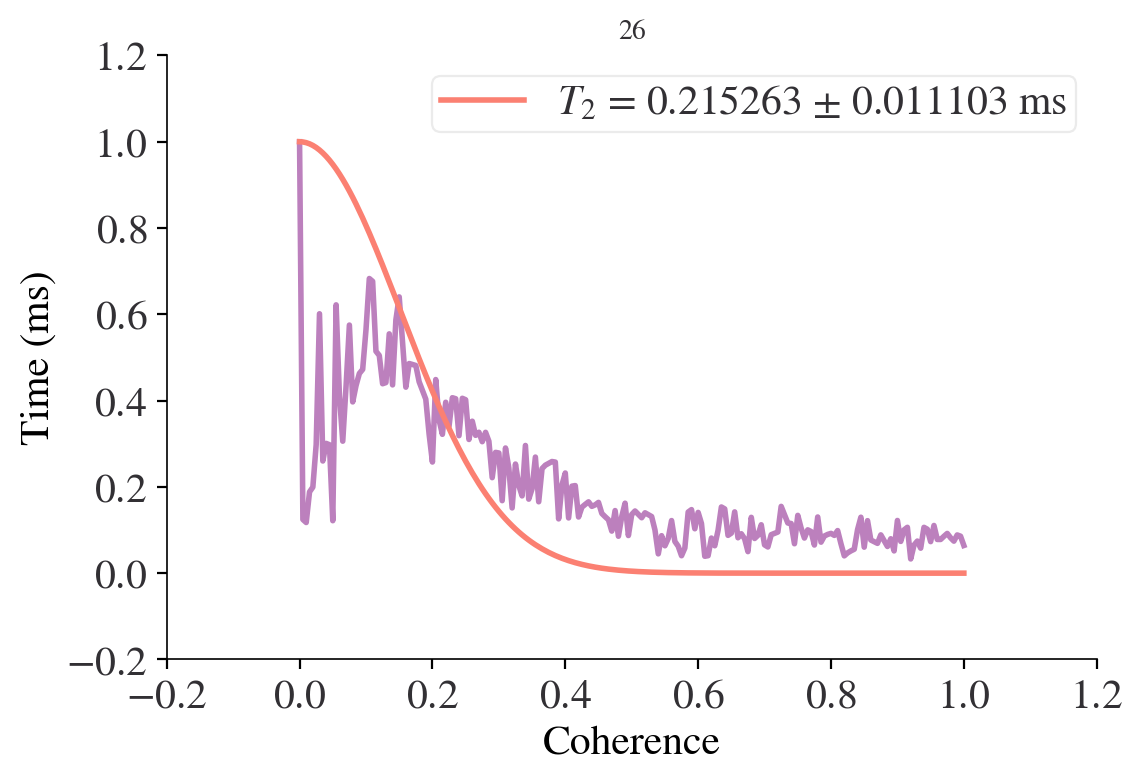

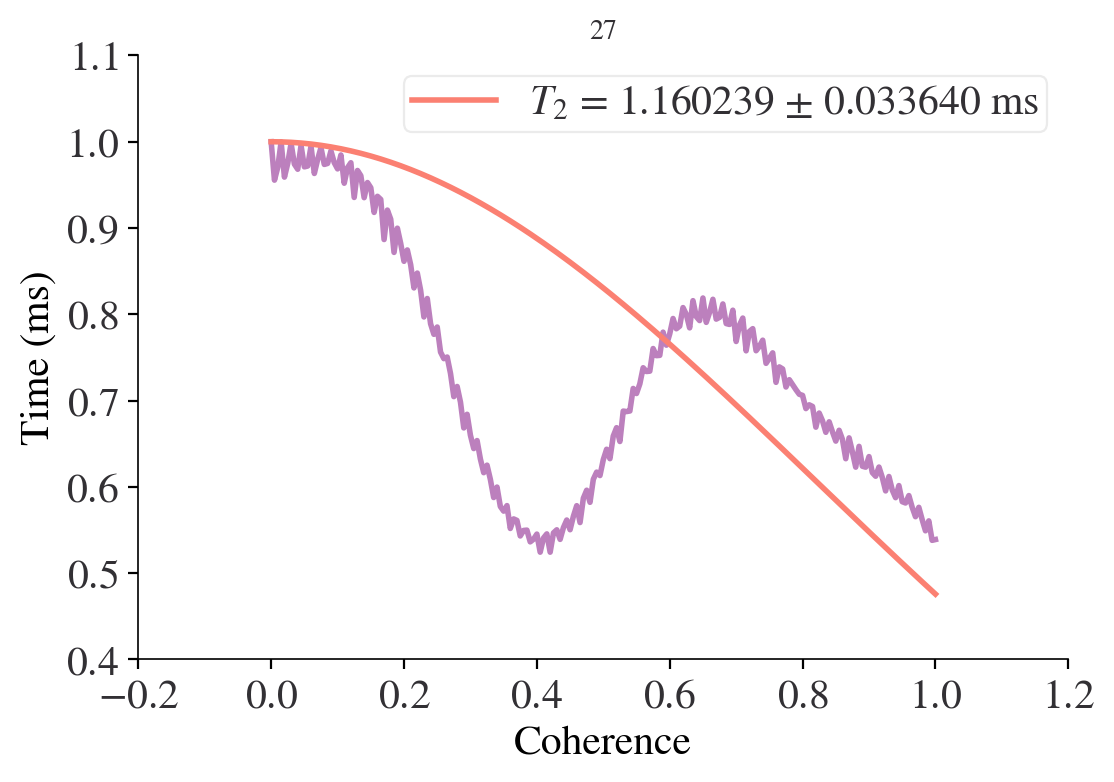

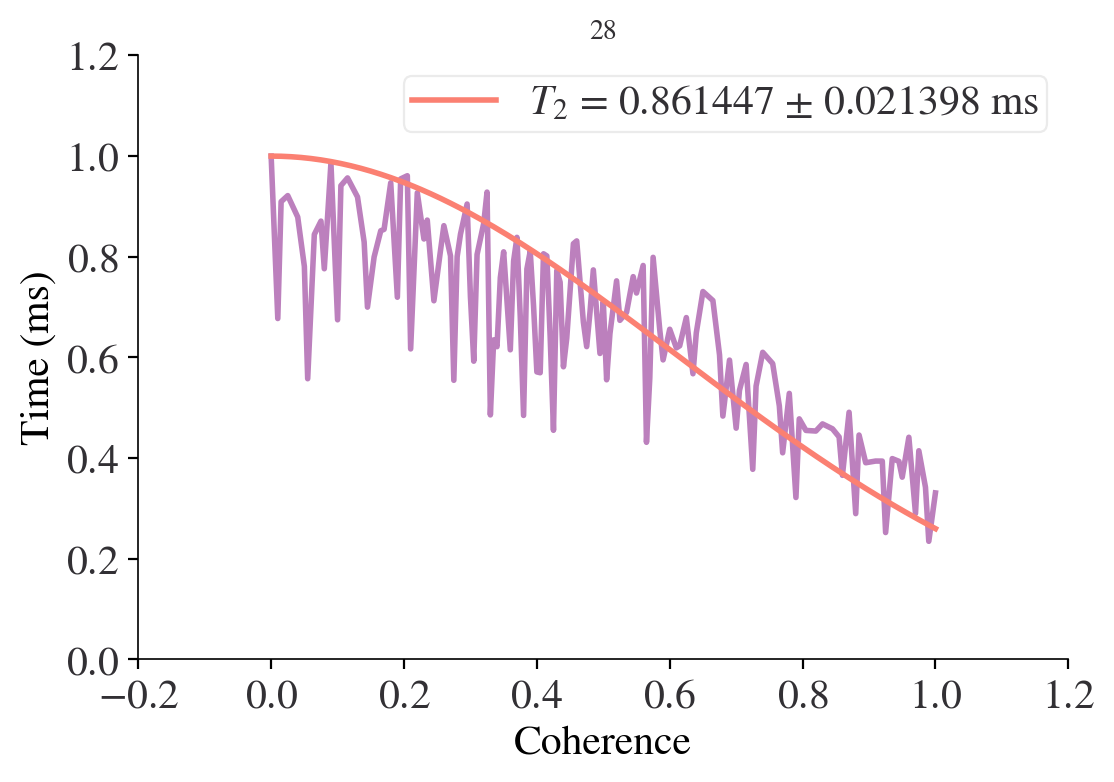

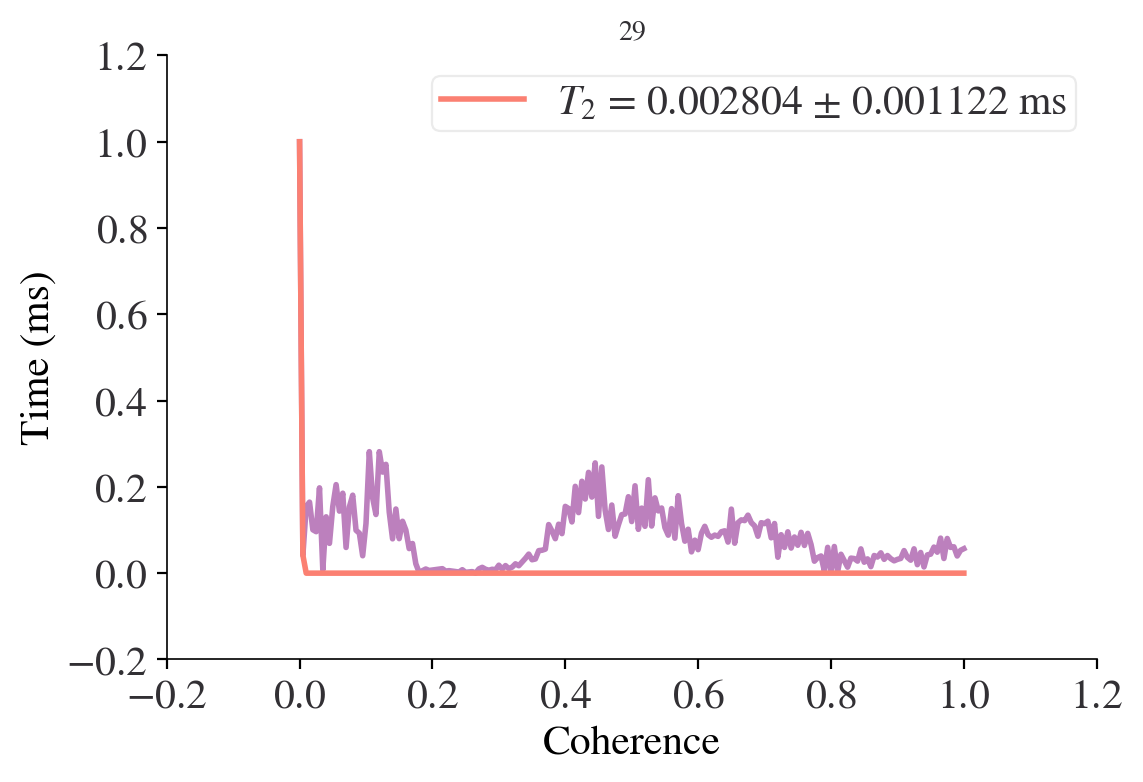

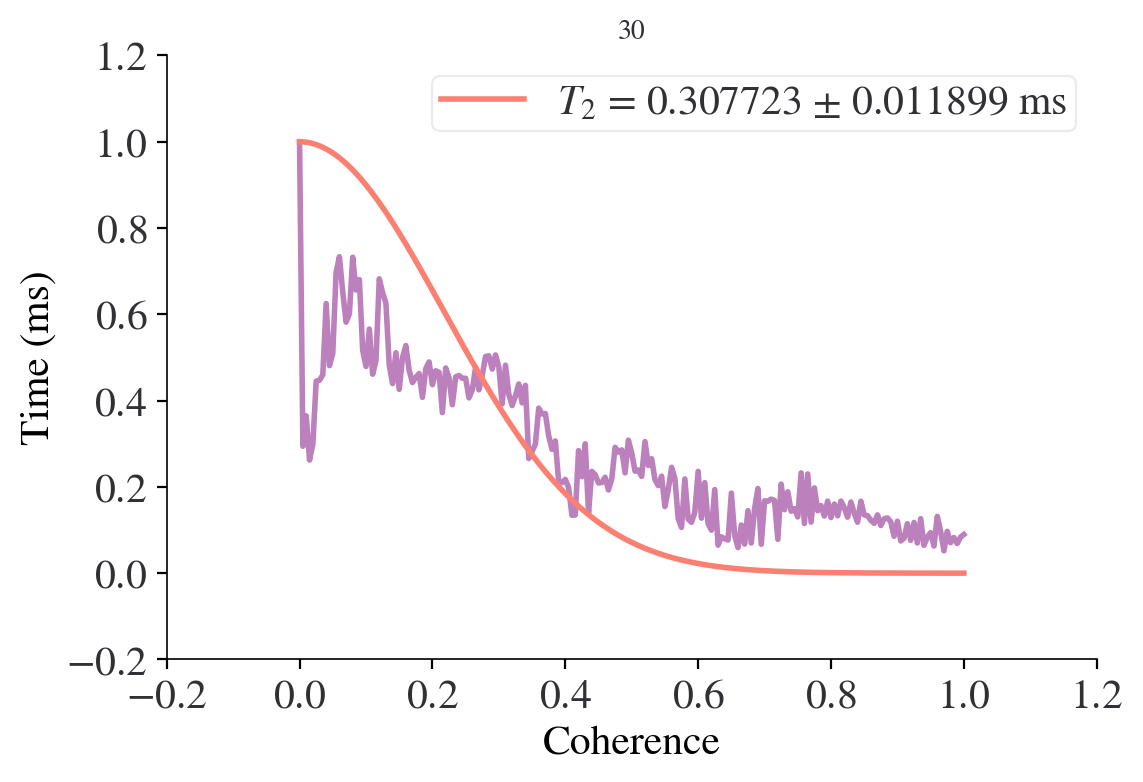

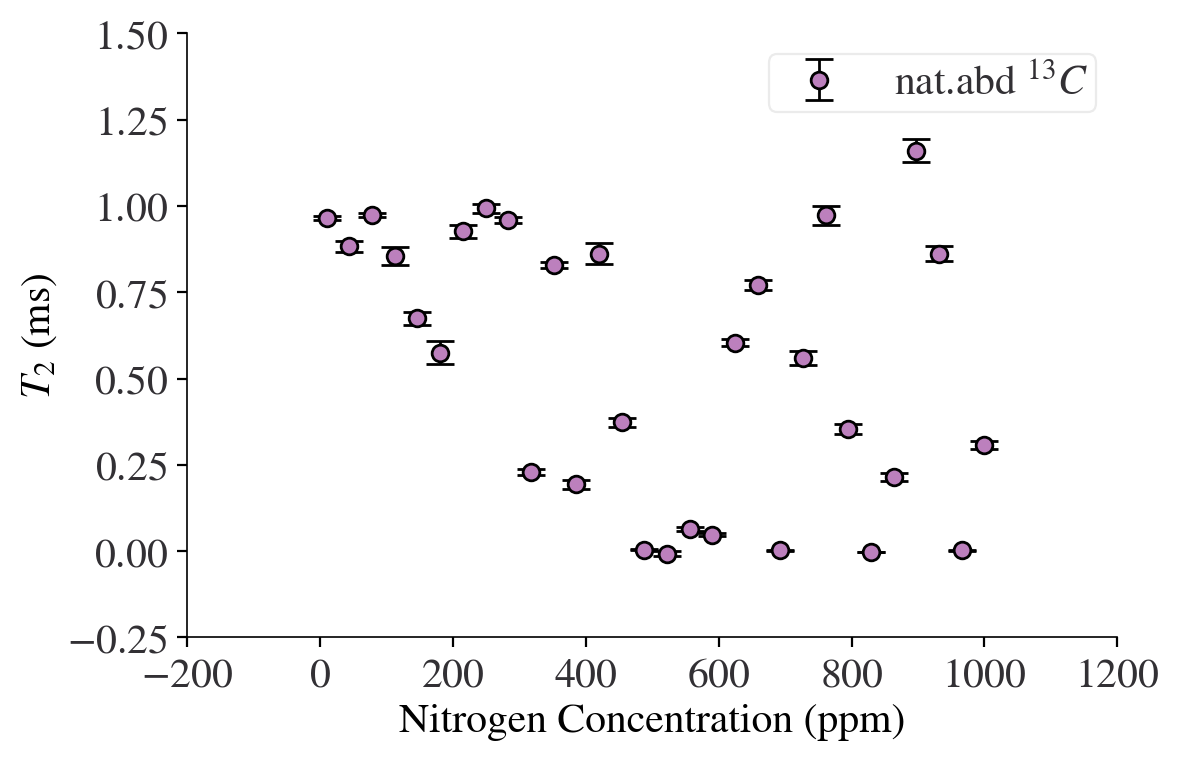

In [24]:
# #for progress bar
# from tqdm import tqdm

''' import libraries '''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pycce as pc
import ase
import warnings
from mpl_toolkits import mplot3d
from ase.build import bulk
import pycce.filter
import scipy.stats as stats
from scipy.optimize import curve_fit
import matplotlib as mpl
import time

"""set up seed for bath generations"""
seed = 8805
np.random.seed(seed)
np.set_printoptions(suppress=True, precision=10)

plt.style.use('plot_style.txt')
# mpl.rcParams['figure.figsize'] = [12.0, 8.0]
# mpl.rcParams['xtick.labelsize'] = 15

""" pseudo varied 14N impurity concentration """

def coherence_fit(x,T_2):
    "fit coherence function to a negative squared exponential function with time constant T2"
    
    fit = np.exp(-(x/T_2)**2)
    
    return fit

repeats = 30
time_space = np.linspace(0, 1, 201)  # in ms
# Number of pulses in CPMG seq (0 = FID, 1 = HE)
n = 1
# Mag. Field (Bx By Bz)
b = np.array([0, 0, 500])  # in G

# Generate unitcell from ase



# Parameters of CCE calculations engine

# Order of CCE aproximation
order = 2
# Bath cutoff radius
r_bath = 180  # in A
# Cluster cutoff radius
r_dipole = 50  # in A

bathsize = 100

# position of central spin
position = [0, 0, 0]
# Qubit levels (in Sz basis)
alpha = [0, 0, 1]; beta = [0, 1, 0]

# ZFS Parametters of NV center in diamond
D = 2.88 * 1e6 # in kHz
E = 0 # in kHz

nv = pc.CenterArray(spin=1, position=position, D=D, E=E, alpha=alpha, beta=beta)

# Hahn-echo pulse sequence
pulse_sequence = [pc.Pulse('x', np.pi)]

p1 = pc.Pulse('x', np.pi)
p2 = pc.Pulse('y', np.pi)

concentration = np.linspace(0.00008, 0.008, repeats)

T2_hahn = []
T2_err_hahn = []
n=0
conc = []
for j in concentration:
    n = n+1
    starttime = time.perf_counter()
    conc.append((j/8)*1e6)

    diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
    diamond.zdir = [1,1,1]
    diamond.add_isotopes(('13C', 0.011))
    diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
    diamond.add_isotopes(('14N', j))
    atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
                                               ('C', [0.5, 0.5, 0.5])],
                                  add=[('14N', [0.5, 0.5, 0.5])])
    calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
    l_generatilze = calc.compute(time_space, magnetic_field=b,
                          pulses=pulse_sequence,
                          method='gcce', quantity='coherence')
    
    ''' filter faulty points '''
    l_generatilze_test = l_generatilze.real
    
    time_space_generatilze_fixed = []
    l_generatilze_fixed = []
    for i in np.arange(0,201):
        if l_generatilze_test[i] < 1.25 and l_generatilze_test[i] > 0:
            l_generatilze_fixed.append(l_generatilze_test[i])
            time_space_generatilze_fixed.append(time_space[i])
    
    T2_gen,T2_var = curve_fit(coherence_fit,time_space_generatilze_fixed, l_generatilze_fixed)
    T2_var = np.sqrt(np.abs(T2_var))
    T2_hahn.append(T2_gen[0])
    T2_err_hahn.append(T2_var[0][0])
    
    endtime = time.perf_counter()
    print(starttime-endtime, "secs for calc",n)
    
    plt.figure()
    plt.plot(time_space_generatilze_fixed, l_generatilze_fixed)
    plt.plot(time_space,coherence_fit(time_space,T2_gen[0]), label='$T_2$ = {0:0.6f} $\pm$ {1:0.6f} ms'.format(T2_gen[0],T2_var[0][0]))
    plt.xlabel('Coherence')
    plt.ylabel('Time (ms)')
    plt.legend(loc='best')
    plt.title(n)

# seq = [p1, p2, p1, p2]
# T2_range_XY4 = []
# for i in concentration:
#     diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
#     diamond.zdir = [1,1,1]
#     diamond.add_isotopes(('13C', 0.011))
#     diamond.isotopes['C']['14C'] = 0.001
#     diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
#     diamond.add_isotopes(('14N', i))
#     atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
#                                                ('C', [0.5, 0.5, 0.5])],
#                                   add=[('14N', [0.5, 0.5, 0.5])], seed=seed)
#     atoms['14C'].gyro = 0
#     atoms['14C'].spin = 0
#     calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
#     l_gcce = calc.compute(time_space, magnetic_field=b,
#                           pulses=seq,
#                           method='gcce', quantity='coherence')
#     popt,pcov = curve_fit(coherence_fit,time_space, l_gcce.real)
#     T2_range_XY4.append(popt)


# seq_8 = [p1, p2, p1, p2, p1, p2, p1, p2]
# T2_range_XY8 = []
# for i in concentration:
#     diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
#     diamond.zdir = [1,1,1]
#     diamond.add_isotopes(('13C', 0.011))
#     diamond.isotopes['C']['14C'] = 0.001
#     diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
#     diamond.add_isotopes(('14N', i))
#     atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
#                                                ('C', [0.5, 0.5, 0.5])],
#                                   add=[('14N', [0.5, 0.5, 0.5])], seed=seed)
#     atoms['14C'].gyro = 0
#     atoms['14C'].spin = 0
#     calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
#     l_gcce = calc.compute(time_space, magnetic_field=b,
#                           pulses=seq_8,
#                           method='gcce', quantity='coherence')
#     popt,pcov = curve_fit(coherence_fit,time_space, l_gcce.real)
#     T2_range_XY8.append(popt)


# T2_range_CPMG4 = []
# for i in concentration:
#     diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
#     diamond.zdir = [1,1,1]
#     diamond.add_isotopes(('13C', 0.011))
#     diamond.isotopes['C']['14C'] = 0.001
#     diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
#     diamond.add_isotopes(('14N', i))
#     atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
#                                                ('C', [0.5, 0.5, 0.5])],
#                                   add=[('14N', [0.5, 0.5, 0.5])], seed=seed)
#     atoms['14C'].gyro = 0
#     atoms['14C'].spin = 0
#     calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
#     l_gcce = calc.compute(time_space, magnetic_field=b,
#                           pulses=4,
#                           method='gcce', quantity='coherence')
#     popt,pcov = curve_fit(coherence_fit,time_space, l_gcce.real)
#     T2_range_CPMG4.append(popt)
    
# T2_range_CPMG8 = []
# for i in concentration:
#     diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
#     diamond.zdir = [1,1,1]
#     diamond.add_isotopes(('13C', 0.011))
#     diamond.isotopes['C']['14C'] = 0.001
#     diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
#     diamond.add_isotopes(('14N', i))
#     atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
#                                                ('C', [0.5, 0.5, 0.5])],
#                                   add=[('14N', [0.5, 0.5, 0.5])], seed=seed)
#     atoms['14C'].gyro = 0
#     atoms['14C'].spin = 0
#     calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
#     l_gcce = calc.compute(time_space, magnetic_field=b,
#                           pulses=8,
#                           method='gcce', quantity='coherence')
#     popt,pcov = curve_fit(coherence_fit,time_space, l_gcce.real)
#     T2_range_CPMG8.append(popt)

# plots the data points and the fitted  curve

datasavefile = 'self_datapoints_T2_14N_conc_substi.csv'
data_14N_T2_conc = {'conc':conc,   'T2_hahn':T2_hahn, 'T2_err_hahn':T2_err_hahn}

df = pd.DataFrame(data = data_14N_T2_conc)
df.to_csv(datasavefile)

plt.figure()
plt.errorbar(conc, T2_hahn, yerr=T2_err_hahn, fmt='o', ecolor='k', elinewidth=1, capsize=5, label='nat.abd $^{13}C$')
plt.xlabel('Nitrogen Concentration (ppm)')
plt.ylabel('$T_2$ (ms)')
plt.legend()

outpath = 'self_atomnumb_T2_14N_conc_substi.png'
plt.savefig(outpath)

    Unnamed: 0         conc   T2_hahn  T2_err_hahn
0            0    10.000000  0.964773     0.005793
1            1    44.137931  0.882803     0.016155
2            2    78.275862  0.974728     0.005354
3            3   112.413793  0.854874     0.026945
4            4   146.551724  0.674373     0.019251
5            5   180.689655  0.574520     0.032957
6            6   214.827586  0.926712     0.018431
7            7   248.965517  0.993182     0.012403
8            8   283.103448  0.960172     0.008293
9            9   317.241379  0.228325     0.009092
10          10   351.379310  0.829465     0.009262
11          11   385.517241  0.193255     0.014101
12          12   419.655172  0.861952     0.029646
13          13   453.793103  0.373257     0.012465
14          14   487.931034  0.003849     0.000978
15          15   522.068966 -0.006862     0.008214
16          16   556.206897  0.065534     0.005758
17          17   590.344828  0.048066     0.004749
18          18   624.482759  0.

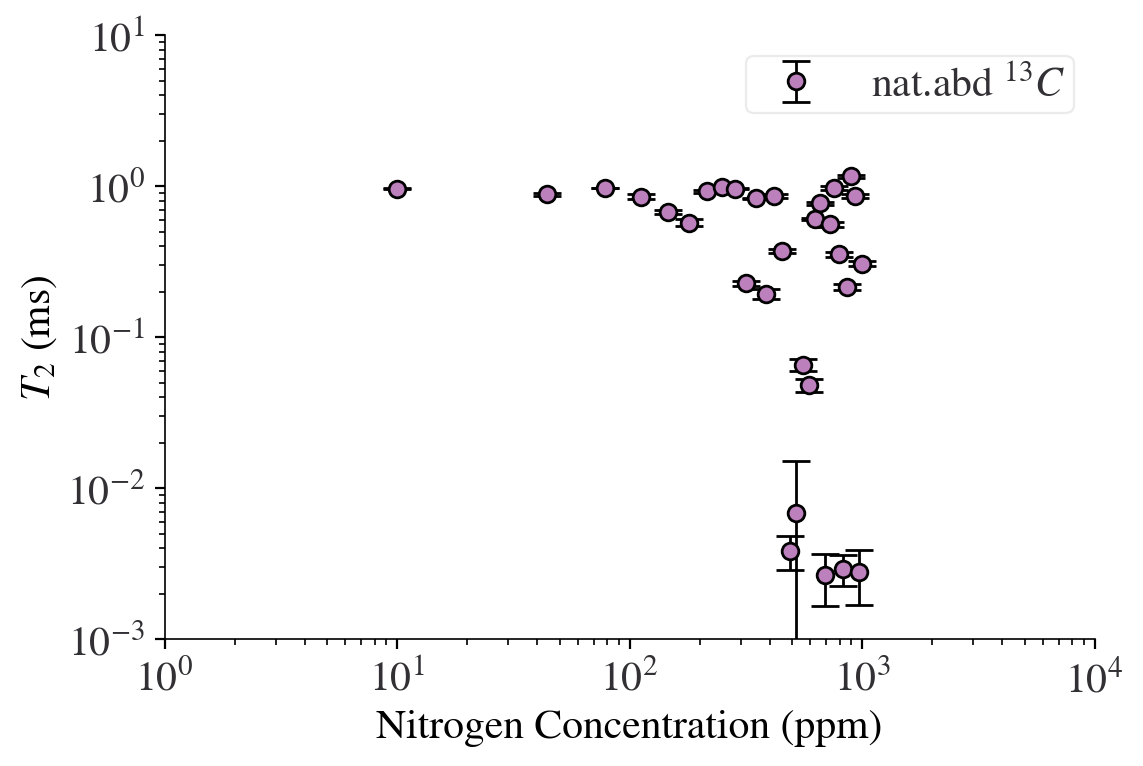

In [36]:
data_14N_T2_conc = pd.read_csv('self_datapoints_T2_14N_conc_substi.csv')
print(data_14N_T2_conc)

plt.figure()
plt.errorbar(conc, np.abs(T2_hahn), yerr=T2_err_hahn, fmt='o', ecolor='k', elinewidth=1, capsize=5, label='nat.abd $^{13}C$')
plt.xlabel('Nitrogen Concentration (ppm)')
plt.ylabel('$T_2$ (ms)')
plt.yscale('log')
plt.xscale('log')
# plt.ylim(10,1e-5)
plt.legend()

-2313.6353485 secs for calc 1


C:\Users\Daniel Low\Anaconda3\lib\site-packages\pycce\run\clusters.py:172: RuntimeWarning: overflow encountered in power
  vcalc = contribution_operator(vcalc, current_power[index])
C:\Users\Daniel Low\Anaconda3\lib\site-packages\pycce\run\clusters.py:174: RuntimeWarning: invalid value encountered in multiply
  result = result_operator(result, vcalc)


-2355.9554602999997 secs for calc 2
-2161.0484657999914 secs for calc 3
-2144.900774599999 secs for calc 4
-2198.7536869999894 secs for calc 5
-2310.4693081999867 secs for calc 6
-3063.9318582999986 secs for calc 7
-3369.420012900009 secs for calc 8
-3258.1402646999923 secs for calc 9
-3131.548470599999 secs for calc 10
-2796.124920299975 secs for calc 11
-1894.276918299991 secs for calc 12
-1764.056572100002 secs for calc 13
-1809.1393764999812 secs for calc 14
-2211.0286995000206 secs for calc 15
-2987.1431070999824 secs for calc 16
-2780.7587411999993 secs for calc 17
-2347.8423451000126 secs for calc 18
-2189.981886099995 secs for calc 19
-2099.437039099983 secs for calc 20


C:\Users\Daniel Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


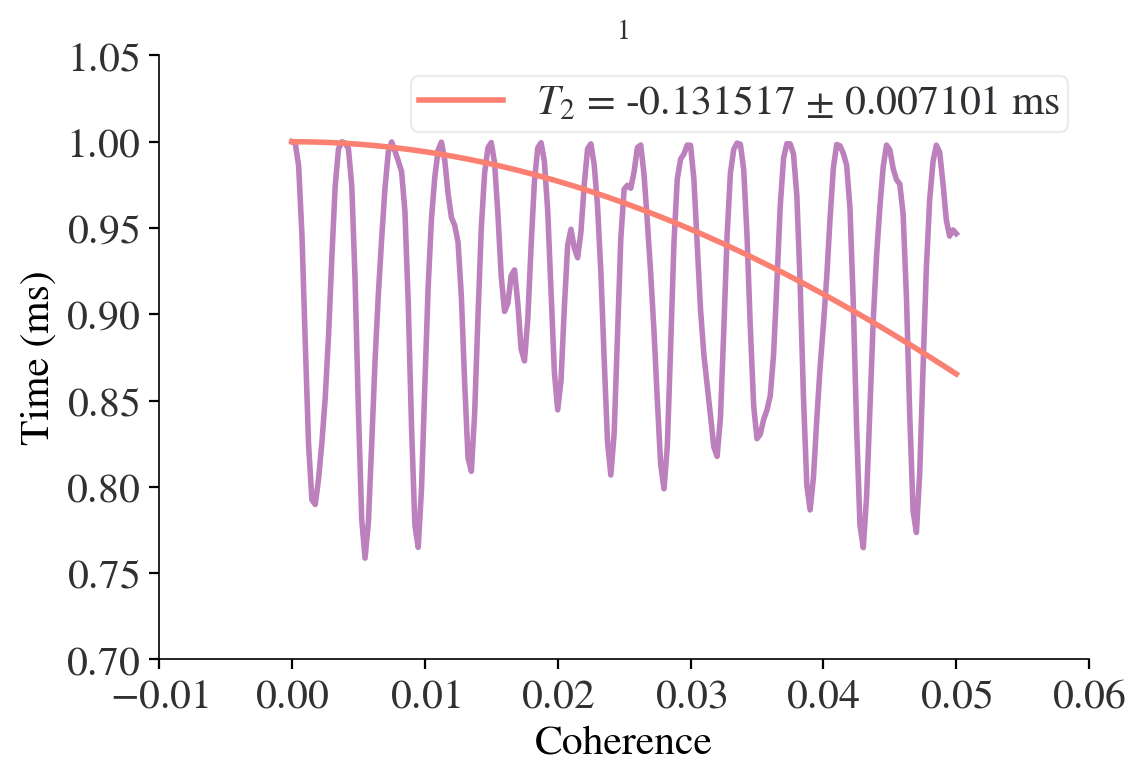

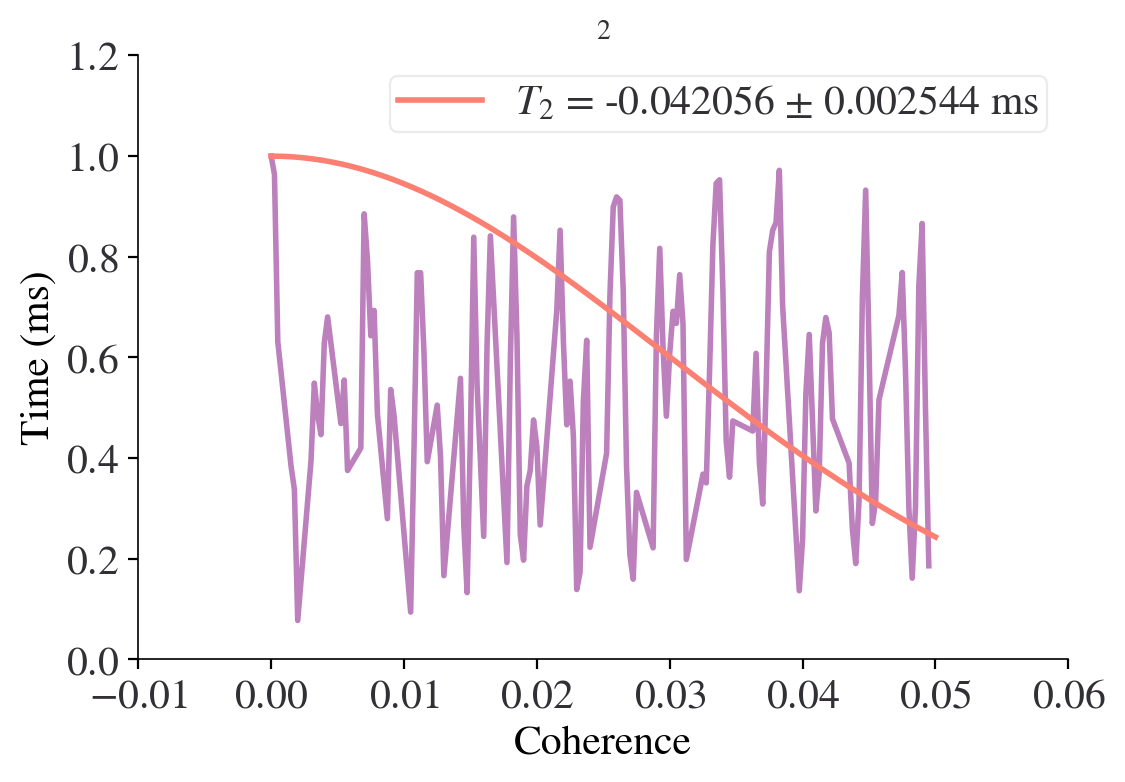

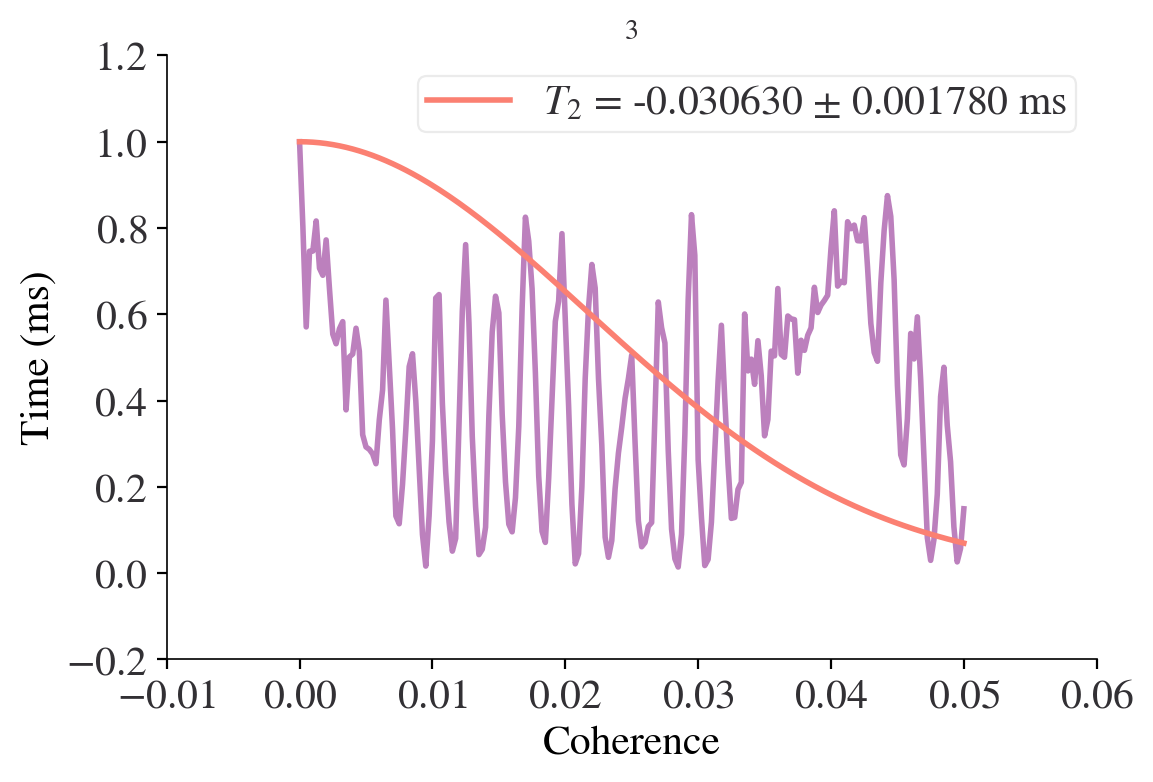

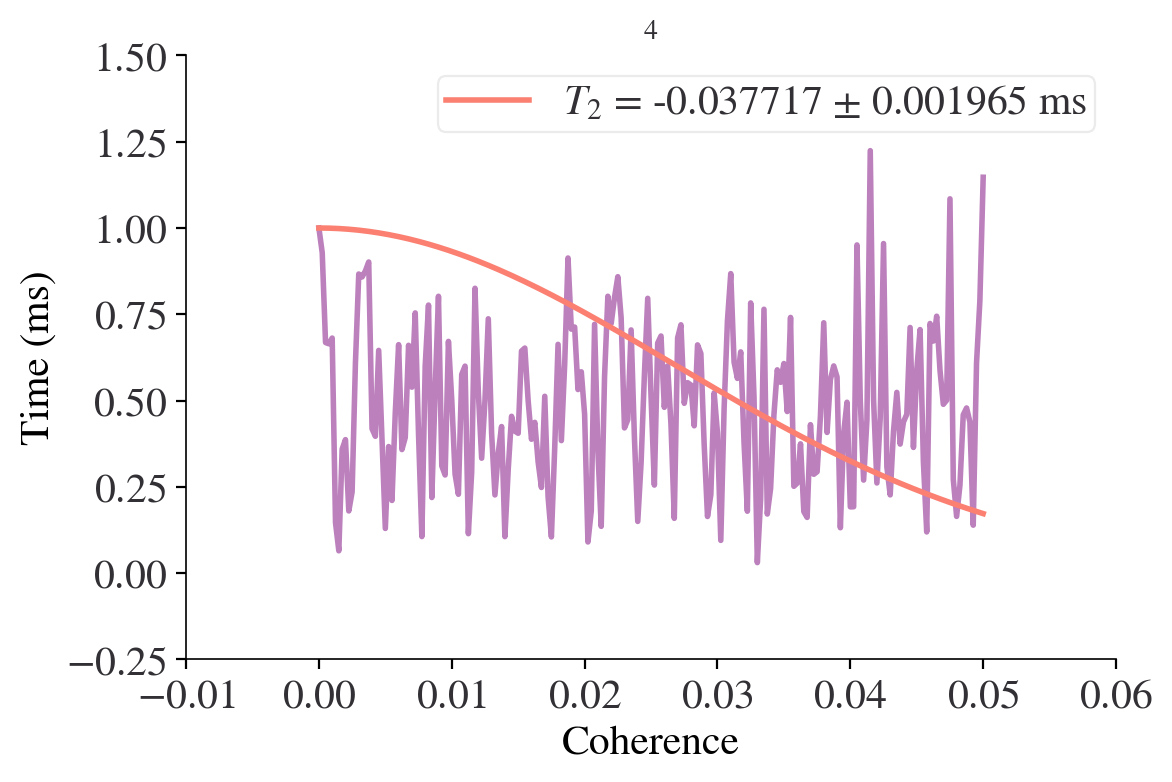

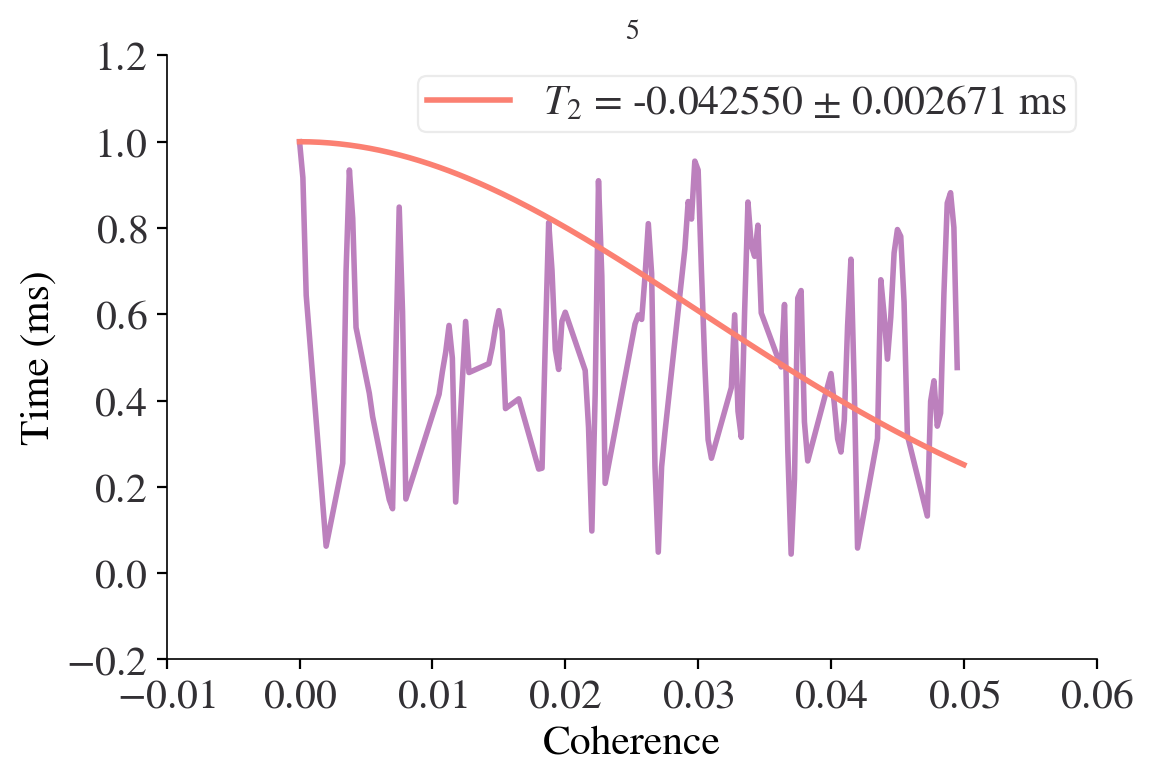

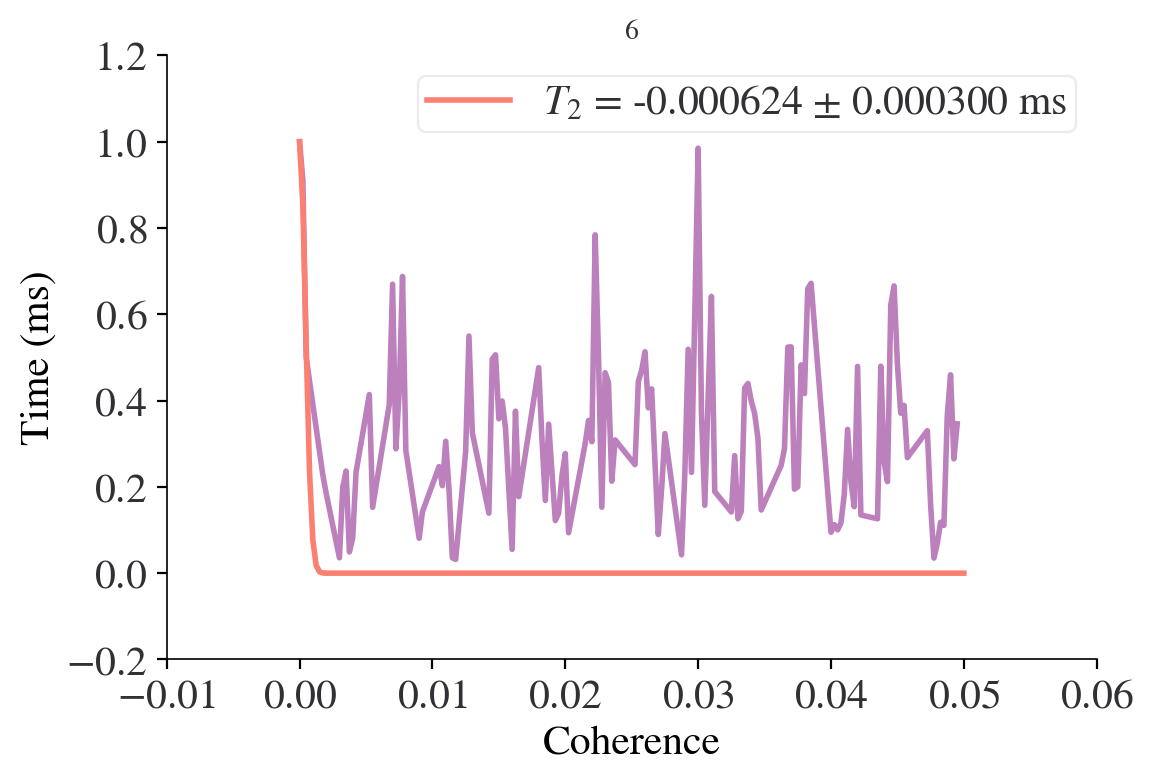

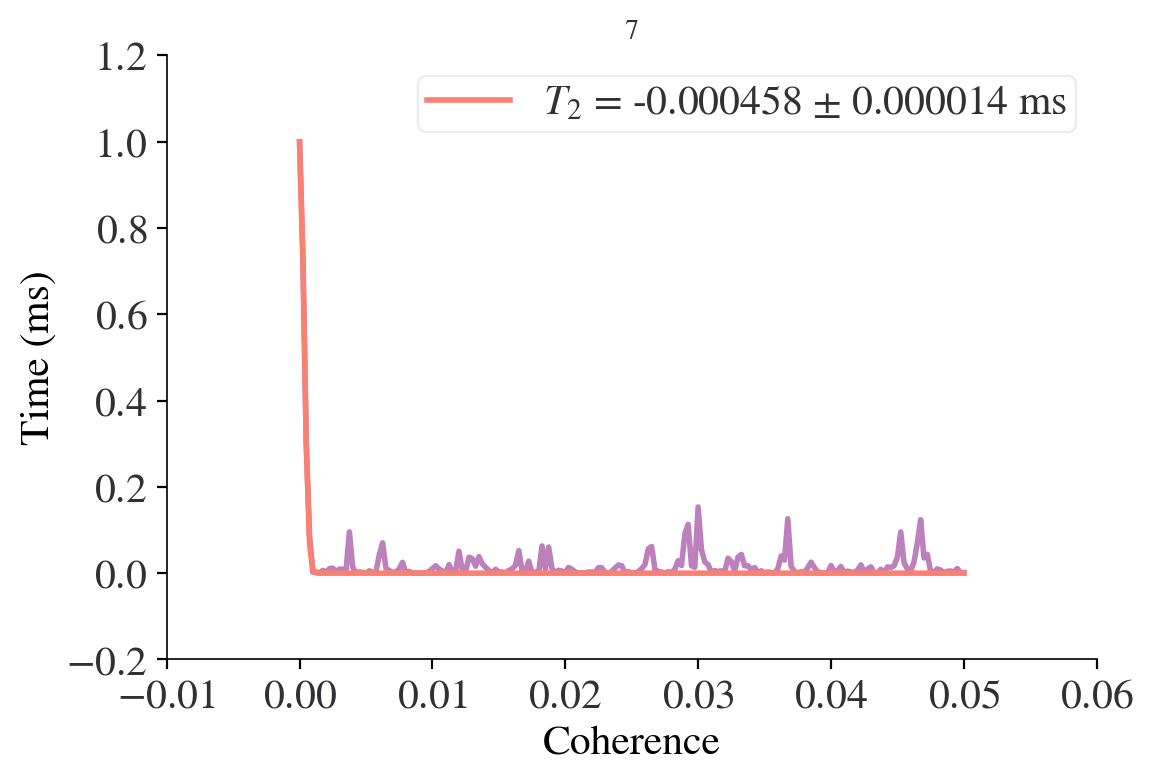

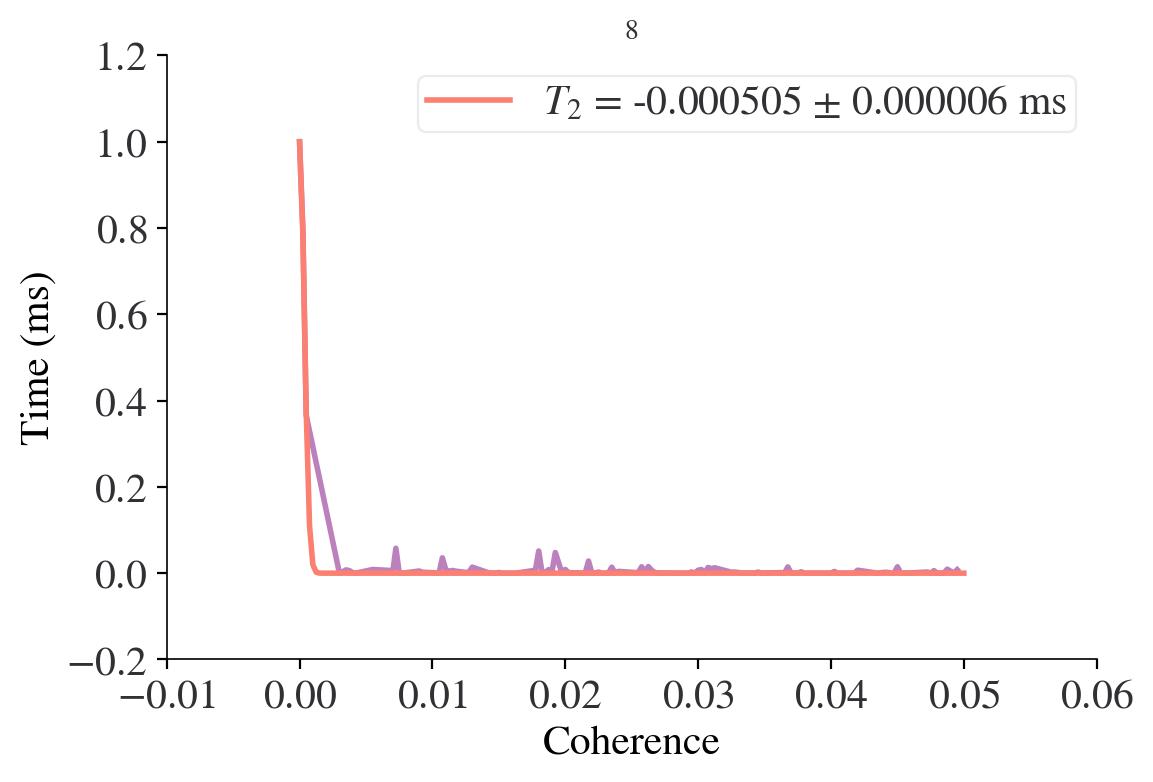

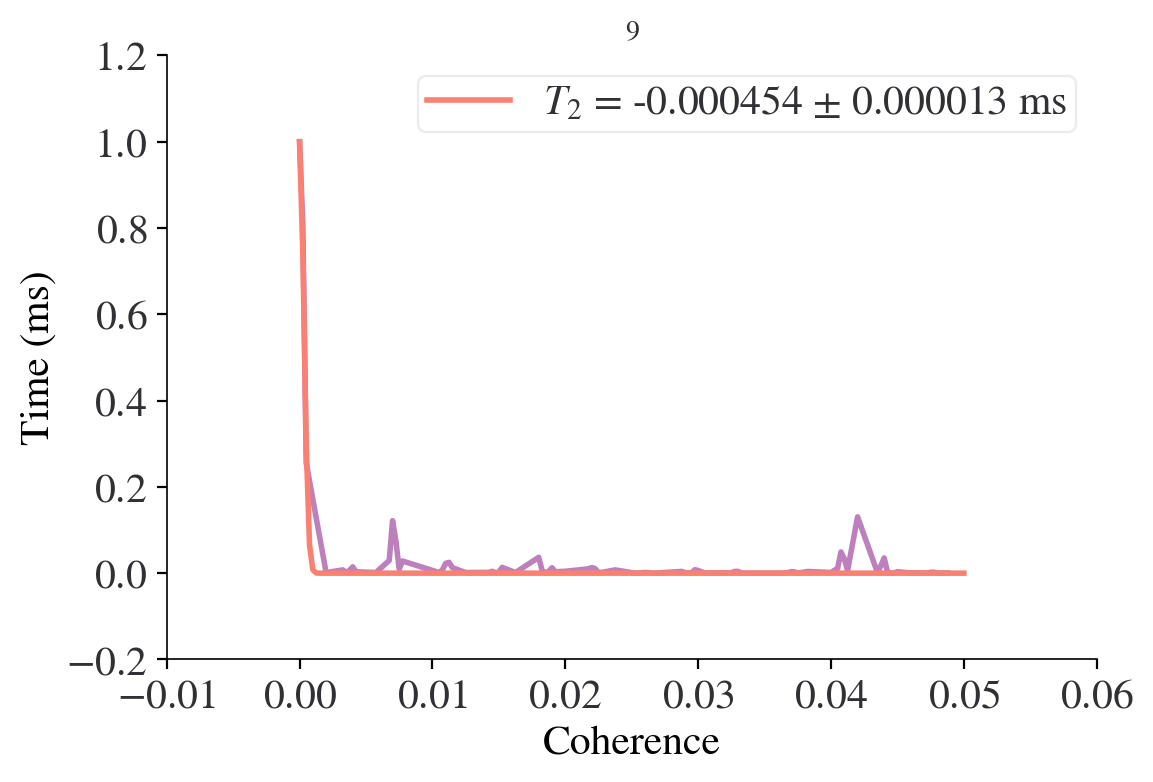

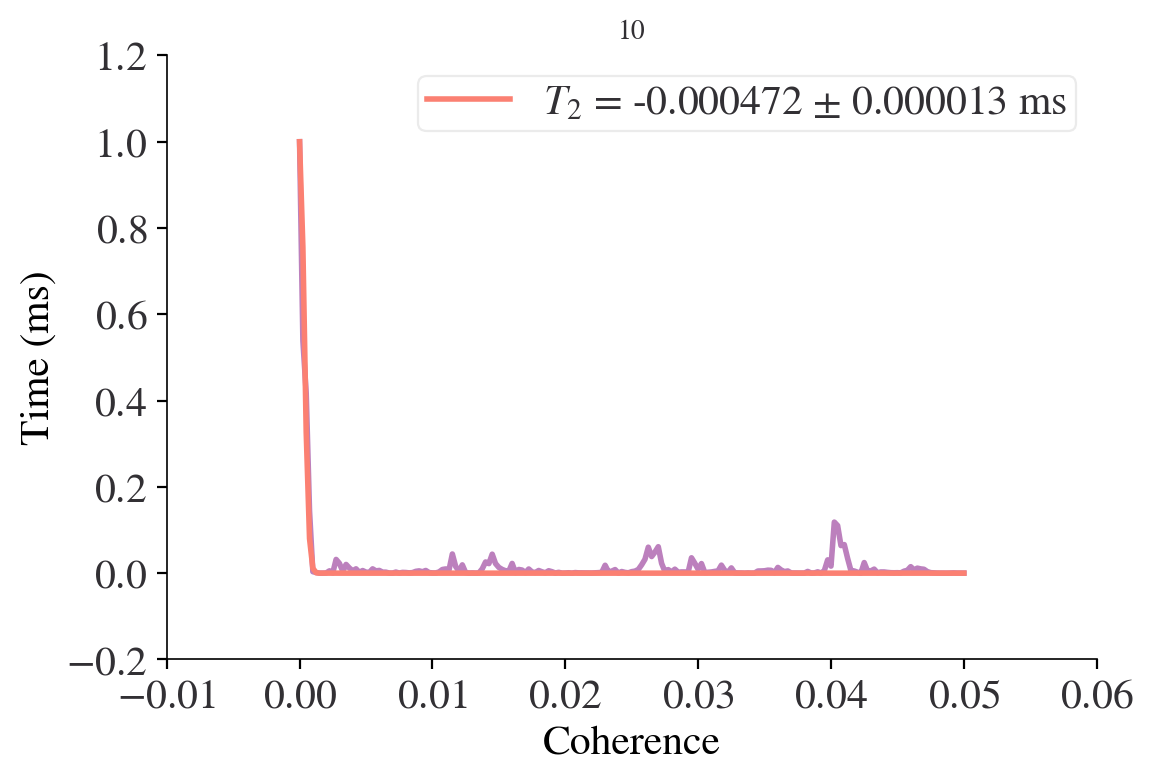

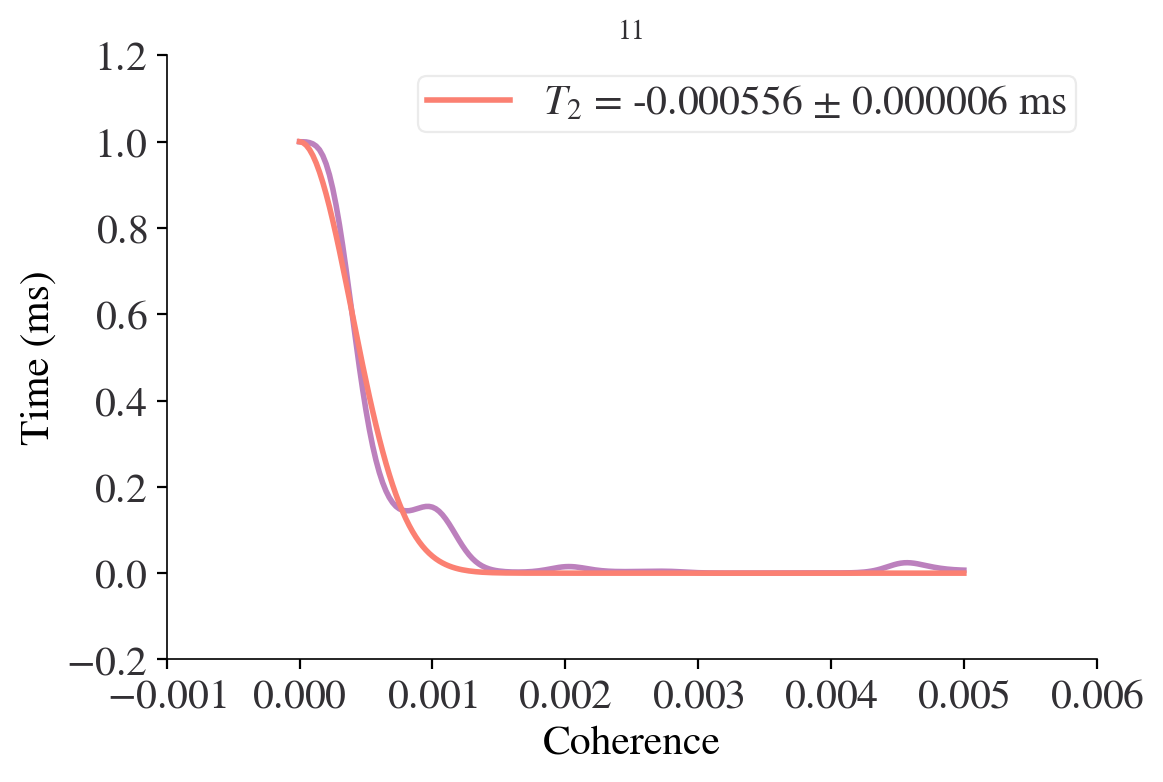

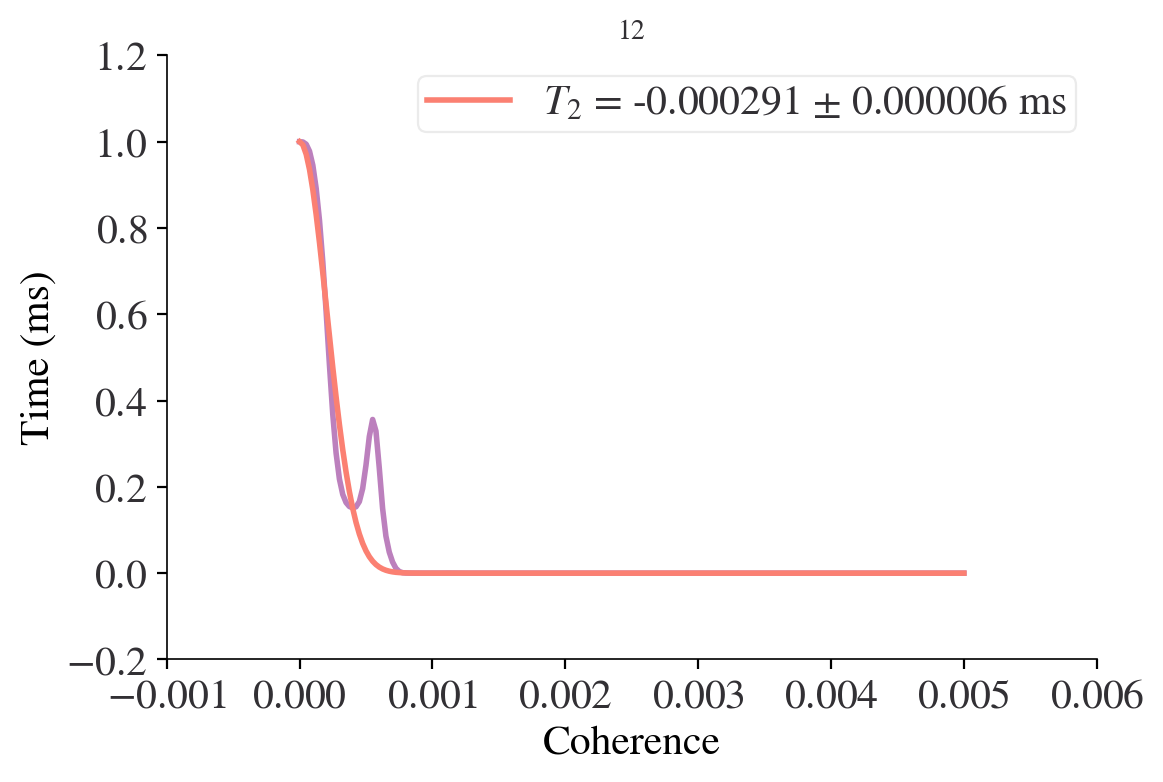

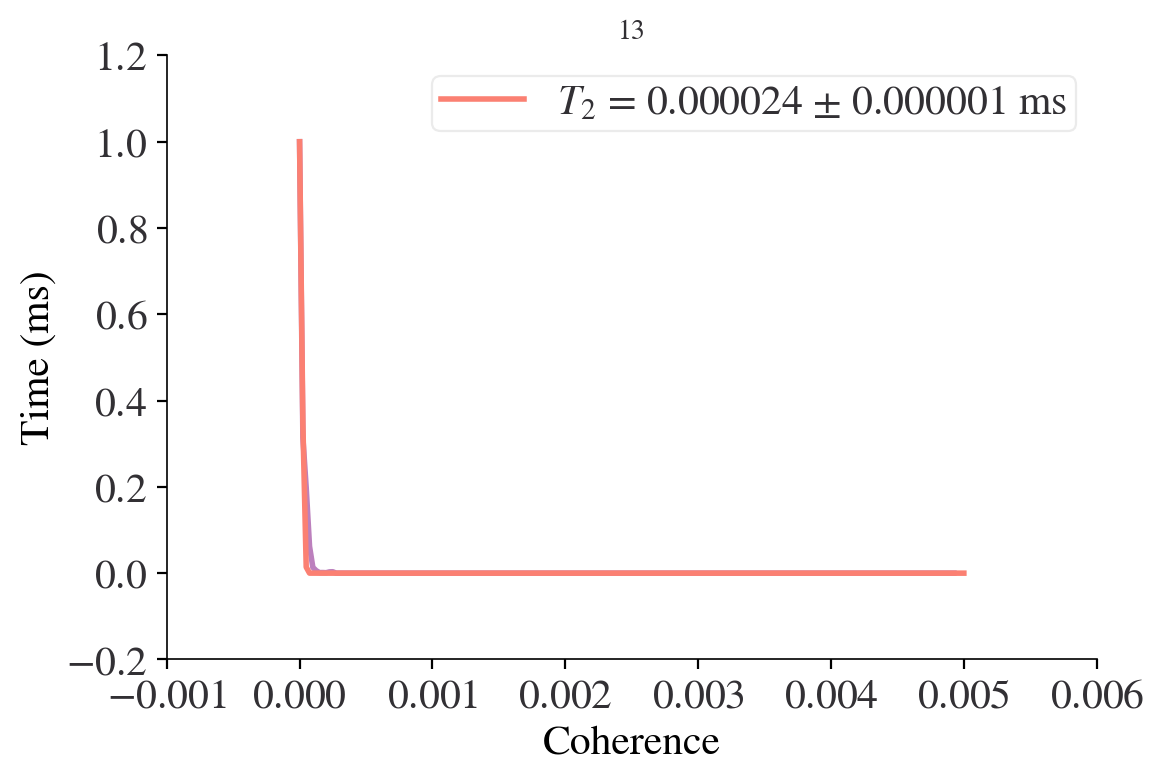

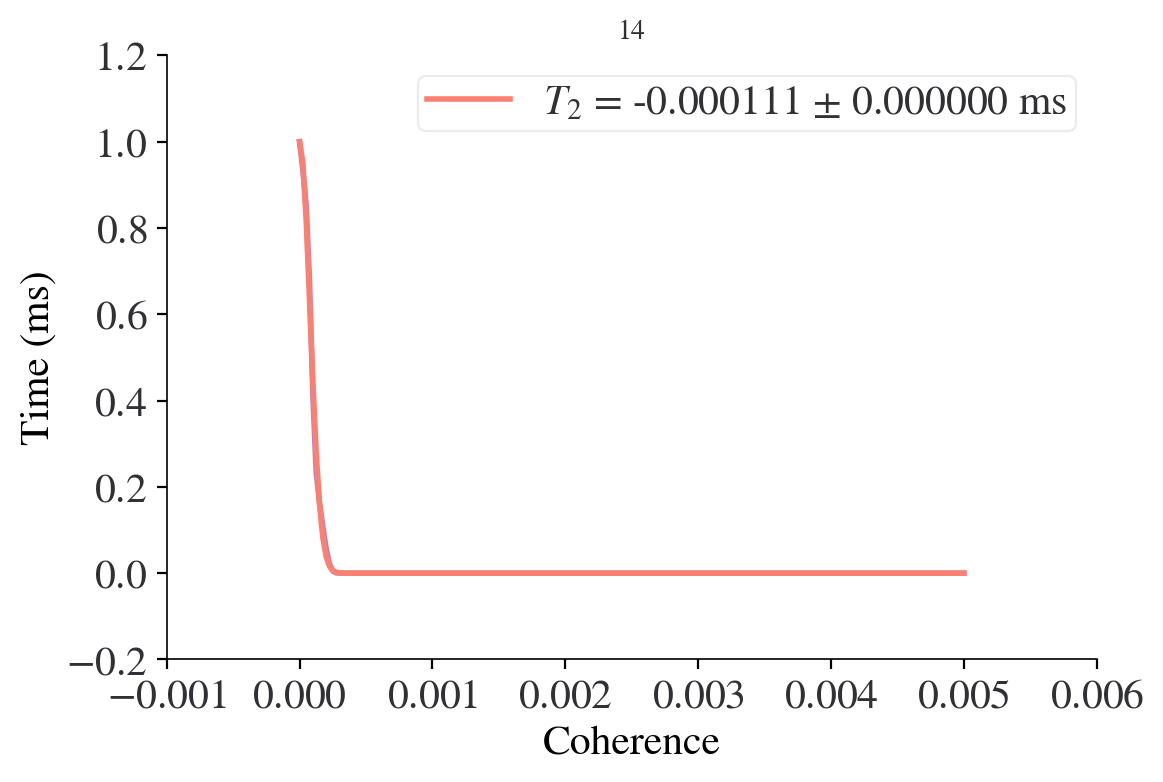

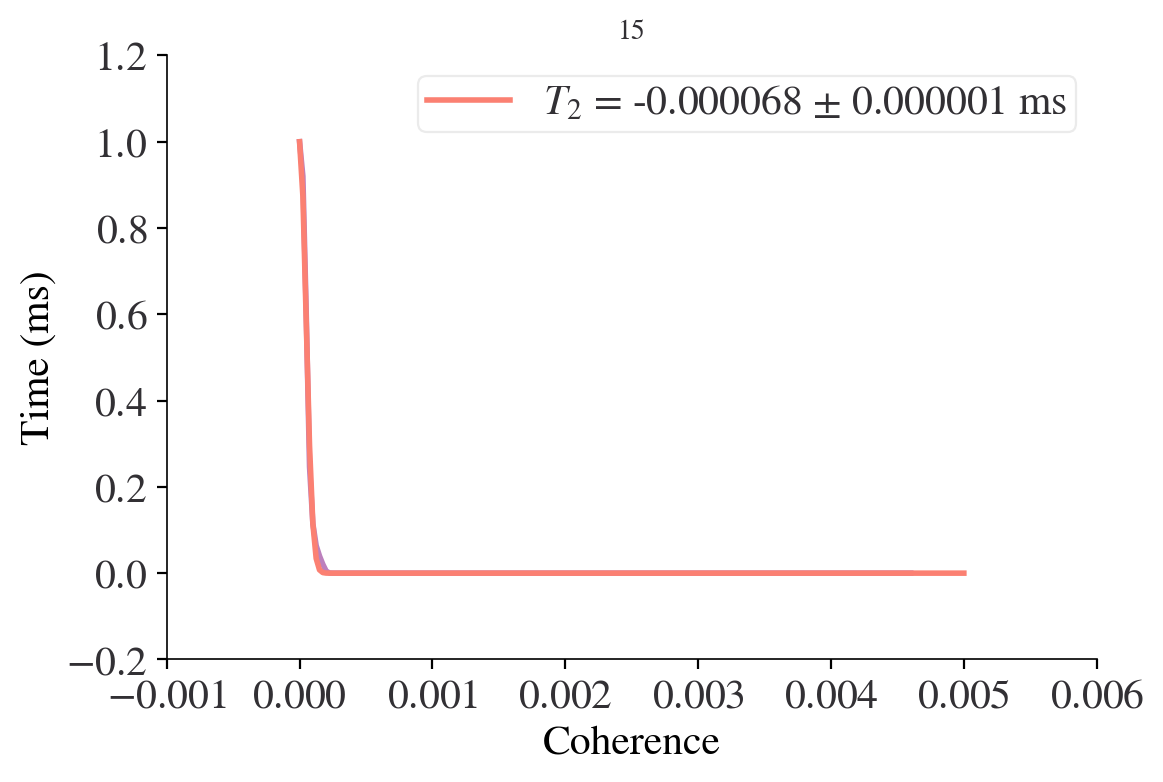

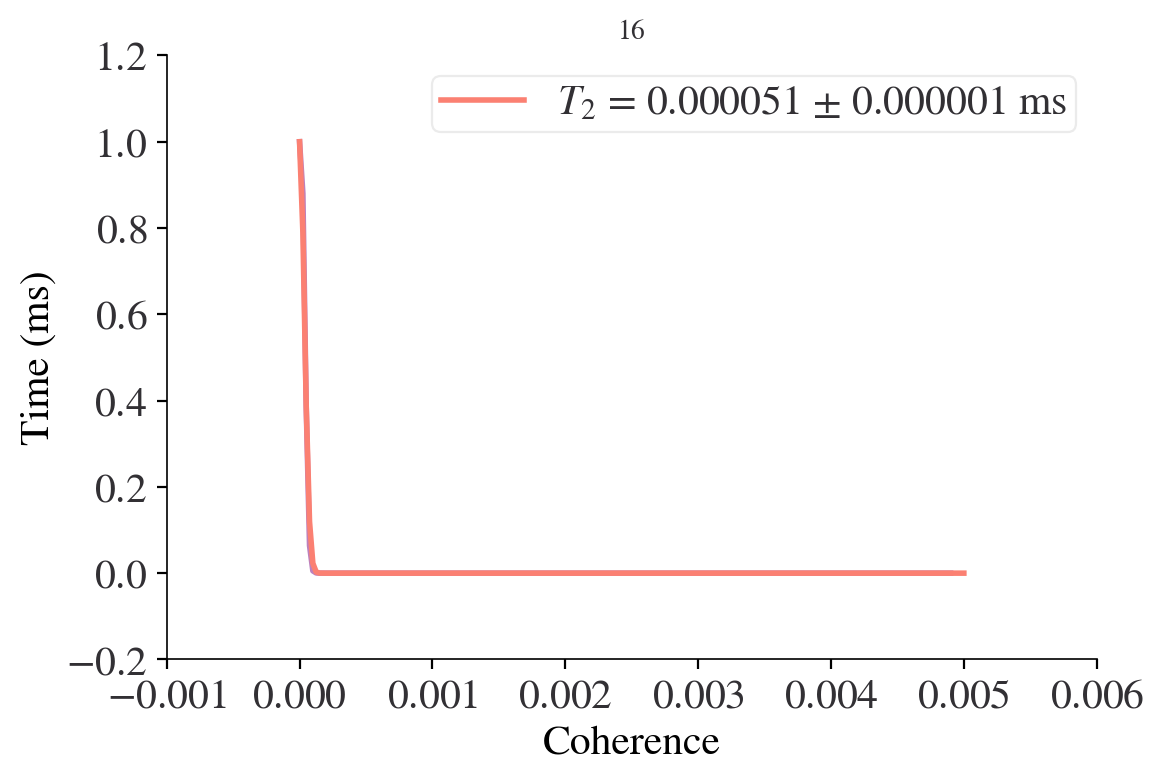

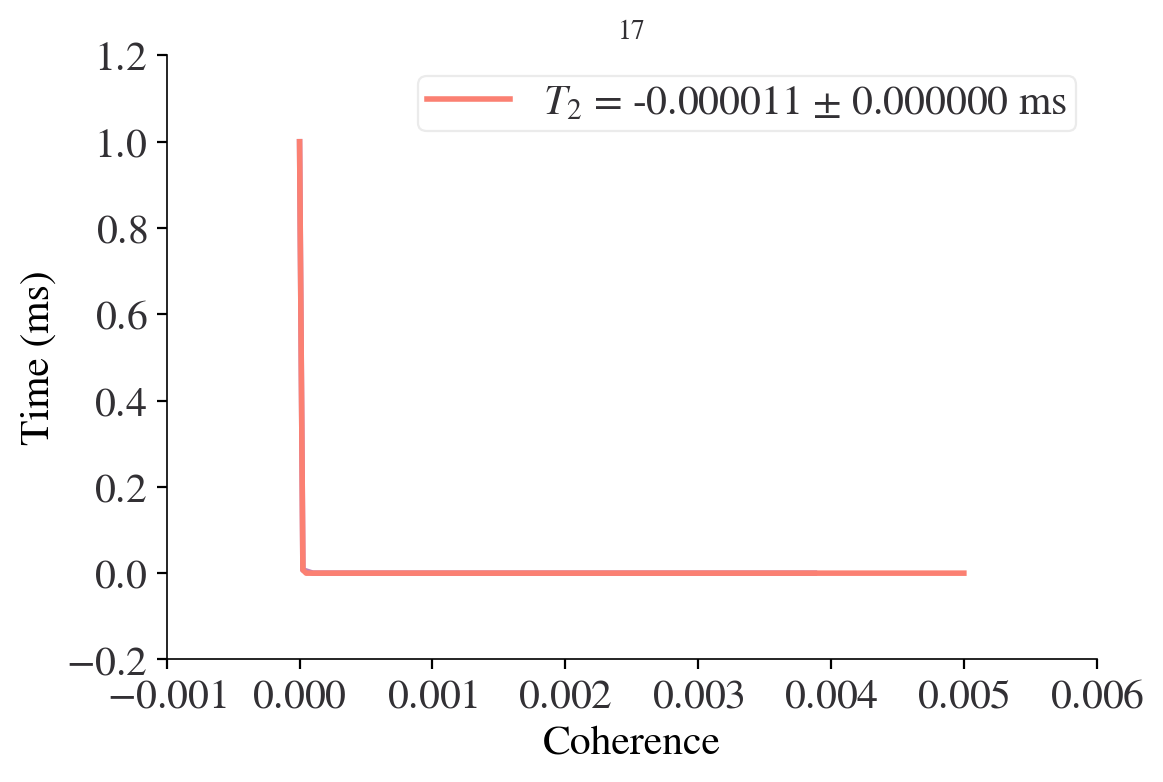

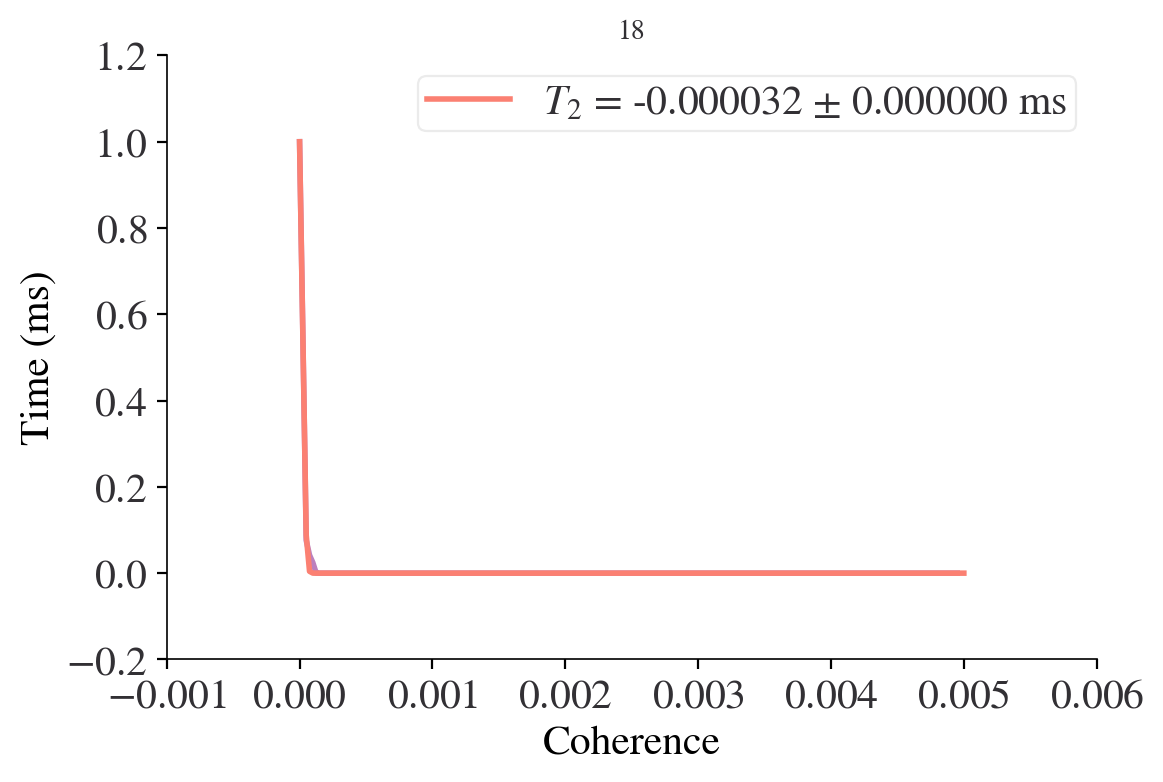

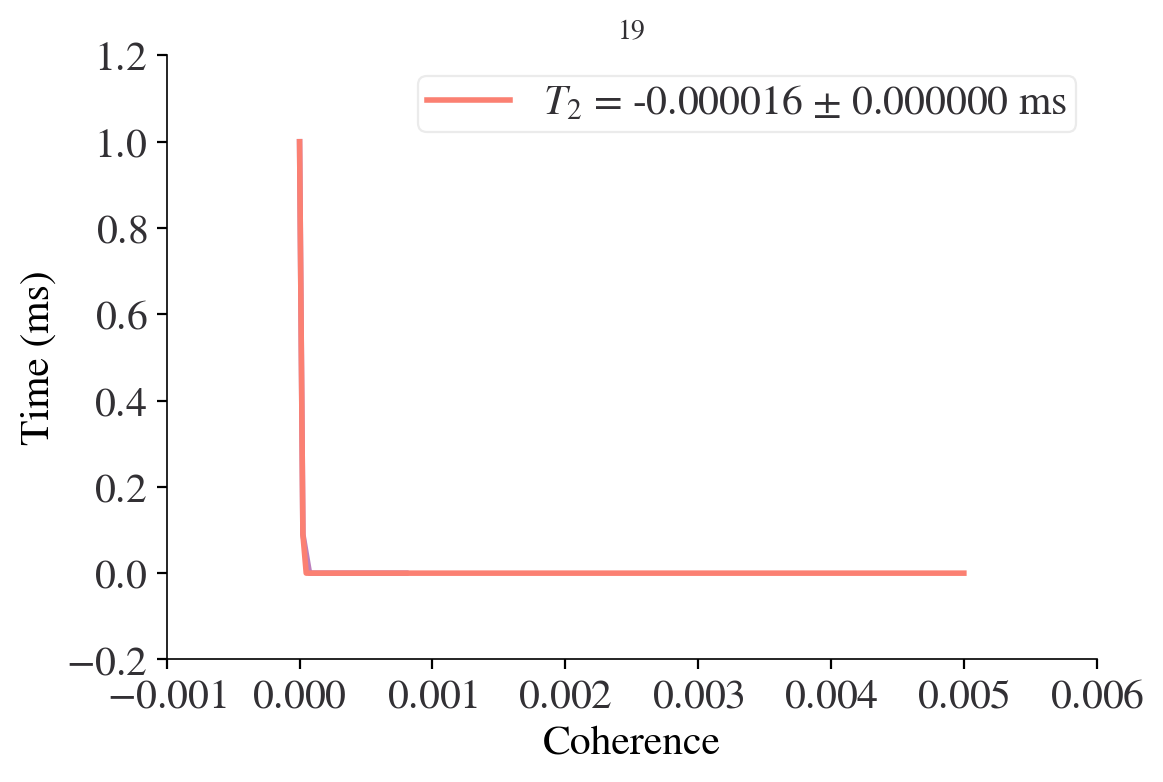

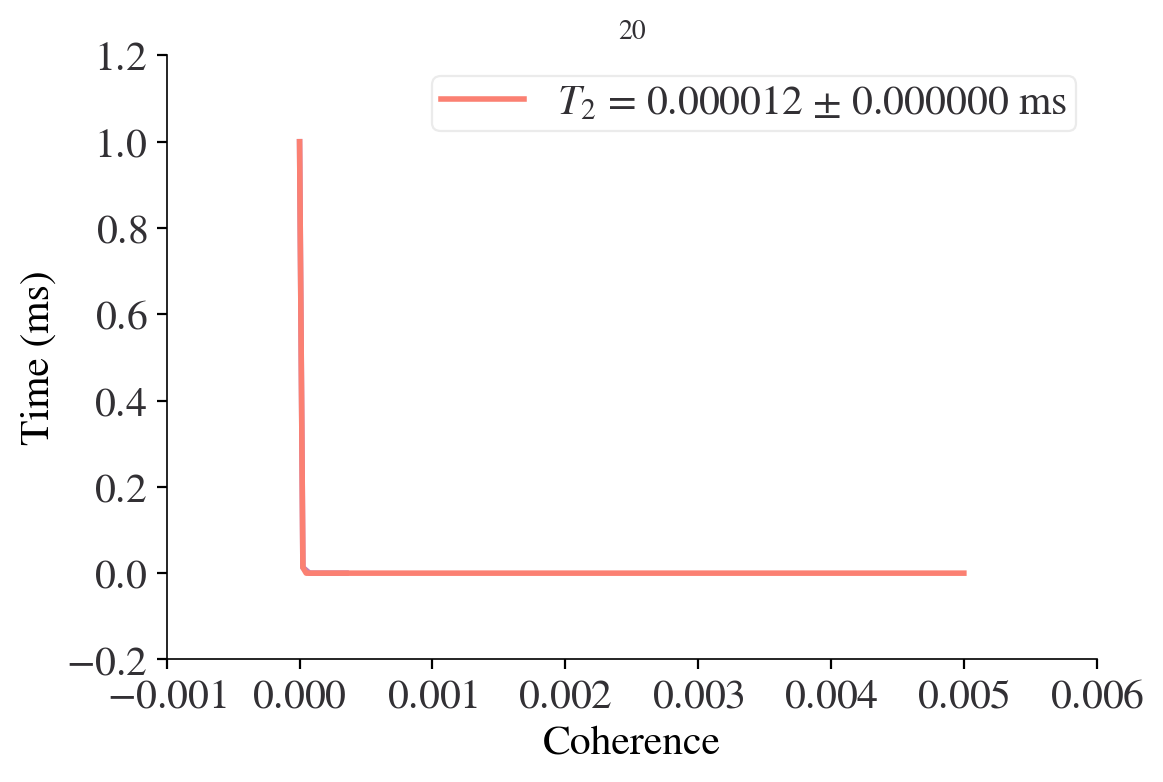

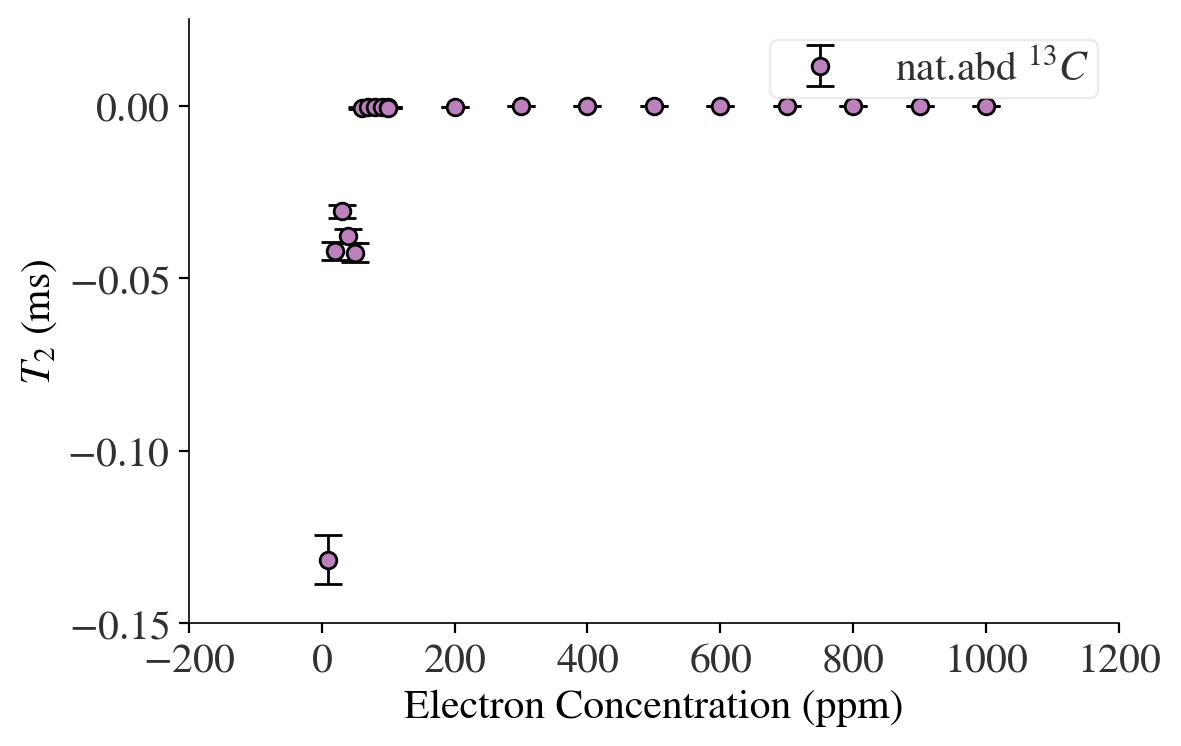

In [37]:


T2_hahn_elec = []
T2_err_hahn_elec = []
n=0
conc_elec = []

concentration = np.linspace(0.00008, 0.0008, 10)

for j in concentration:
    n = n+1
    starttime = time.perf_counter()
    conc_elec.append((j/8)*1e6)

    diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
    diamond.zdir = [1,1,1]
    diamond.add_isotopes(('13C', 0.011))
    diamond.add_atoms(('e', [0.5, 0.5, 1]), type="cell")
    diamond.add_isotopes(('e', j))
    atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
                                               ('C', [0.5, 0.5, 0.5])],
                                  add=[('14N', [0.5, 0.5, 0.5])])
    calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
    time_space = np.linspace(0, 0.05, 201)  # in ms
    l_generatilze = calc.compute(time_space, magnetic_field=b,
                          pulses=pulse_sequence,
                          method='gcce', quantity='coherence')
    
    ''' filter faulty points '''
    l_generatilze_test = l_generatilze.real
    
    time_space_generatilze_fixed = []
    l_generatilze_fixed = []
    for i in np.arange(0,201):
        if l_generatilze_test[i] < 1.25 and l_generatilze_test[i] > 0:
            l_generatilze_fixed.append(l_generatilze_test[i])
            time_space_generatilze_fixed.append(time_space[i])
    
    T2_gen,T2_var = curve_fit(coherence_fit,time_space_generatilze_fixed, l_generatilze_fixed)
    T2_var = np.sqrt(np.abs(T2_var))
    T2_hahn_elec.append(T2_gen[0])
    T2_err_hahn_elec.append(T2_var[0][0])
    
    endtime = time.perf_counter()
    print(starttime-endtime, "secs for calc",n)
    
    plt.figure()
    plt.plot(time_space_generatilze_fixed, l_generatilze_fixed)
    plt.plot(time_space,coherence_fit(time_space,T2_gen[0]), label='$T_2$ = {0:0.6f} $\pm$ {1:0.6f} ms'.format(T2_gen[0],T2_var[0][0]))
    plt.xlabel('Coherence')
    plt.ylabel('Time (ms)')
    plt.legend(loc='best')
    plt.title(n)

concentration = np.linspace(0.0008, 0.008, 10)
for j in concentration:
    n = n+1
    starttime = time.perf_counter()
    conc_elec.append((j/8)*1e6)

    diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
    diamond.zdir = [1,1,1]
    diamond.add_isotopes(('13C', 0.011))
    diamond.add_atoms(('e', [0.5, 0.5, 1]), type="cell")
    diamond.add_isotopes(('e', j))
    atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
                                               ('C', [0.5, 0.5, 0.5])],
                                  add=[('14N', [0.5, 0.5, 0.5])])
    calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
    time_space = np.linspace(0, 0.005, 201)  # in ms
    l_generatilze = calc.compute(time_space, magnetic_field=b,
                          pulses=pulse_sequence,
                          method='gcce', quantity='coherence')
    
    ''' filter faulty points '''
    l_generatilze_test = l_generatilze.real
    
    time_space_generatilze_fixed = []
    l_generatilze_fixed = []
    for i in np.arange(0,201):
        if l_generatilze_test[i] < 1.25 and l_generatilze_test[i] > 0:
            l_generatilze_fixed.append(l_generatilze_test[i])
            time_space_generatilze_fixed.append(time_space[i])
    
    T2_gen,T2_var = curve_fit(coherence_fit,time_space_generatilze_fixed, l_generatilze_fixed)
    T2_var = np.sqrt(np.abs(T2_var))
    T2_hahn_elec.append(T2_gen[0])
    T2_err_hahn_elec.append(T2_var[0][0])
    
    endtime = time.perf_counter()
    print(starttime-endtime, "secs for calc",n)
    
    plt.figure()
    plt.plot(time_space_generatilze_fixed, l_generatilze_fixed)
    plt.plot(time_space,coherence_fit(time_space,T2_gen[0]), label='$T_2$ = {0:0.6f} $\pm$ {1:0.6f} ms'.format(T2_gen[0],T2_var[0][0]))
    plt.xlabel('Coherence')
    plt.ylabel('Time (ms)')
    plt.legend(loc='best')
    plt.title(n)

datasavefile = 'self_datapoints_T2_elec_conc_substi.csv'
data_elec_T2_conc = {'conc_elec':conc_elec,   'T2_hahn_elec':T2_hahn_elec, 'T2_err_hahn_elec':T2_err_hahn_elec}

df = pd.DataFrame(data = data_elec_T2_conc)
df.to_csv(datasavefile)

plt.figure()
plt.errorbar(conc_elec, T2_hahn_elec, yerr=T2_err_hahn_elec, fmt='o', ecolor='k', elinewidth=1, capsize=5, label='nat.abd $^{13}C$')
plt.xlabel('Electron Concentration (ppm)')
plt.ylabel('$T_2$ (ms)')
plt.legend()

outpath = 'self_atomnumb_T2_elec_conc_substi.png'
plt.savefig(outpath)

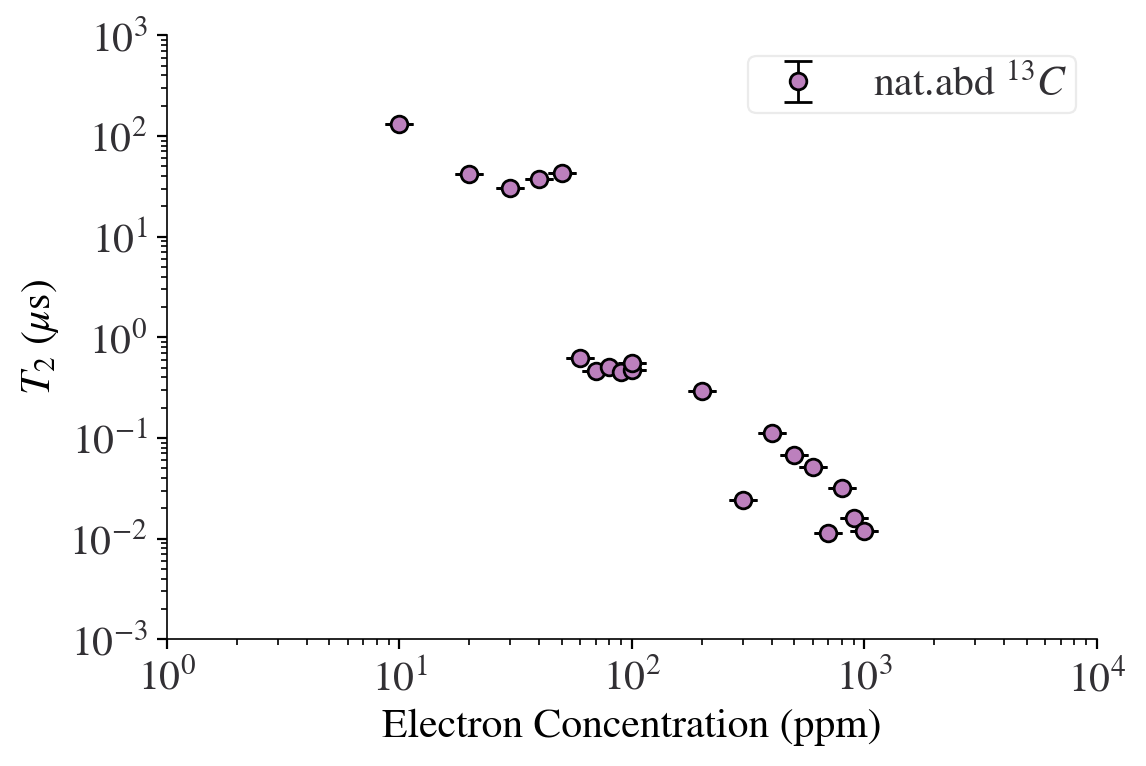

In [43]:
datasavefile = 'self_datapoints_T2_elec_conc_substi.csv'
data_elec_T2_conc = {'conc_elec':conc_elec,   'T2_hahn_elec':T2_hahn_elec, 'T2_err_hahn_elec':T2_err_hahn_elec}

df = pd.DataFrame(data = data_elec_T2_conc)
df.to_csv(datasavefile)

plt.figure()
plt.errorbar(conc_elec, np.multiply(np.abs(T2_hahn_elec),1000), yerr=T2_err_hahn_elec, fmt='o', ecolor='k', elinewidth=1, capsize=5, label='nat.abd $^{13}C$')
plt.xlabel('Electron Concentration (ppm)')
plt.ylabel('$T_2$ ($\mu$s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

outpath = 'self_atomnumb_T2_elec_conc_substi.png'
plt.savefig(outpath)

-1630.4675710999873 secs for calc 1
-1662.3626484000124 secs for calc 2
-1819.4055564000155 secs for calc 3
-1873.046222200006 secs for calc 4
-1839.5452645999903 secs for calc 5
-1825.5447941000166 secs for calc 6
-1903.0389002999873 secs for calc 7
-1980.442802000005 secs for calc 8
-1953.7000427000166 secs for calc 9
-1934.391696400009 secs for calc 10
-2842.0711220999947 secs for calc 11
-1965.6172343999788 secs for calc 12
-2131.045647700026 secs for calc 13
-2307.178630999988 secs for calc 14
-2763.787962400005 secs for calc 15
-3234.4325865999854 secs for calc 16
-3578.7578300999885 secs for calc 17
-3965.5049591000134 secs for calc 18
-3819.397974100022 secs for calc 19
-4037.451716200012 secs for calc 20


C:\Users\Daniel Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


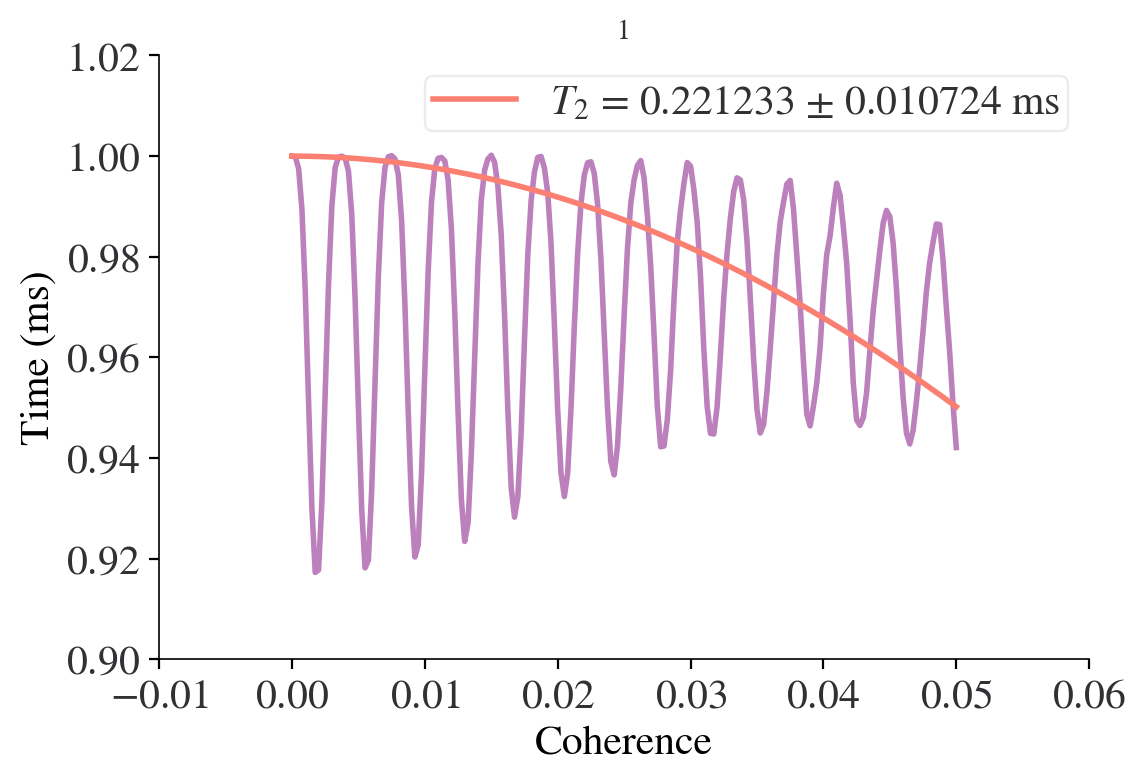

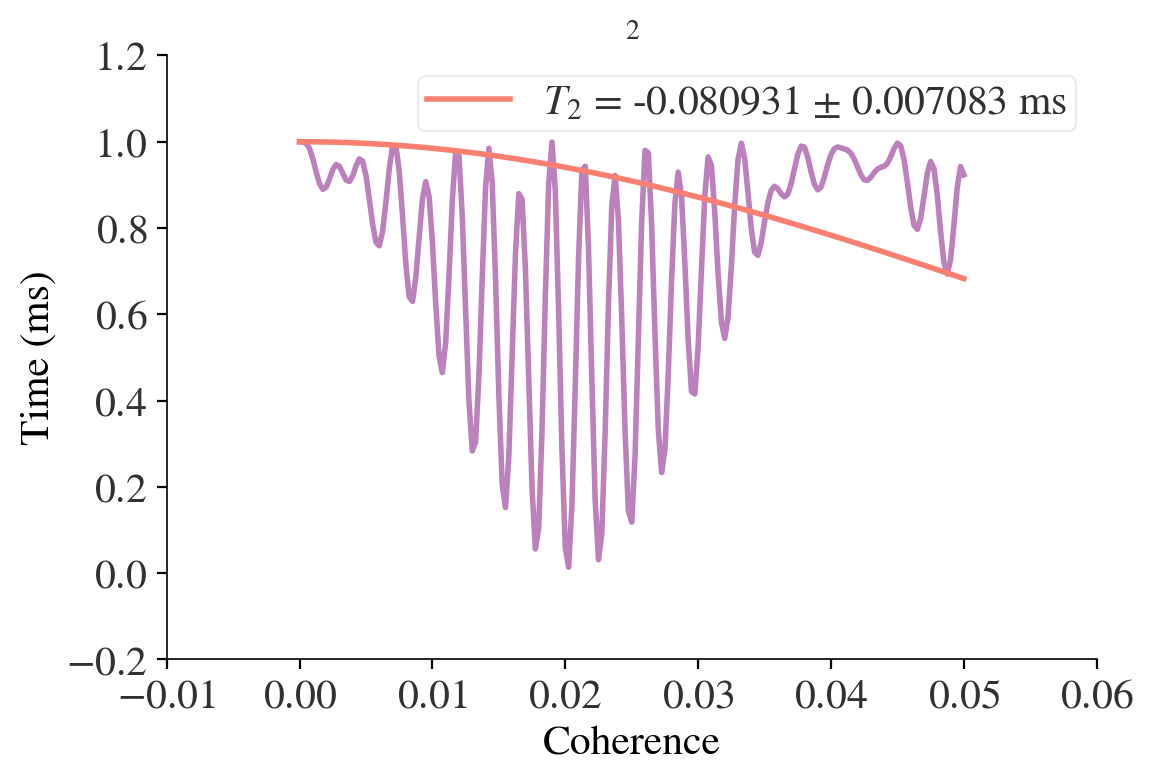

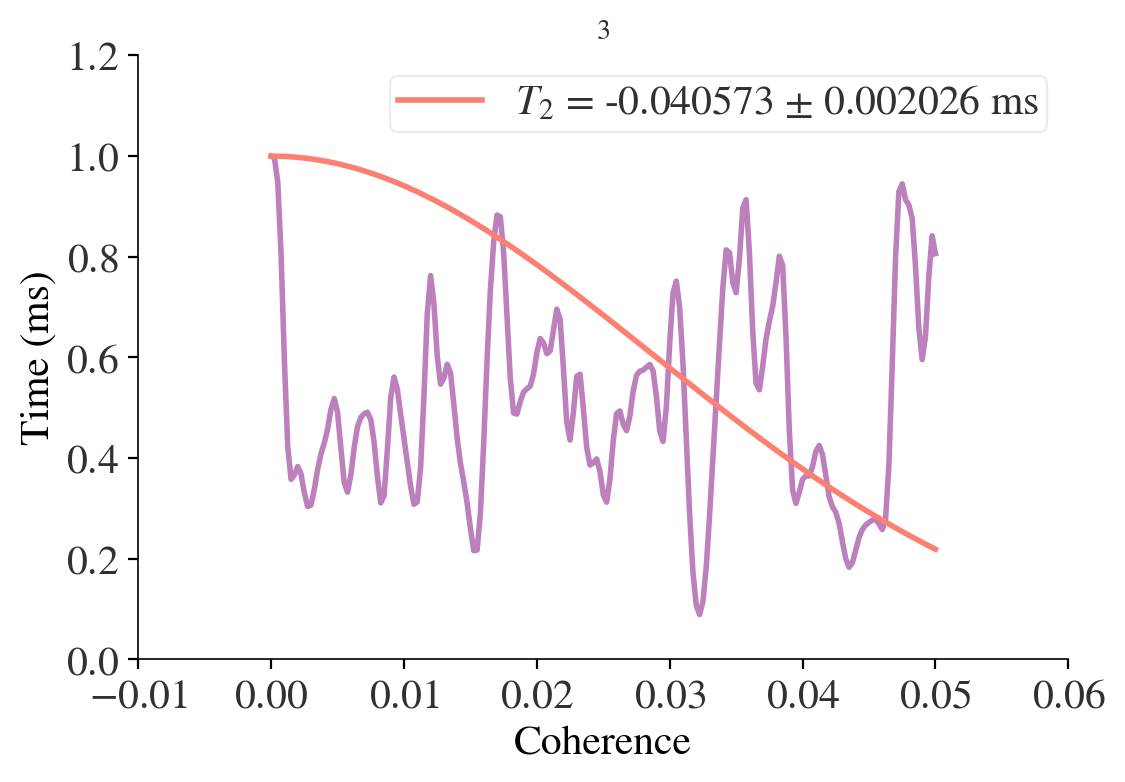

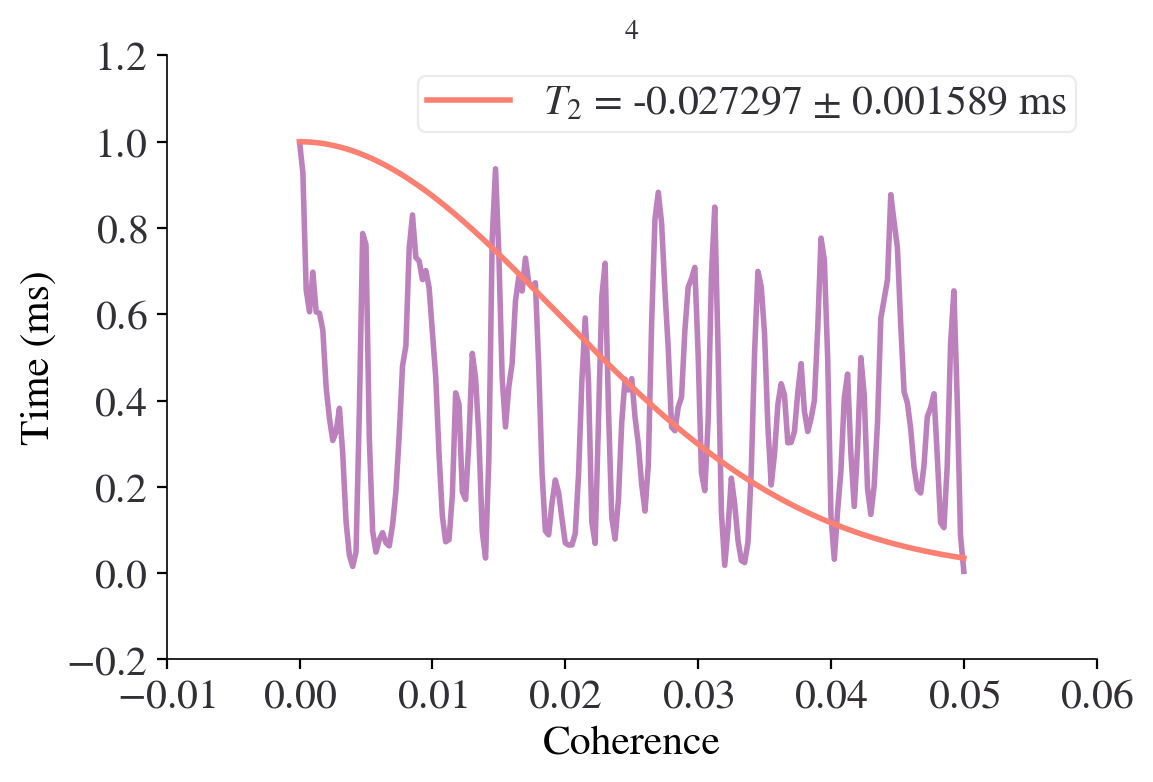

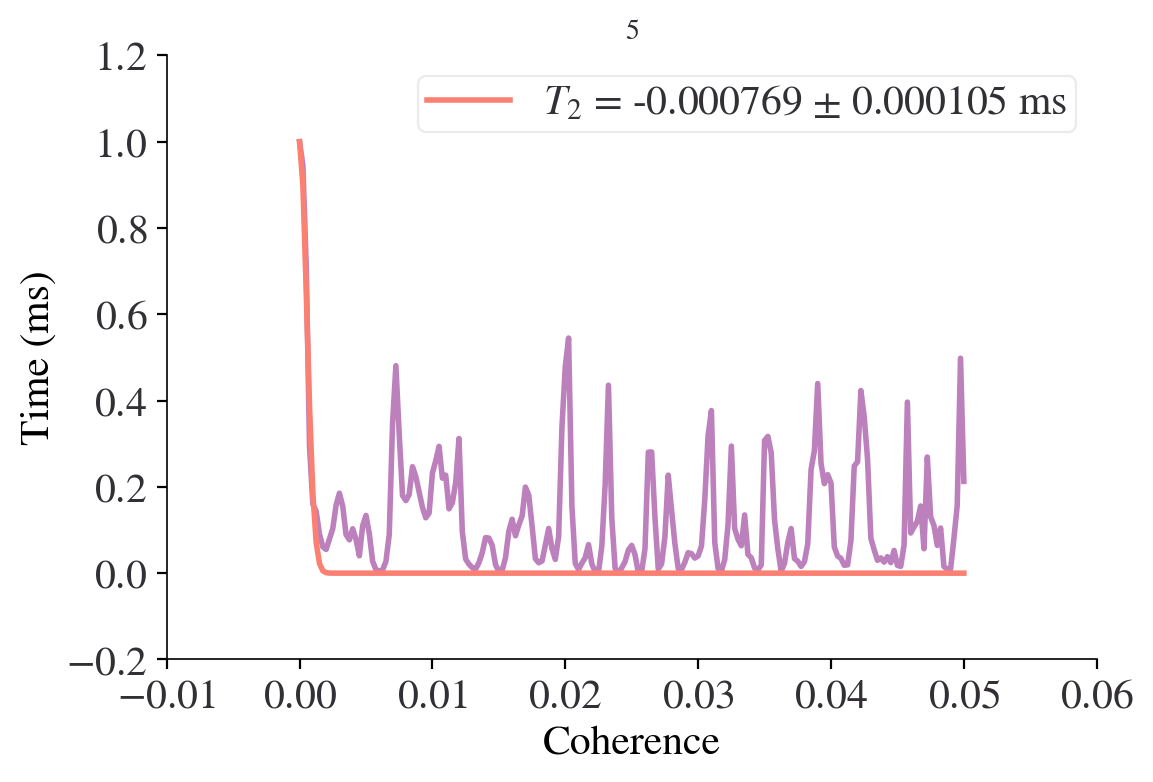

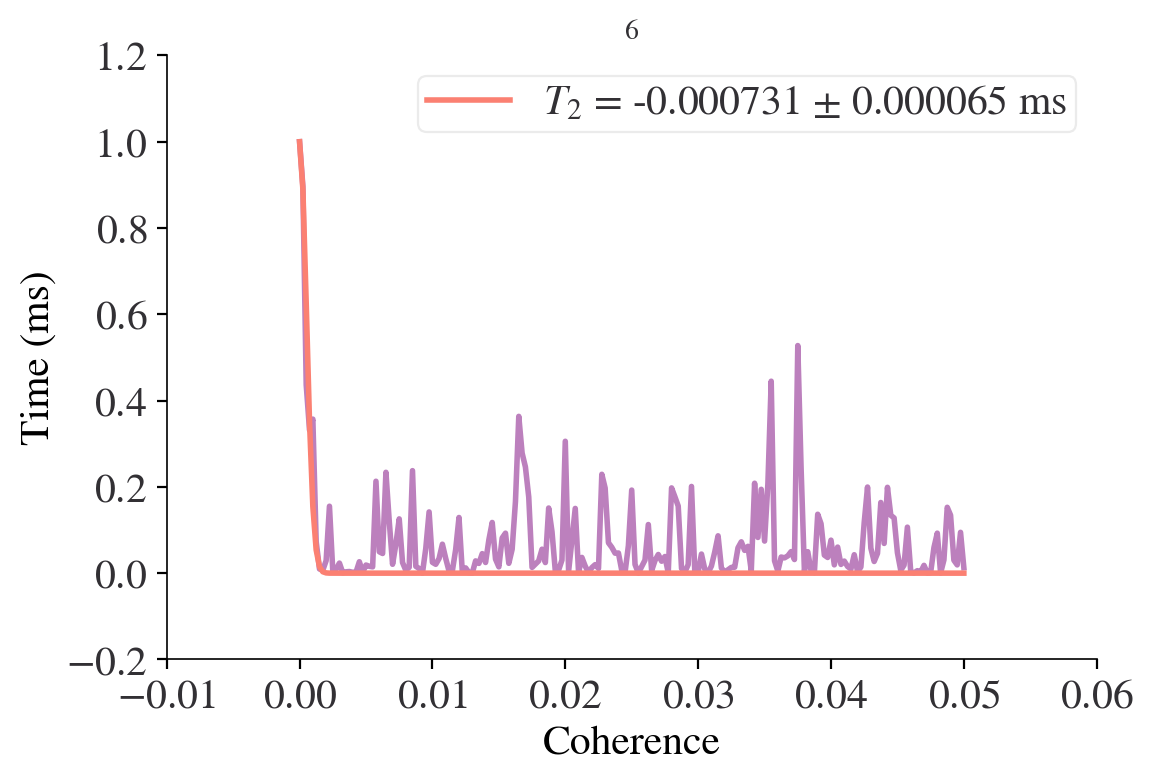

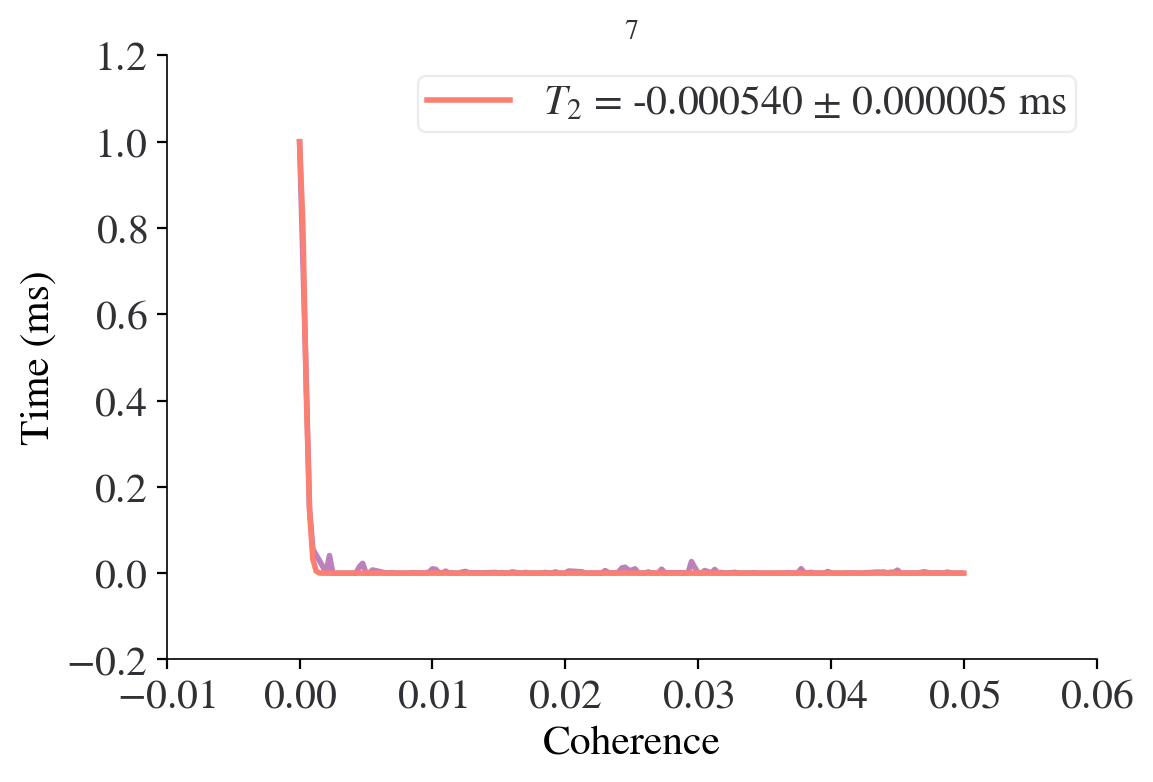

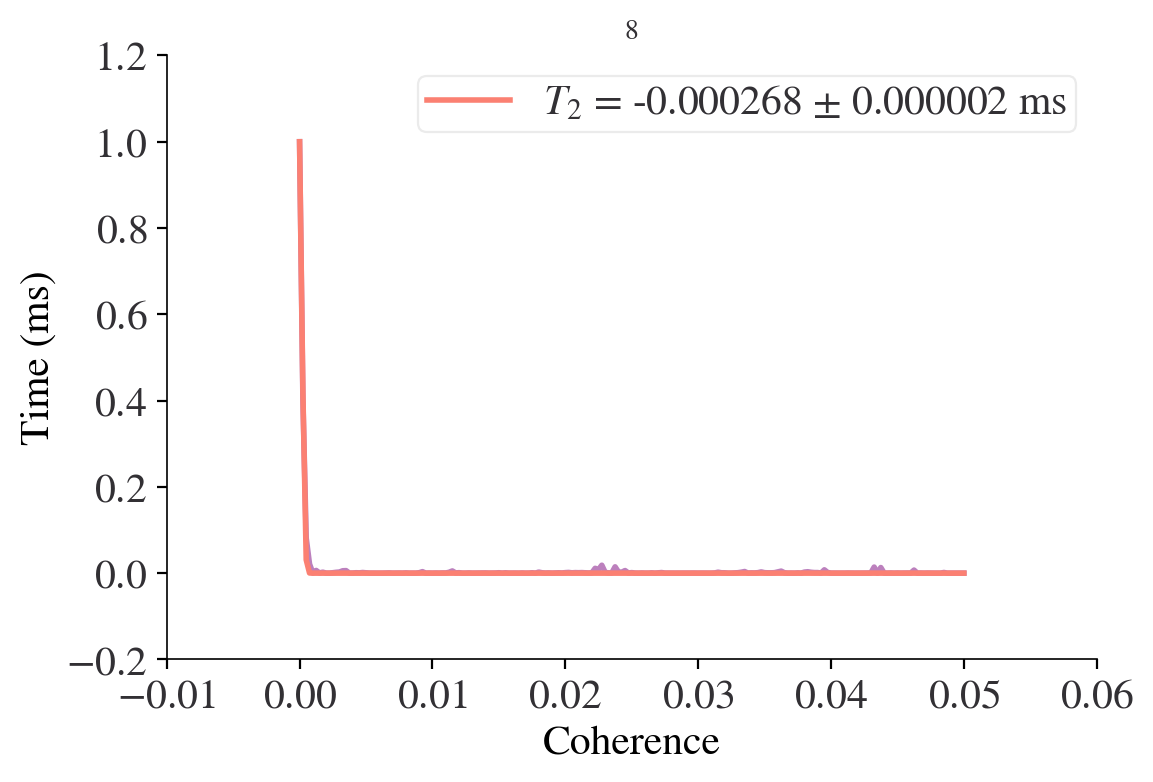

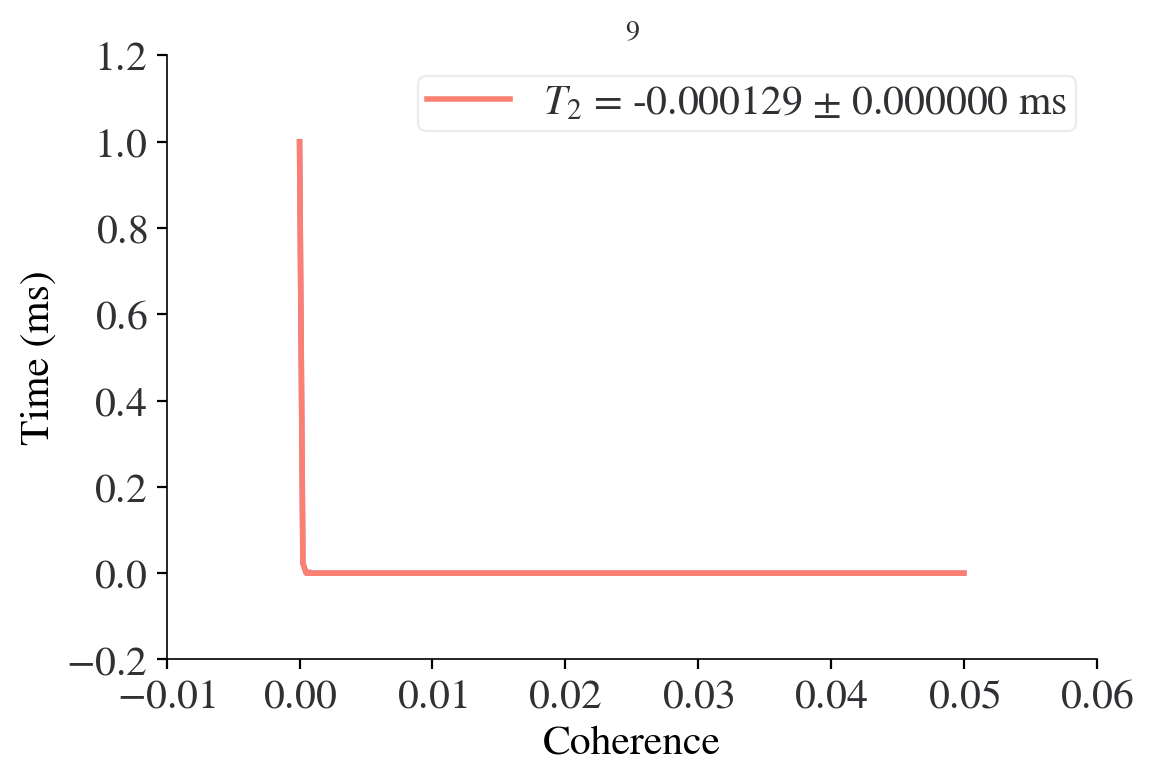

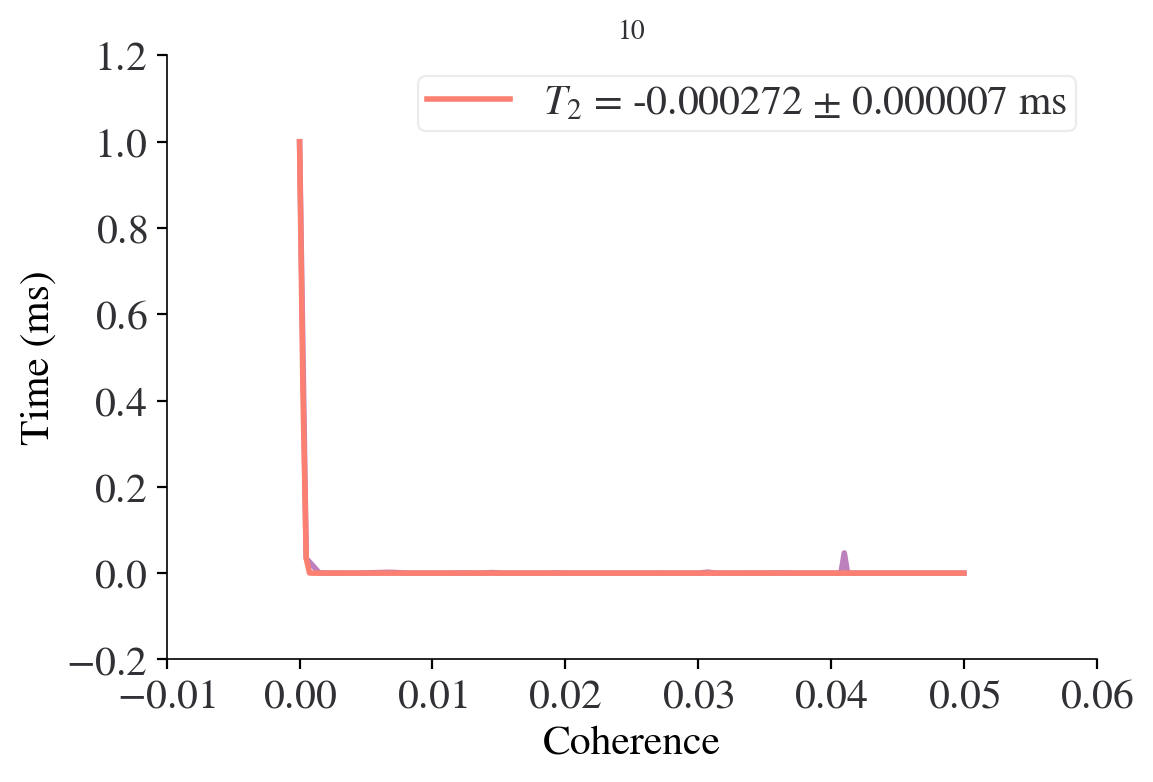

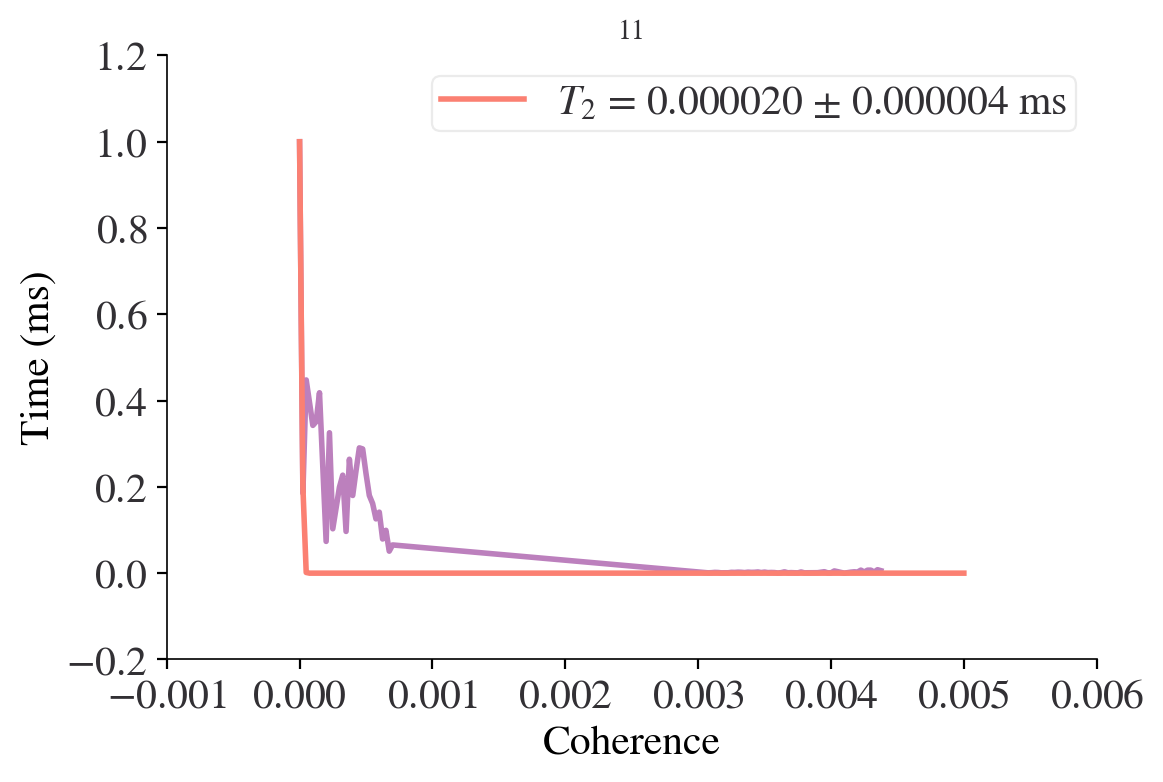

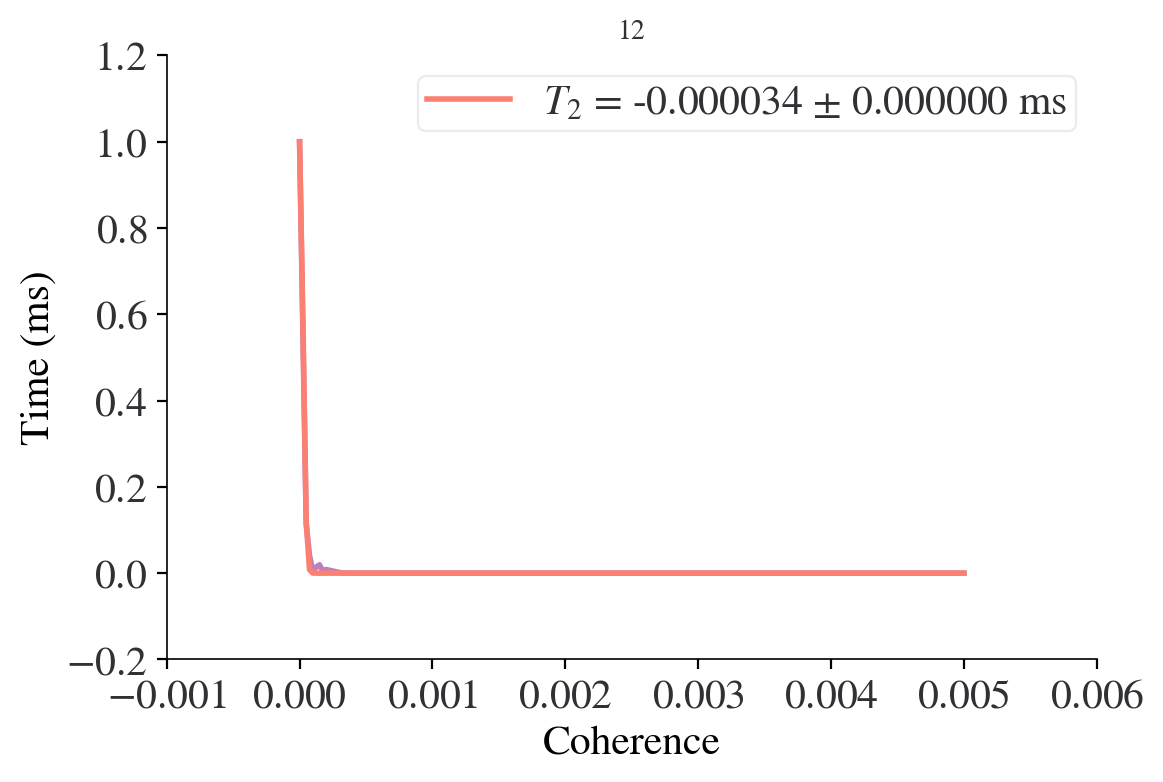

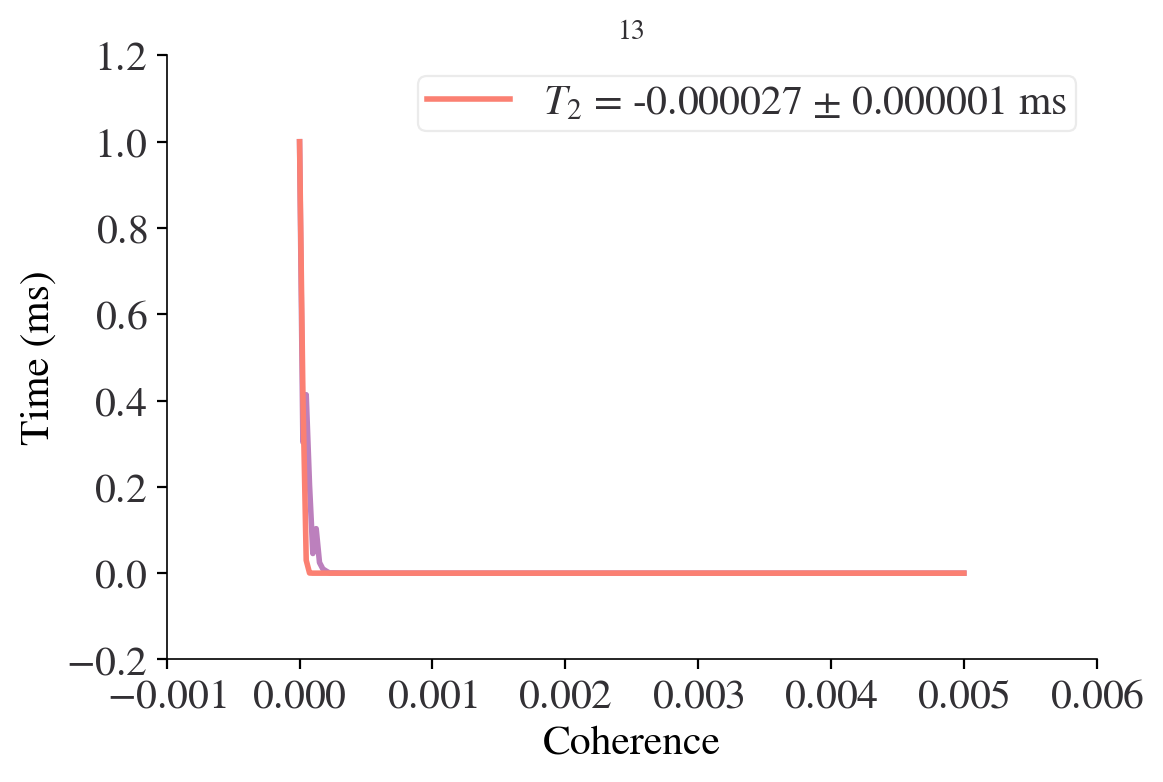

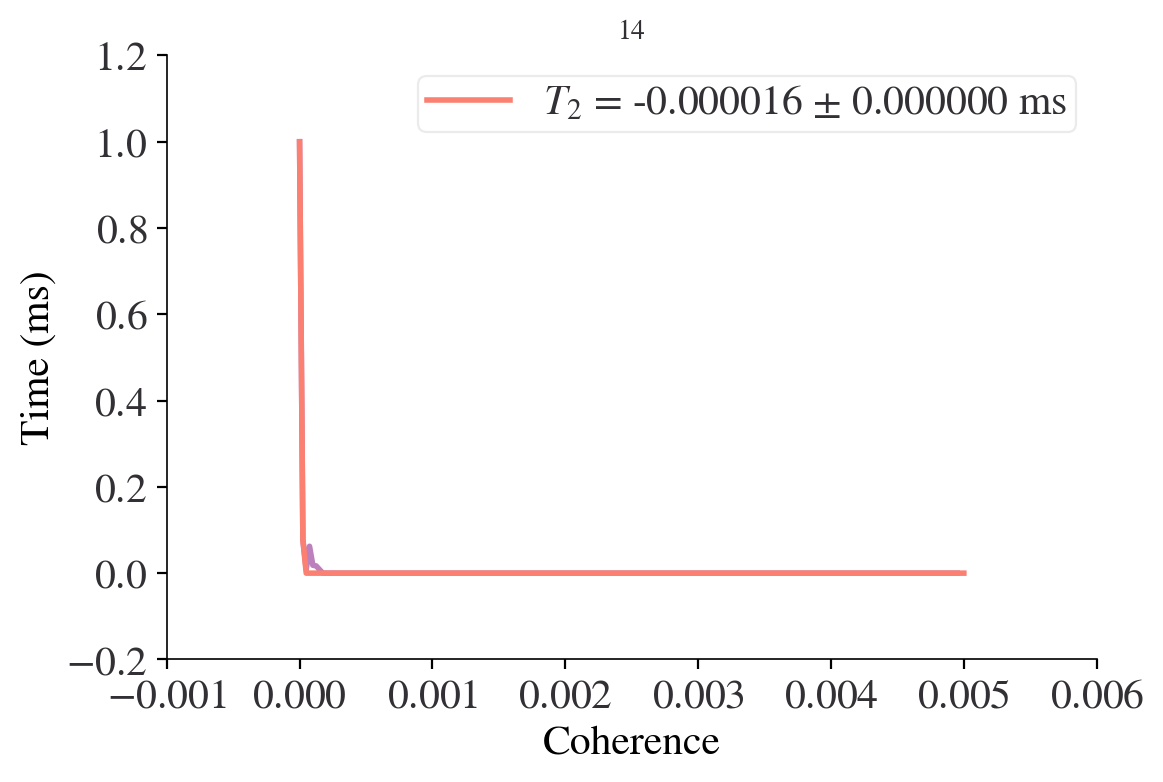

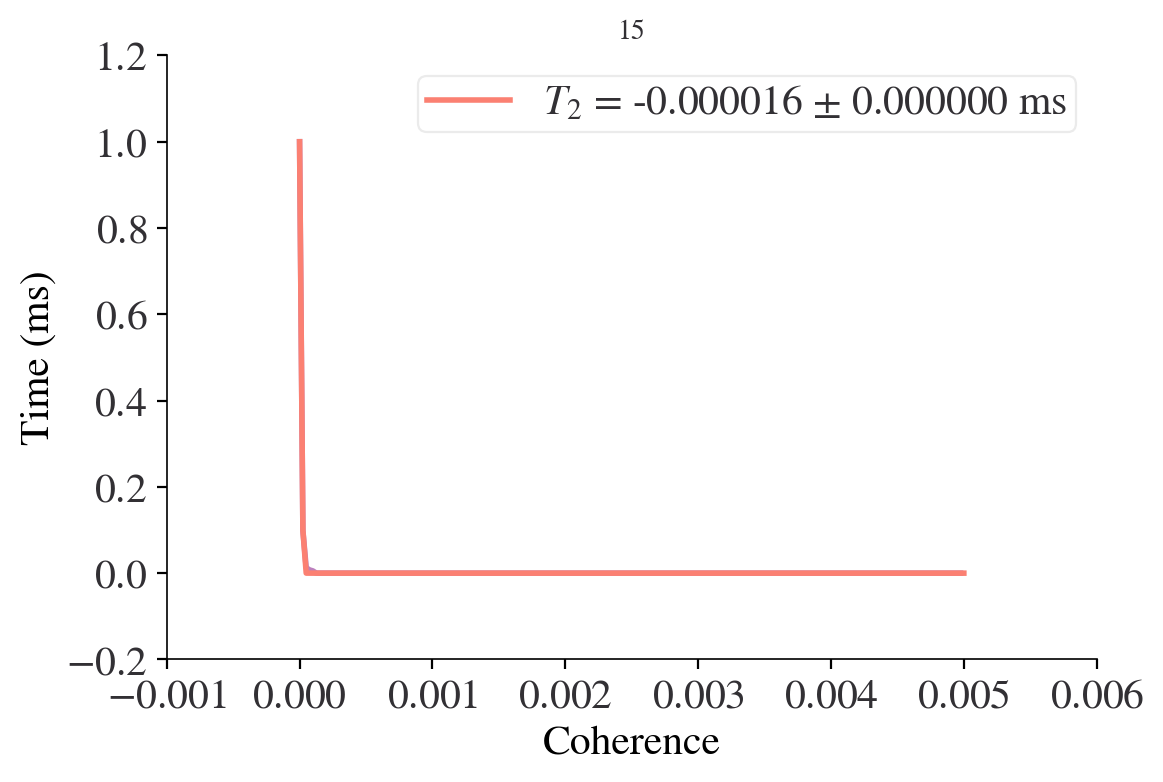

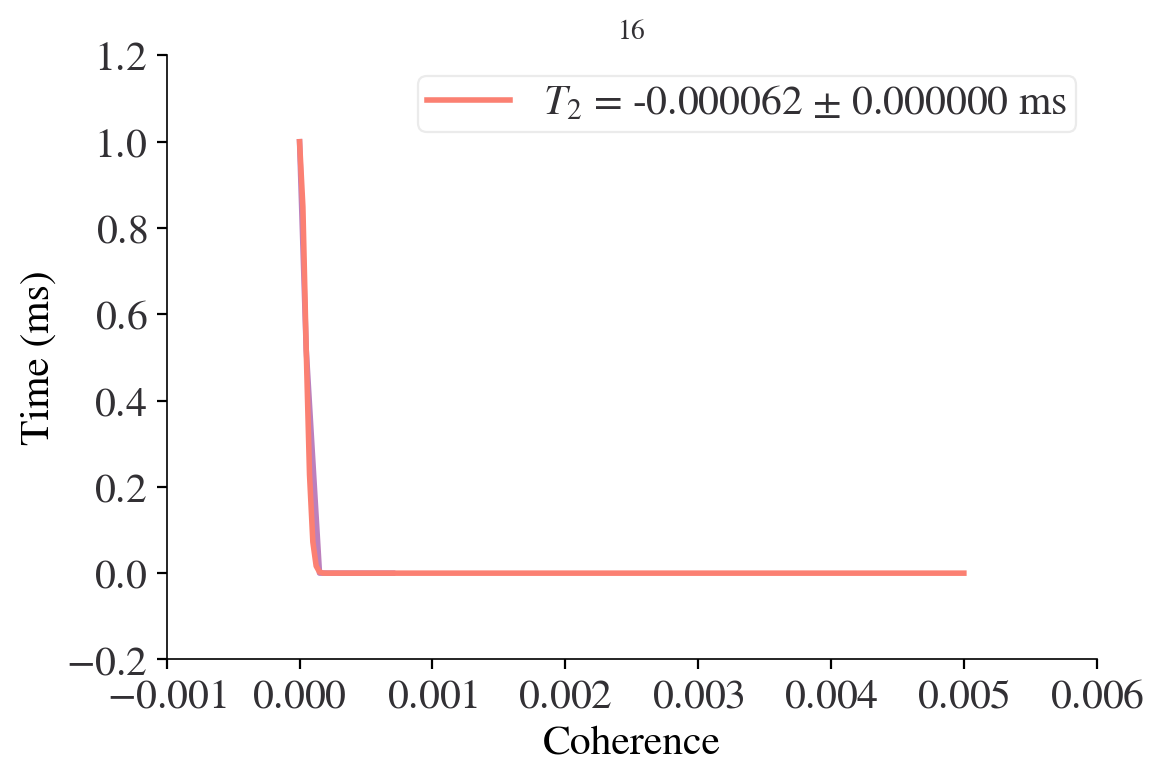

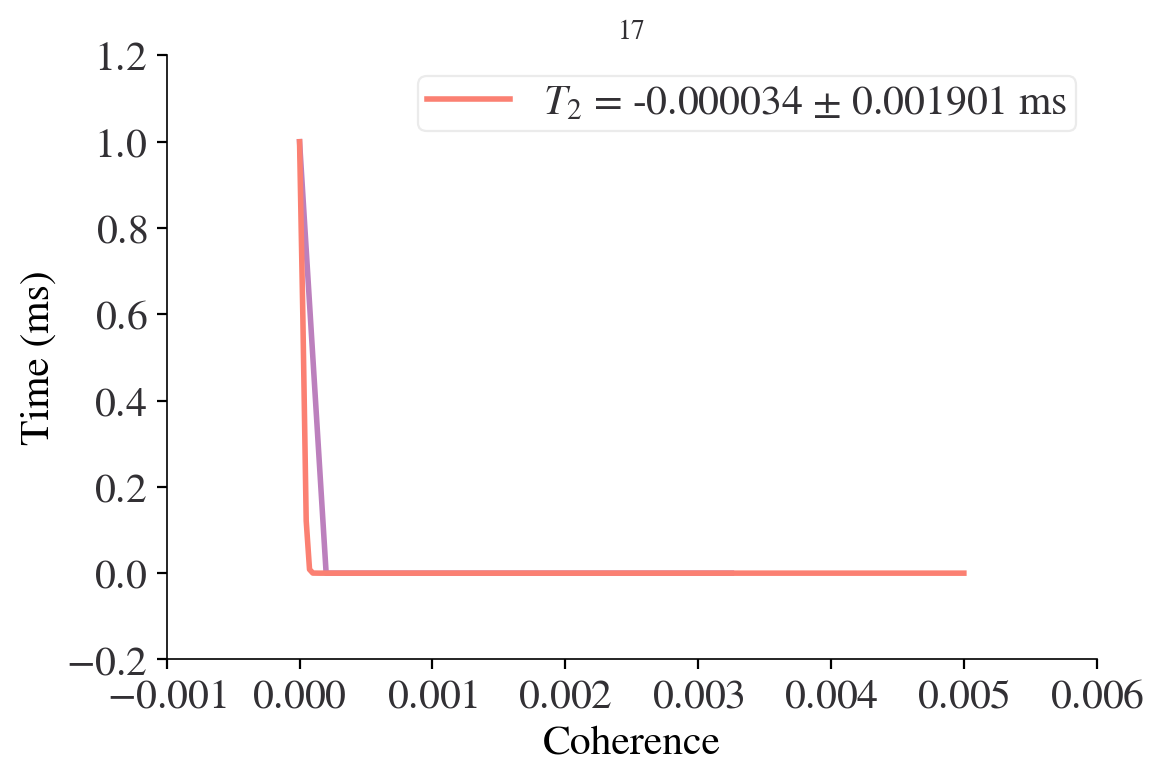

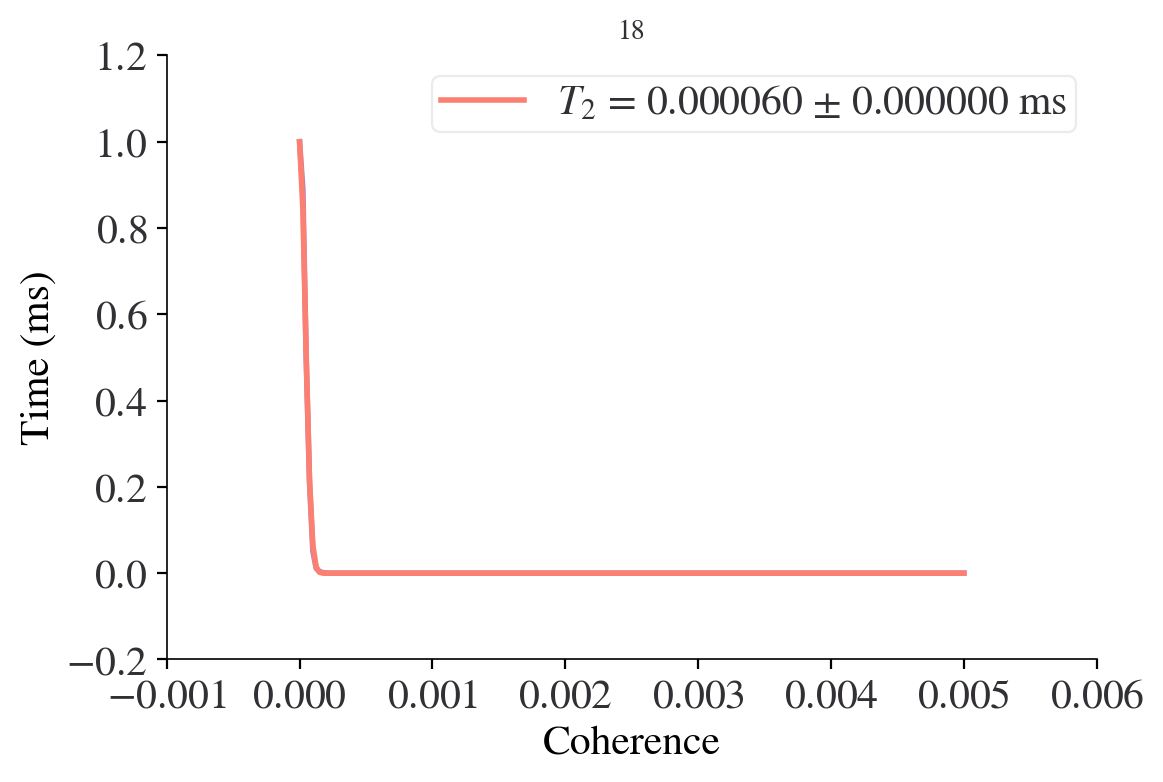

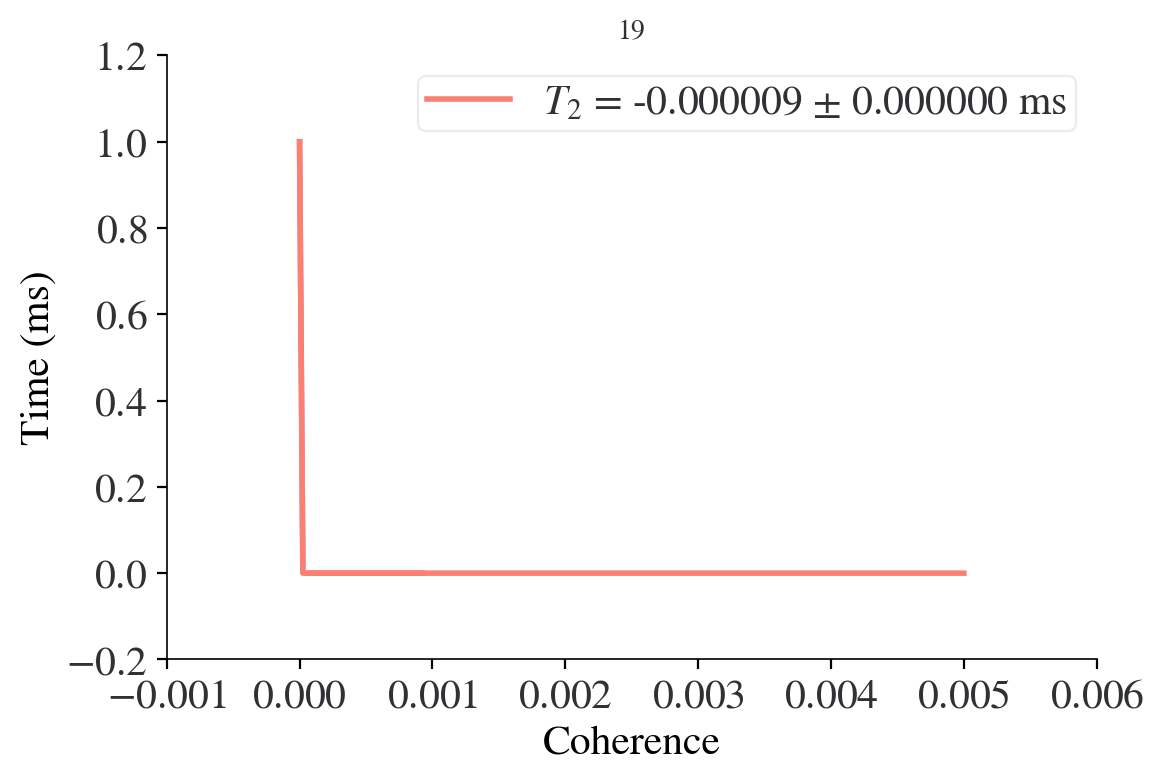

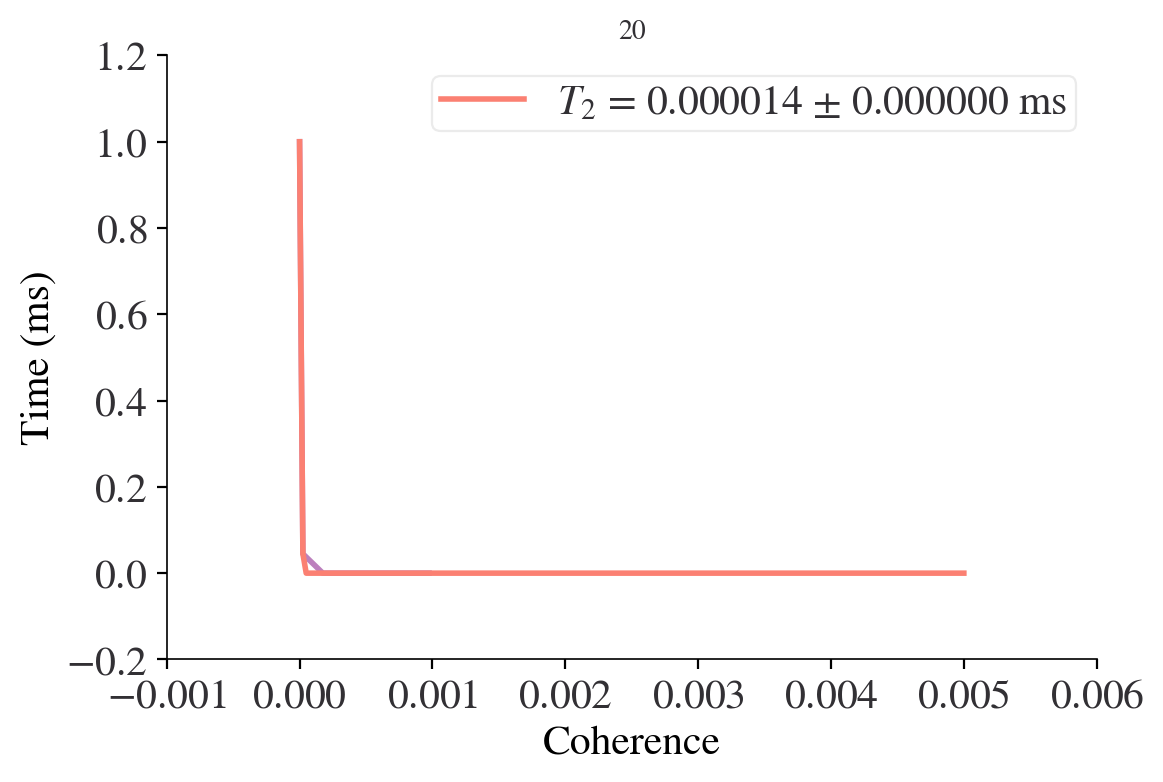

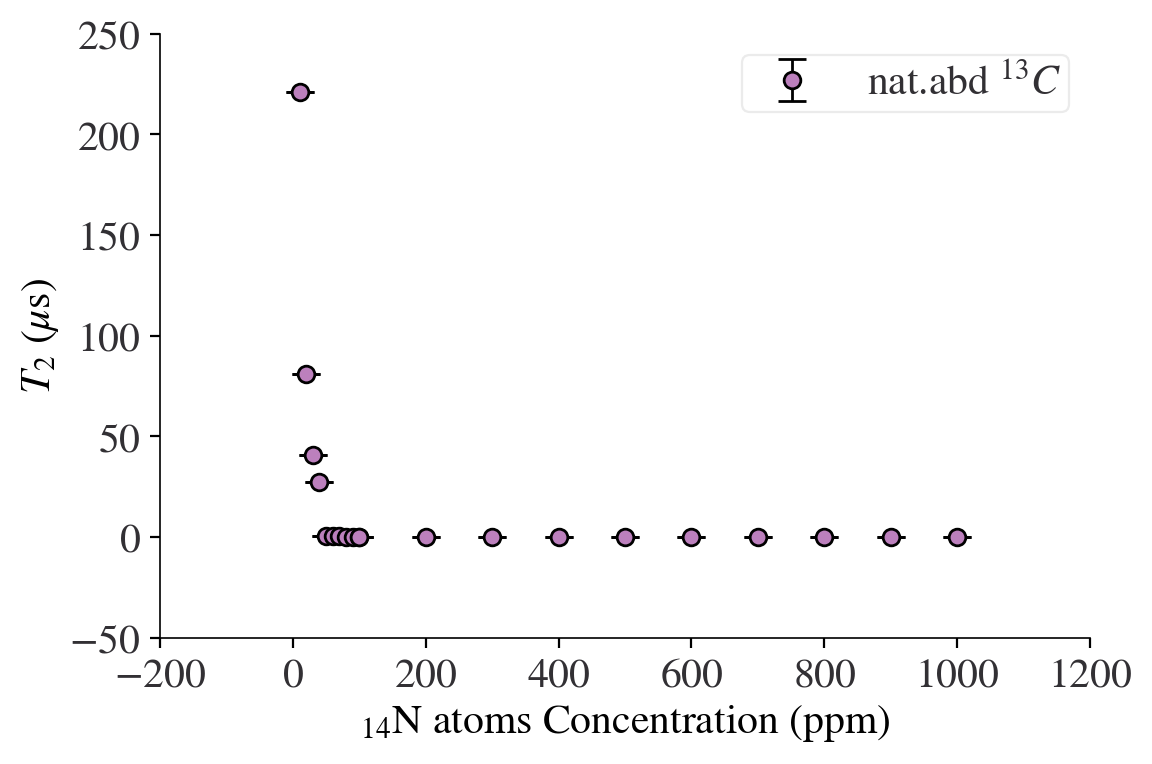

In [81]:


T2_hahn_elec = []
T2_err_hahn_elec = []
n=0
conc_elec = []

concentration = np.linspace(0.00008, 0.0008, 10)

for j in concentration:
    n = n+1
    starttime = time.perf_counter()
    conc_elec.append((j/8)*1e6)

    diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
    diamond.zdir = [1,1,1]
    diamond.add_isotopes(('13C', 0.011))
    diamond.add_atoms(('e', [0.51, 0.51, 1.1]), type="cell")
    diamond.add_isotopes(('e', j))
    diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
    diamond.add_isotopes(('14N', j))
    atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
                                               ('C', [0.5, 0.5, 0.5])],
                                  add=[('14N', [0.5, 0.5, 0.5])])
    calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
    time_space = np.linspace(0, 0.05, 201)  # in ms
    l_generatilze = calc.compute(time_space, magnetic_field=b,
                          pulses=pulse_sequence,
                          method='gcce', quantity='coherence')
    
    ''' filter faulty points '''
    l_generatilze_test = l_generatilze.real
    
    time_space_generatilze_fixed = []
    l_generatilze_fixed = []
    for i in np.arange(0,201):
        if l_generatilze_test[i] < 1.25 and l_generatilze_test[i] > 0:
            l_generatilze_fixed.append(l_generatilze_test[i])
            time_space_generatilze_fixed.append(time_space[i])
    
    T2_gen,T2_var = curve_fit(coherence_fit,time_space_generatilze_fixed, l_generatilze_fixed)
    T2_var = np.sqrt(np.abs(T2_var))
    T2_hahn_elec.append(np.abs(T2_gen[0])*1000)
    T2_err_hahn_elec.append(T2_var[0][0])
    
    endtime = time.perf_counter()
    print(starttime-endtime, "secs for calc",n)
    
    plt.figure()
    plt.plot(time_space_generatilze_fixed, l_generatilze_fixed)
    plt.plot(time_space,coherence_fit(time_space,T2_gen[0]), label='$T_2$ = {0:0.6f} $\pm$ {1:0.6f} ms'.format(T2_gen[0],T2_var[0][0]))
    plt.xlabel('Coherence')
    plt.ylabel('Time (ms)')
    plt.legend(loc='best')
    plt.title(n)

concentration = np.linspace(0.0008, 0.008, 10)
for j in concentration:
    n = n+1
    starttime = time.perf_counter()
    conc_elec.append((j/8)*1e6)

    diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
    diamond.zdir = [1,1,1]
    diamond.add_isotopes(('13C', 0.011))
    diamond.add_atoms(('e', [0.51, 0.51, 1.1]), type="cell")
    diamond.add_isotopes(('e', j))
    diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
    diamond.add_isotopes(('14N', j))
    atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
                                               ('C', [0.5, 0.5, 0.5])],
                                  add=[('14N', [0.5, 0.5, 0.5])])
    calc = pc.Simulator(spin=nv, bath=atoms, r_bath=r_bath, r_dipole=r_dipole, order=order)
    time_space = np.linspace(0, 0.005, 201)  # in ms
    l_generatilze = calc.compute(time_space, magnetic_field=b,
                          pulses=pulse_sequence,
                          method='gcce', quantity='coherence')
    
    ''' filter faulty points '''
    l_generatilze_test = l_generatilze.real
    
    time_space_generatilze_fixed = []
    l_generatilze_fixed = []
    for i in np.arange(0,201):
        if l_generatilze_test[i] < 1.25 and l_generatilze_test[i] > 0:
            l_generatilze_fixed.append(l_generatilze_test[i])
            time_space_generatilze_fixed.append(time_space[i])
    
    T2_gen,T2_var = curve_fit(coherence_fit,time_space_generatilze_fixed, l_generatilze_fixed)
    T2_var = np.sqrt(np.abs(T2_var))
    T2_hahn_elec.append(np.abs(T2_gen[0])*1000)
    T2_err_hahn_elec.append(T2_var[0][0])
    
    endtime = time.perf_counter()
    print(starttime-endtime, "secs for calc",n)
    
    plt.figure()
    plt.plot(time_space_generatilze_fixed, l_generatilze_fixed)
    plt.plot(time_space,coherence_fit(time_space,T2_gen[0]), label='$T_2$ = {0:0.6f} $\pm$ {1:0.6f} ms'.format(T2_gen[0],T2_var[0][0]))
    plt.xlabel('Coherence')
    plt.ylabel('Time (ms)')
    plt.legend(loc='best')
    plt.title(n)

datasavefile = 'self_datapoints_T2_mix_conc_substi.csv'
data_elec_T2_conc = {'conc_elec':conc_elec,   'T2_hahn_elec':T2_hahn_elec, 'T2_err_hahn_elec':T2_err_hahn_elec}

df = pd.DataFrame(data = data_elec_T2_conc)
df.to_csv(datasavefile)

plt.figure()
plt.errorbar(conc_elec, T2_hahn_elec, yerr=T2_err_hahn_elec, fmt='o', ecolor='k', elinewidth=1, capsize=5, label='nat.abd $^{13}C$')
plt.xlabel('$_{14}$N atoms Concentration (ppm)')
plt.ylabel('$T_2$ ($\mu$s)')
plt.legend()

outpath = 'self_atomnumb_T2_mix_conc_substi.png'
plt.savefig(outpath)

In [80]:
diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
diamond.zdir = [1,1,1]
diamond.add_isotopes(('13C', 0.011))
diamond.add_atoms(('e', [0.51, 0.51, 101]), type="cell")
diamond.add_isotopes(('e', 0.00008))
diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
diamond.add_isotopes(('14N', 0.00008))
atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
                                               ('C', [0.5, 0.5, 0.5])],
                                  add=[('14N', [0.5, 0.5, 0.5])])
print(len(atoms))

diamond = pc.read_ase(bulk('C', 'diamond', cubic=True))
diamond.zdir = [1,1,1]
diamond.add_isotopes(('13C', 0.011))
diamond.add_atoms(('e', [0.51, 0.51, 101]), type="cell")
diamond.add_isotopes(('e', 0.008))
diamond.add_atoms(('N', [0.5, 0.5, 1]), type="cell")
diamond.add_isotopes(('14N', 0.008))
atoms = diamond.gen_supercell(bathsize, remove=[('C', [0., 0, 0]),
                                               ('C', [0.5, 0.5, 0.5])],
                                  add=[('14N', [0.5, 0.5, 0.5])])
print(len(atoms))

2151
2537


gradient = -2.009193631394563 $\pm$ 0.2544232936741354


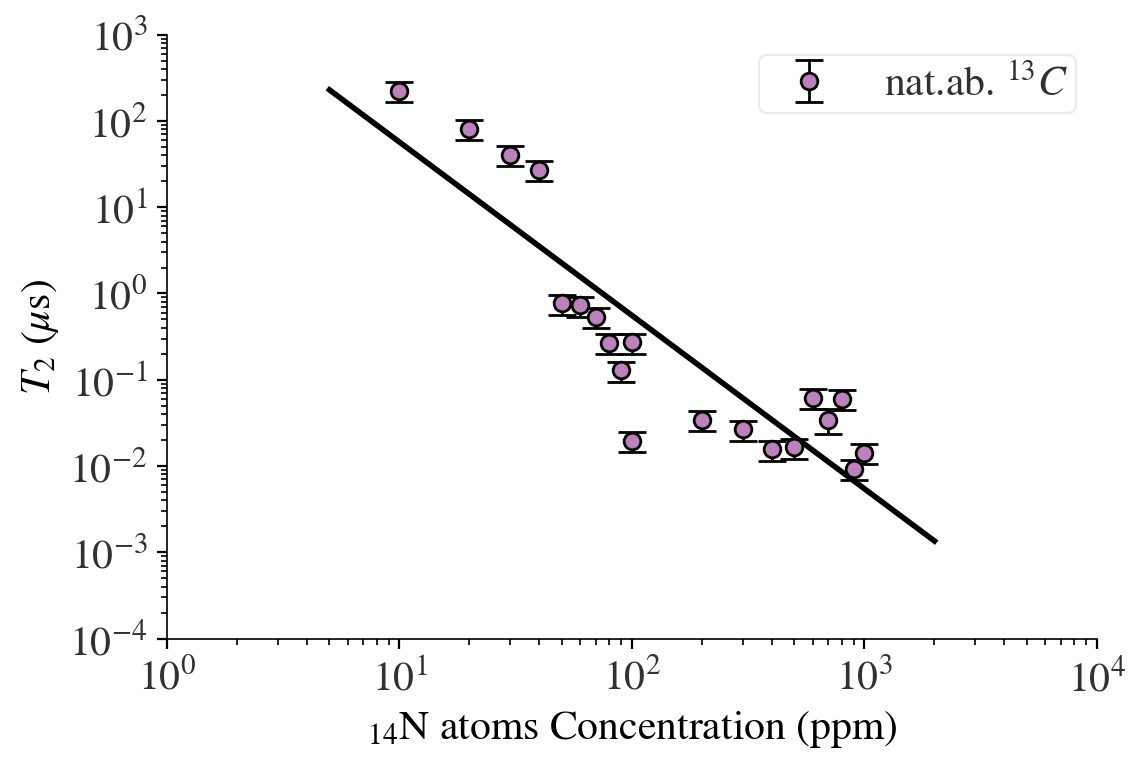

In [99]:
T2_percenterror = 0.26046

T2_trueerr_hahn_elec = np.multiply( np.add( np.divide( T2_err_hahn_elec,T2_hahn_elec ),T2_percenterror ),T2_hahn_elec )

def linear(x, m, c):
    y = m*x + c
    return y

fit,var = curve_fit(linear, np.log(conc_elec), np.log(T2_hahn_elec))
m_fit = fit[0]
c_fit = fit[1]
m_fit_err = np.sqrt(var[0][0])
c_fit_err = np.sqrt(var[1][1])

print( 'gradient =', m_fit, '$\pm$', m_fit_err)

X = np.linspace(5,2000, 100)
Y = np.exp(c_fit)*(X**(m_fit)) 

plt.figure()
plt.plot(X,Y, 'k')
plt.errorbar(conc_elec, T2_hahn_elec, yerr=T2_trueerr_hahn_elec, fmt='o', ecolor='k', elinewidth=1, capsize=5, label='nat.ab. $^{13}C$')
plt.xlabel('$^{14}$N atoms Concentration (ppm)')
plt.ylabel('$T_2$ ($\mu$s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

outpath = 'self_atomnumb_T2_mix_conc_substi.png'
plt.savefig(outpath)


Bad key "axes.titlelocation" on line 28 in
plot_style.txt.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


    Unnamed: 0   conc_rand  T2_hahn_rand  T2_err_hahn_rand
0            0    5.687412    123.658198          7.217169
1            1    5.687412    128.974358          7.061760
2            2   11.374823     68.870471          3.481204
3            3   11.374823     69.900346          3.496612
4            4   17.062235     57.302325          2.894465
5            5   17.062235     72.516900          3.724179
6            6   22.749647     50.073312          2.450327
7            7   22.749647     63.870404          3.186631
8            8   28.437058     43.700651          2.362503
9            9   28.437058     45.138856          2.388417
10          10   34.124470     48.551048          2.339171
11          11   34.124470     54.305291          2.329909
12          12   39.811881     46.531680          1.953921
13          13   39.811881     49.616352          2.067418
14          14   45.499293     48.500594          2.015361
15          15   45.499293     45.852241          1.8871

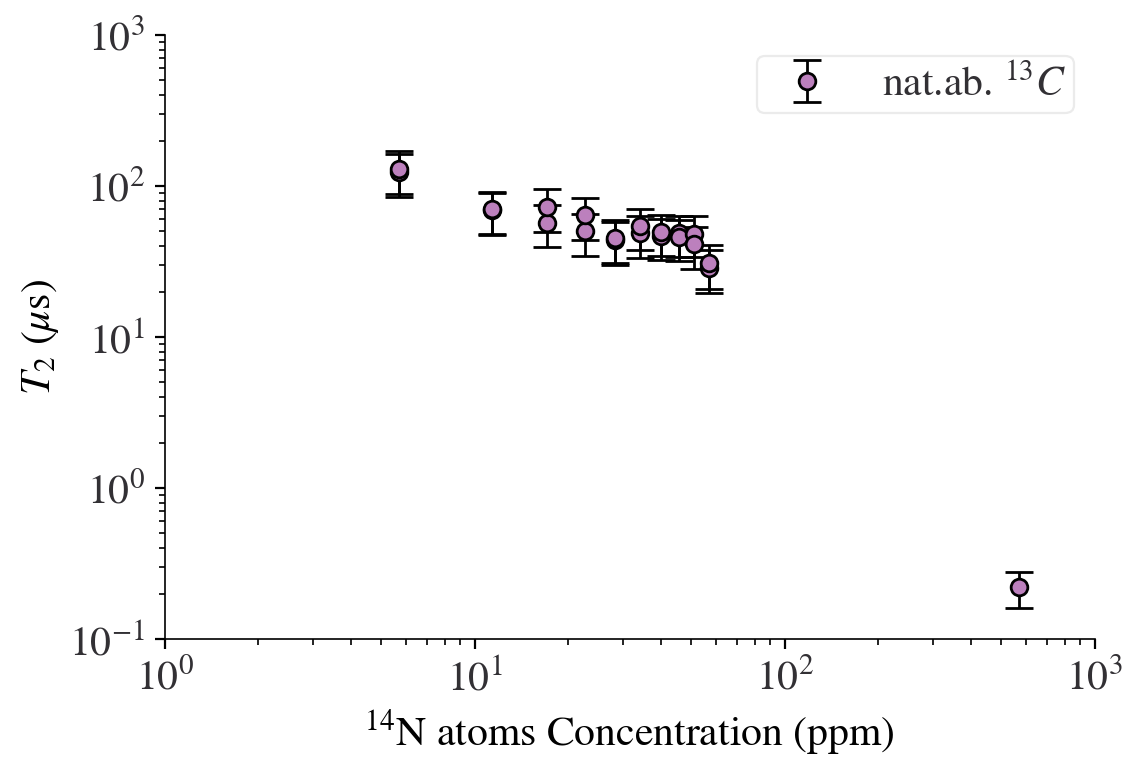

In [4]:
plt.style.use('plot_style.txt')
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
# mpl.rcParams['xtick.labelsize'] = 15

T2_percenterror = 0.26046
data = pd.read_csv('self_datapoints_T2_mix_conc_rand.csv')
conc_rand = data['conc_rand']
T2_hahn_rand = data['T2_hahn_rand']
T2_err_hahn_rand = data['T2_err_hahn_rand']

def linear(x, m, c):
    y = m*x + c
    return y


print(data)

T2_trueerr_hahn_rand = np.multiply( np.add( np.divide( T2_err_hahn_rand,T2_hahn_rand ),T2_percenterror ),T2_hahn_rand )

fit,var = curve_fit(linear, np.log(conc_rand[0:20]), np.log(T2_hahn_rand[0:20][0:20]), sigma=T2_trueerr_hahn_rand[0:20])
m_fit = fit[0]
c_fit = fit[1]
m_fit_err = np.sqrt(var[0][0])
c_fit_err = np.sqrt(var[1][1])

print( 'gradient =', m_fit, '$\pm$', m_fit_err)

X = np.linspace(5,2000, 100)
Y = np.exp(c_fit)*(X**(m_fit)) 

plt.figure()
# plt.plot(X,Y, 'k')
plt.errorbar(conc_rand[0:21], T2_hahn_rand[0:21], yerr=T2_trueerr_hahn_rand[0:21], fmt='o', ecolor='k', elinewidth=1, capsize=5, label='nat.ab. $^{13}C$')
plt.xlabel('$^{14}$N atoms Concentration (ppm)')
plt.ylabel('$T_2$ ($\mu$s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

outpath = 'self_atomnumb_T2_mix_conc_rand.png'
plt.savefig(outpath)


Bad key "axes.titlelocation" on line 28 in
plot_style.txt.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


    Unnamed: 0  num  T2_H_near  T2_err_H_near  T2_H_mid  T2_err_H_mid  \
0            0   10   0.762830       0.002281  0.554733      0.016013   
1            1   30   0.761281       0.002300  0.553718      0.015967   
2            2   50   0.755446       0.002302  0.548978      0.015794   
3            3   70   0.737825       0.002533  0.540712      0.015453   
4            4   90   0.733288       0.002642  0.537556      0.015309   
5            5  110   0.717804       0.002920  0.528401      0.014930   
6            6  130   0.704630       0.003240  0.518224      0.014482   
7            7  150   0.696467       0.003374  0.513134      0.014257   
8            8  170   0.680503       0.003711  0.498538      0.013583   
9            9  190   0.666059       0.003824  0.489563      0.013221   
10          10  210   0.649302       0.004068  0.473902      0.012524   
11          11  230   0.638208       0.004237  0.466416      0.012176   
12          12  250   0.631455       0.004323  0.46

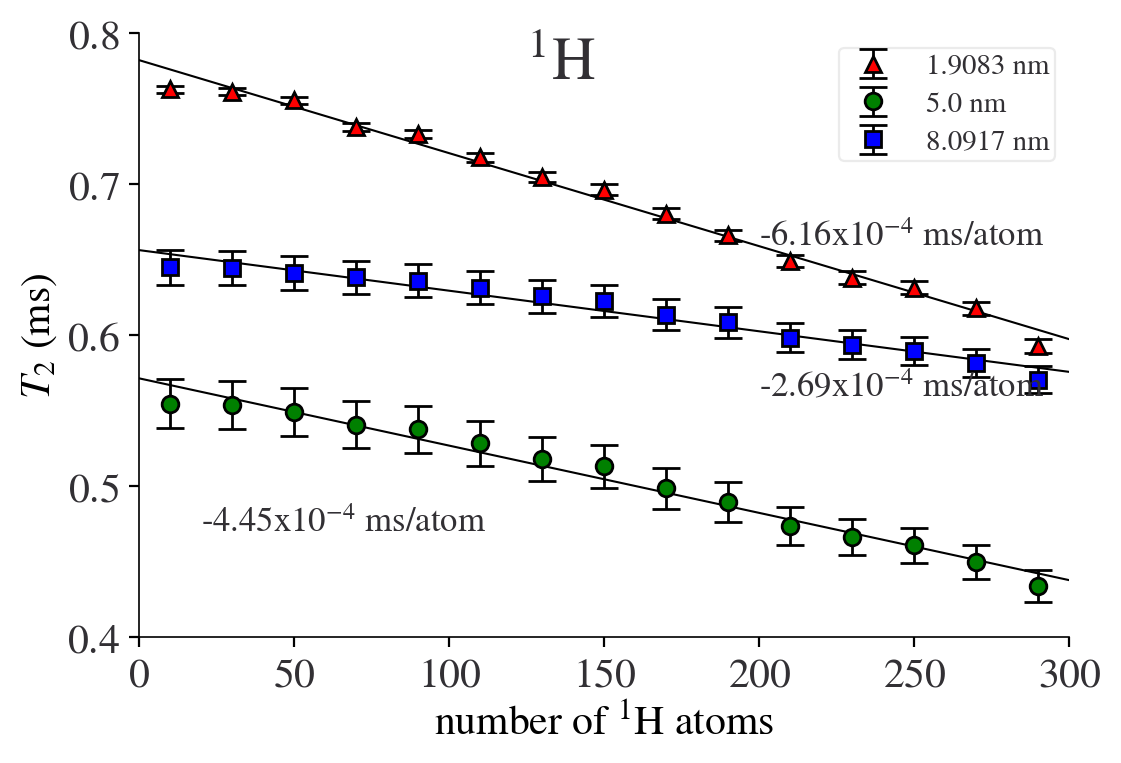

In [2]:
plt.style.use('plot_style.txt')
# mpl.rcParams['figure.figsize'] = [12.0, 8.0]
# mpl.rcParams['xtick.labelsize'] = 15

data = pd.read_csv('Nuclear Spins\datapoints_T2_H.csv')
print(data)
num = data['num']
T2_H_near = data['T2_H_near']
T2_err_H_near = data['T2_err_H_near']
T2_H_mid = data['T2_H_mid']
T2_err_H_mid = data['T2_err_H_mid']
T2_H_far = data['T2_H_far']
T2_err_H_far = data['T2_err_H_far']

fit_near = np.polyfit(num, T2_H_near, 1)
print(fit_near)
fit_mid = np.polyfit(num, T2_H_mid, 1)
print(fit_mid)
fit_far = np.polyfit(num, T2_H_far, 1)
print(fit_far)

X = np.linspace(0,300,100)
Y_near = fit_near[0]*X + fit_near[1]
Y_mid  = fit_mid[0]*X  + fit_mid[1]
Y_far = fit_far[0]*X + fit_far[1]

plt.figure()
plt.plot(X,Y_near, 'k',linewidth=0.75)
plt.plot(X,Y_mid, 'k',linewidth=0.75)
plt.plot(X,Y_far, 'k',linewidth=0.75)
plt.errorbar(num, T2_H_near, yerr=T2_err_H_near, fmt='r^', ecolor='k', elinewidth=1, capsize=5, label='1.9083 nm')
plt.errorbar(num, T2_H_mid, yerr=T2_err_H_mid, fmt='go', ecolor='k', elinewidth=1, capsize=5, label='5.0 nm')
plt.errorbar(num, T2_H_far, yerr=T2_err_H_far, fmt='bs', ecolor='k', elinewidth=1, capsize=5, label='8.0917 nm')
plt.xlabel('number of $^{1}$H atoms')
plt.ylabel('$T_2$ (ms)')
# plt.yscale('log')
# plt.xscale('log')
plt.ylim(0.4,0.8)
plt.xlim(0,300)
plt.text(125,0.77,r'$^{1}$H', fontsize='x-large')
plt.text(200,0.66,r'-6.16x10$^{-4}$ ms/atom', fontsize='small')
plt.text(20,0.47,r'-4.45x10$^{-4}$ ms/atom', fontsize='small')
plt.text(200,0.56, r'-2.69x10$^{-4}$ ms/atom', fontsize='small')
plt.legend(loc='best',fontsize='x-small')

outpath = 'Nuclear Spins\datapoints_T2_H.png'
plt.savefig(outpath)

   Unnamed: 0         num  T2_F_near  T2_err_F_near  T2_F_mid  T2_err_F_mid  \
0           0   10.000000   0.762855       0.002280  0.554747      0.016013   
1           1   51.428571   0.756841       0.002303  0.550097      0.015839   
2           2   92.857143   0.738144       0.002574  0.540206      0.015423   
3           3  134.285714   0.715860       0.003042  0.525457      0.014803   
4           4  175.714286   0.692913       0.003491  0.508125      0.014025   
5           5  217.142857   0.665817       0.003905  0.487485      0.013132   
6           6  258.571429   0.648744       0.004162  0.473357      0.012487   
7           7  300.000000   0.614334       0.004479  0.449206      0.011382   

   T2_F_far  T2_err_F_far  
0  0.644909      0.011346  
1  0.641965      0.011253  
2  0.637623      0.011101  
3  0.629469      0.010818  
4  0.619738      0.010476  
5  0.607450      0.010077  
6  0.598328      0.009770  
7  0.580780      0.009196  
[-5.23005604e-04  7.80504457e-01]
[-

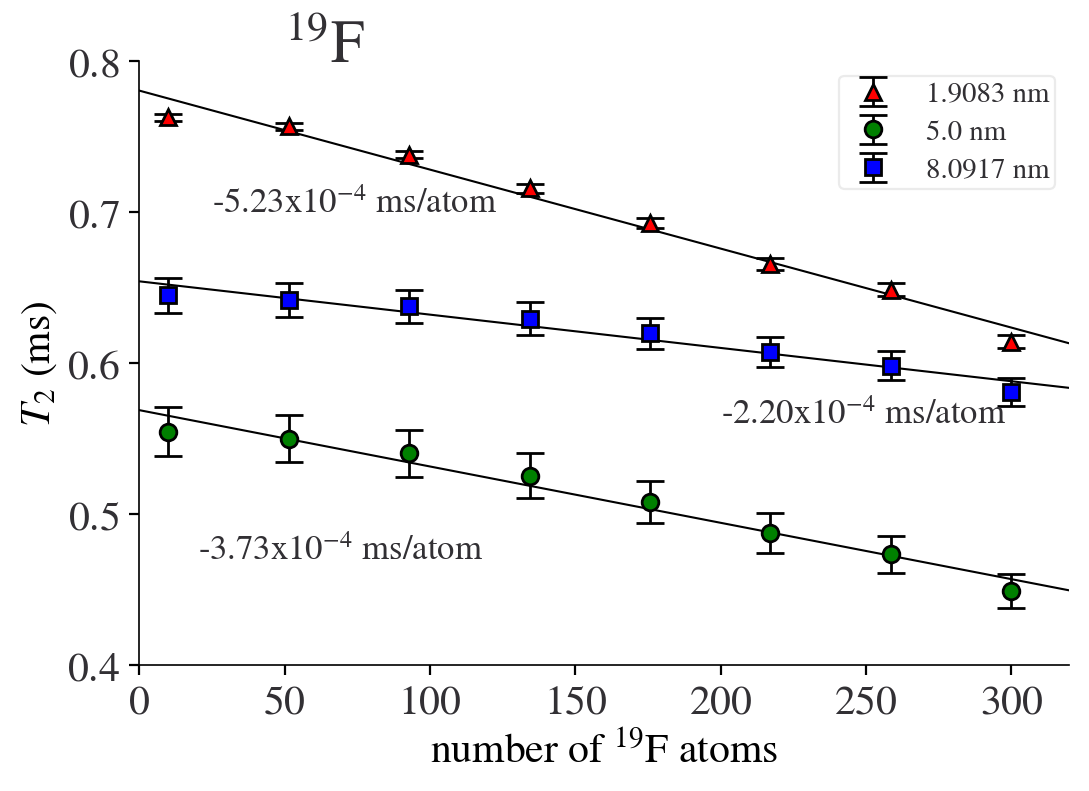

In [9]:
data = pd.read_csv('Nuclear Spins\datapoints_T2_F_short')
print(data)
num = data['num']
T2_F_near = data['T2_F_near']
T2_err_F_near = data['T2_err_F_near']
T2_F_mid = data['T2_F_mid']
T2_err_F_mid = data['T2_err_F_mid']
T2_F_far = data['T2_F_far']
T2_err_F_far = data['T2_err_F_far']

fit_near = np.polyfit(num, T2_F_near, 1)
print(fit_near)
fit_mid = np.polyfit(num, T2_F_mid, 1)
print(fit_mid)
fit_far = np.polyfit(num, T2_F_far, 1)
print(fit_far)

X = np.linspace(0,320,100)
Y_near = fit_near[0]*X + fit_near[1]
Y_mid  = fit_mid[0]*X  + fit_mid[1]
Y_far = fit_far[0]*X + fit_far[1]

plt.figure()
plt.plot(X,Y_near, 'k',linewidth=0.75)
plt.plot(X,Y_mid, 'k',linewidth=0.75)
plt.plot(X,Y_far, 'k',linewidth=0.75)
plt.errorbar(num, T2_F_near, yerr=T2_err_F_near, fmt='r^', ecolor='k', elinewidth=1, capsize=5, label='1.9083 nm')
plt.errorbar(num, T2_F_mid, yerr=T2_err_F_mid, fmt='go', ecolor='k', elinewidth=1, capsize=5, label='5.0 nm')
plt.errorbar(num, T2_F_far, yerr=T2_err_F_far, fmt='bs', ecolor='k', elinewidth=1, capsize=5, label='8.0917 nm')
plt.xlabel('number of $^{19}$F atoms')
plt.ylabel('$T_2$ (ms)')
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(0.50,0.85)
plt.xlim(0,320)
plt.text(50,0.8,r'$^{19}$F', fontsize='x-large')
plt.legend(loc='best',fontsize='x-small')

plt.text(25,0.7,r'-5.23x10$^{-4}$ ms/atom', fontsize='small')
plt.text(20,0.47,r'-3.73x10$^{-4}$ ms/atom', fontsize='small')
plt.text(200,0.56, r'-2.20x10$^{-4}$ ms/atom', fontsize='small')

outpath = 'Nuclear Spins\datapoints_T2_F.png'
plt.savefig(outpath)

    Unnamed: 0  num  T2_P_near  T2_err_P_near  T2_P_mid  T2_err_P_mid  \
0            0   10   0.762913       0.002280  0.554779      0.016015   
1            1   30   0.762905       0.002280  0.554784      0.016015   
2            2   50   0.762628       0.002281  0.554652      0.016010   
3            3   70   0.762390       0.002284  0.554569      0.016006   
4            4   90   0.762361       0.002284  0.554554      0.016005   
5            5  110   0.761901       0.002290  0.554448      0.016003   
6            6  130   0.761781       0.002291  0.554418      0.016027   
7            7  150   0.761656       0.002293  0.554368      0.016024   
8            8  170   0.761473       0.002295  0.554249      0.016026   
9            9  190   0.761025       0.002300  0.553988      0.016016   
10          10  210   0.760583       0.002305  0.553671      0.016012   
11          11  230   0.760339       0.002309  0.553552      0.016016   
12          12  250   0.760115       0.002310  0.55

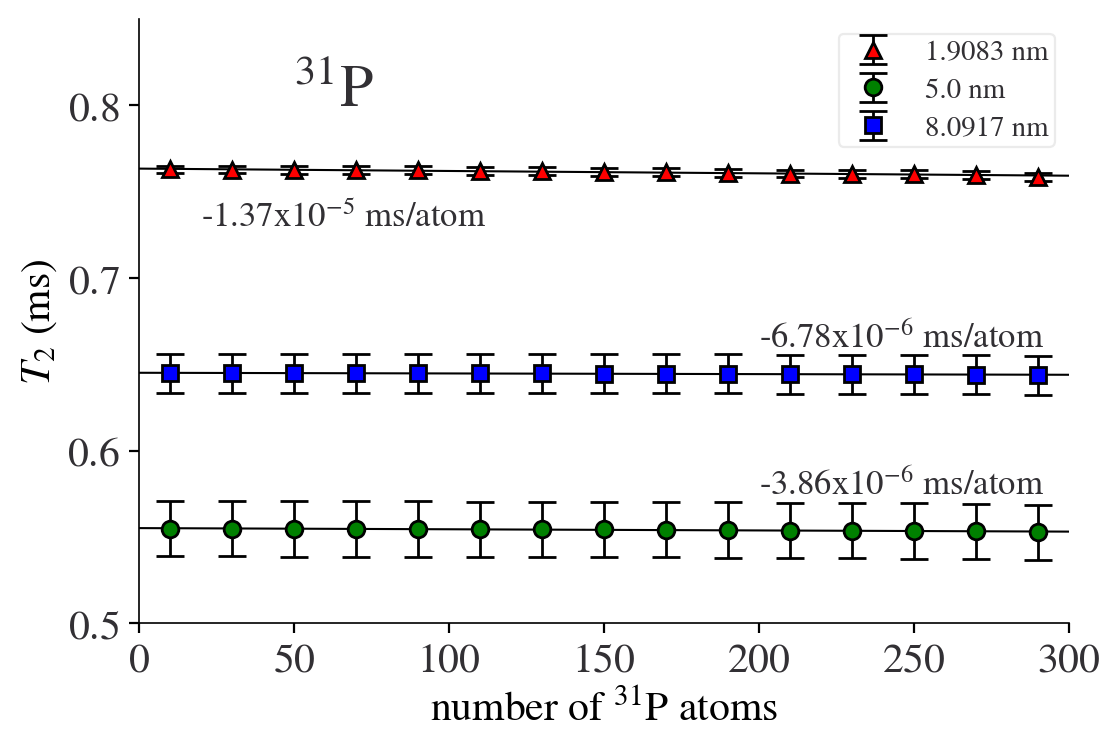

In [121]:
mpl.rcParams['figure.figsize'] = [6.0, 4.0]

data = pd.read_csv('Nuclear Spins\datapoints_T2_P.csv')
print(data)
num = data['num']
T2_P_near = data['T2_P_near']
T2_err_P_near = data['T2_err_P_near']
T2_P_mid = data['T2_P_mid']
T2_err_P_mid = data['T2_err_P_mid']
T2_P_far = data['T2_P_far']
T2_err_P_far = data['T2_err_P_far']

fit_near = np.polyfit(num, T2_P_near, 1)
print(fit_near)
fit_mid = np.polyfit(num, T2_P_mid, 1)
print(fit_mid)
fit_far = np.polyfit(num, T2_P_far, 1)
print(fit_far)

X = np.linspace(0,300,100)
Y_near = fit_near[0]*X + fit_near[1]
Y_mid  = fit_mid[0]*X  + fit_mid[1]
Y_far = fit_far[0]*X + fit_far[1]

plt.figure()
plt.plot(X,Y_near, 'k',linewidth=0.75)
plt.plot(X,Y_mid, 'k',linewidth=0.75)
plt.plot(X,Y_far, 'k',linewidth=0.75)
plt.errorbar(num, T2_P_near, yerr=T2_err_P_near, fmt='r^', ecolor='k', elinewidth=1, capsize=5, label='1.9083 nm')
plt.errorbar(num, T2_P_mid, yerr=T2_err_P_mid, fmt='go', ecolor='k', elinewidth=1, capsize=5, label='5.0 nm')
plt.errorbar(num, T2_P_far, yerr=T2_err_P_far, fmt='bs', ecolor='k', elinewidth=1, capsize=5, label='8.0917 nm')
plt.xlabel('number of $^{31}$P atoms')
plt.ylabel('$T_2$ (ms)')
# plt.yscale('log')
# plt.xscale('log')
plt.ylim(0.50,0.85)
plt.xlim(0,300)
plt.text(50,0.8,r'$^{31}$P', fontsize='x-large')
plt.text(20,0.73,r'-1.37x10$^{-5}$ ms/atom', fontsize='small')
plt.text(200,0.66,r'-6.78x10$^{-6}$ ms/atom', fontsize='small')
plt.text(200,0.575, r'-3.86x10$^{-6}$ ms/atom', fontsize='small')
plt.legend(loc='best', fontsize='x-small')

outpath = 'Nuclear Spins\datapoints_T2_P.png'
plt.savefig(outpath)

<Figure size 1200x1600 with 0 Axes>

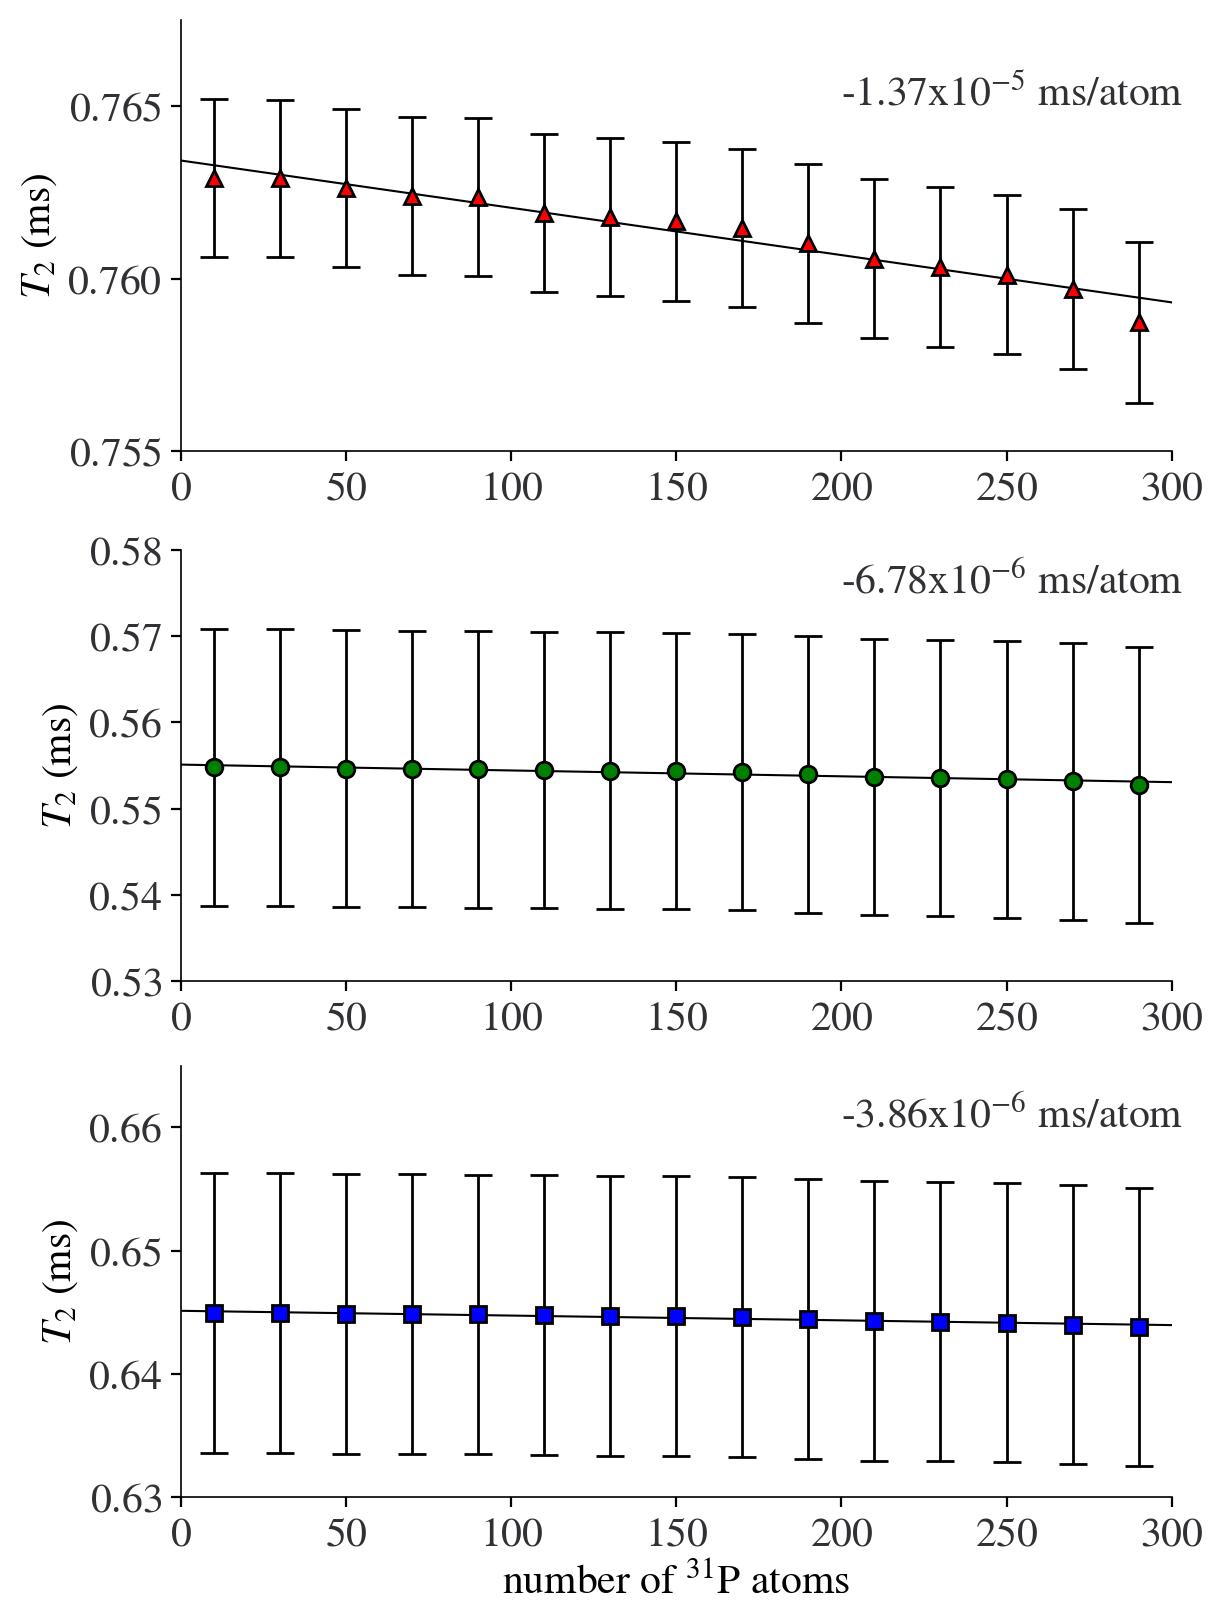

In [122]:
mpl.rcParams['figure.figsize'] = [6.0, 8.0]

plt.figure()
fig, axes = plt.subplots(3,1, constrained_layout = True)

axes[0].plot(X,Y_near, 'k',linewidth=0.75)
axes[0].errorbar(num, T2_P_near, yerr=T2_err_P_near, fmt='r^', ecolor='k', elinewidth=1, capsize=5)
# axes[0].set_xlabel('number of $^{31}$P')
axes[0].set_ylabel('$T_2$ (ms)')
axes[0].set_xlim(0,300)
axes[0].set_ylim(0.755,0.7675)
axes[0].text(200,0.765,r'-1.37x10$^{-5}$ ms/atom')
# axes[0].legend()

axes[1].plot(X,Y_mid, 'k',linewidth=0.75)
axes[1].errorbar(num, T2_P_mid, yerr=T2_err_P_mid, fmt='go', ecolor='k', elinewidth=1, capsize=5)
# axes[1].set_xlabel('number of $^{31}$P')
axes[1].set_ylabel('$T_2$ (ms)')
axes[1].set_xlim(0,300)
axes[1].set_ylim(0.53,0.58)
axes[1].text(200,0.575,r'-6.78x10$^{-6}$ ms/atom')
# axes[1].legend()

axes[2].plot(X,Y_far, 'k',linewidth=0.75)
axes[2].errorbar(num, T2_P_far, yerr=T2_err_P_far, fmt='bs', ecolor='k', elinewidth=1, capsize=5)
# axes[2].set_xlabel('[$^{31}$P]')
axes[2].set_xlabel('number of $^{31}$P atoms')
axes[2].set_ylabel('$T_2$ (ms)')
axes[2].set_xlim(0,300)
axes[2].set_ylim(0.63,0.665)
axes[2].text(200,0.66, r'-3.86x10$^{-6}$ ms/atom')
# axes[2].legend()

outpath = 'Nuclear Spins\datapoints_T2_P_magnified.png'
plt.savefig(outpath)

    Unnamed: 0     depth   T2_H_10  T2_err_H_10   T2_H_50  T2_err_H_50  \
0            0  1.908289  0.762830     0.002281  0.755446     0.002302   
1            1  2.526631  0.795195     0.002650  0.786125     0.002523   
2            2  3.144974  0.751024     0.005792  0.743324     0.005647   
3            3  3.763316  0.720704     0.010123  0.712976     0.009916   
4            4  4.381658  0.568214     0.023908  0.560758     0.023599   
5            5  5.000000  0.554733     0.016013  0.548978     0.015794   
6            6  5.618342  0.581026     0.014712  0.575359     0.014450   
7            7  6.236684  0.659372     0.019980  0.652347     0.019719   
8            8  6.855026  0.593215     0.018674  0.585878     0.018390   
9            9  7.473369  0.628156     0.016705  0.622629     0.016489   
10          10  8.091711  0.644902     0.011346  0.641157     0.011226   

    T2_H_100  T2_err_H_100  T2_H_300  T2_err_H_300  
0   0.722230      0.002862  0.588916      0.004613  
1   0

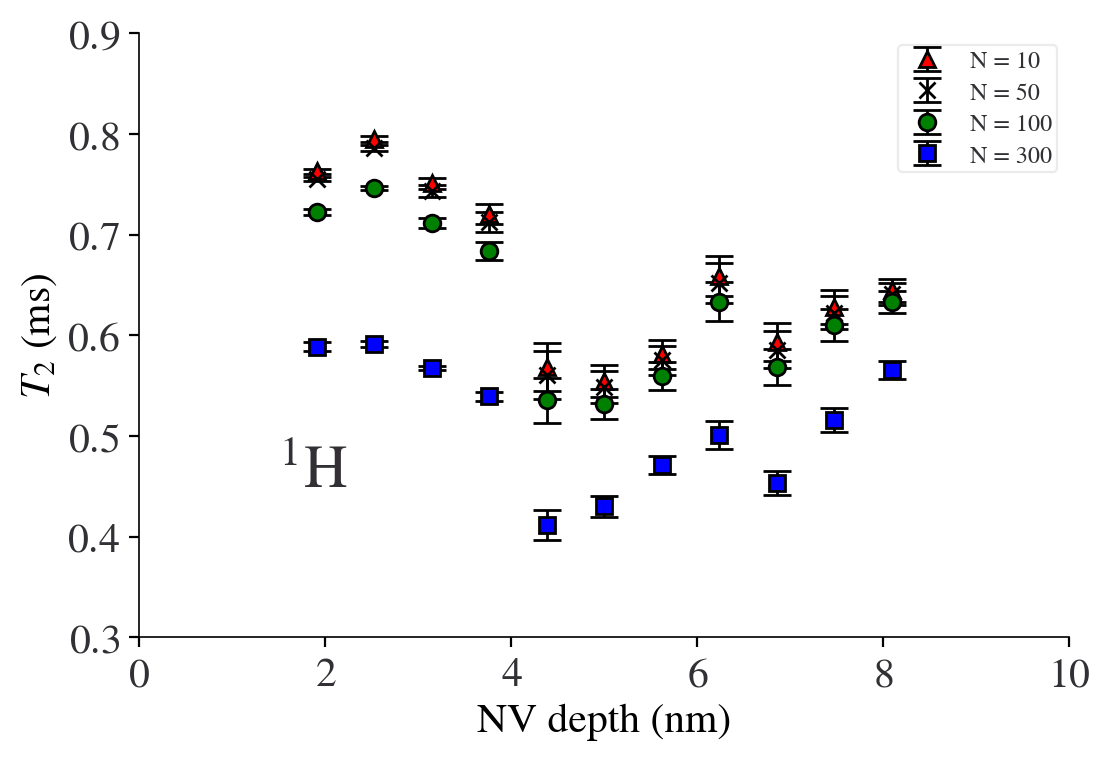

In [27]:
data = pd.read_csv('Nuclear Spins\datapoints_T2_H_depth.csv')
print(data)
depth = data['depth']
T2_H_10 = data['T2_H_10']
T2_err_H_10 = data['T2_err_H_10']
T2_H_50 = data['T2_H_50']
T2_err_H_50 = data['T2_err_H_50']
T2_H_100 = data['T2_H_100']
T2_err_H_100 = data['T2_err_H_100']
T2_H_300 = data['T2_H_300']
T2_err_H_300 = data['T2_err_H_300']

plt.figure()
# plt.plot(X,Y, 'k')
plt.errorbar(depth, T2_H_10, yerr=T2_err_H_10, fmt='r^', ecolor='k', elinewidth=1, capsize=5, label='N = 10')
plt.errorbar(depth, T2_H_50, yerr=T2_err_H_50, fmt='x', ecolor='k', elinewidth=1, capsize=5, label='N = 50')
plt.errorbar(depth, T2_H_100, yerr=T2_err_H_100, fmt='go', ecolor='k', elinewidth=1, capsize=5, label='N = 100')
plt.errorbar(depth, T2_H_300, yerr=T2_err_H_300, fmt='bs', ecolor='k', elinewidth=1, capsize=5, label='N = 300')
plt.xlabel('NV depth (nm)')
plt.ylabel('$T_2$ (ms)')
plt.text(1.5,0.45,r'$^{1}$H',fontsize='x-large')
# plt.yscale('log')
# plt.xscale('log')
plt.legend(fontsize='xx-small')

outpath = 'Nuclear Spins\datapoints_T2_H_depth.png'
plt.savefig(outpath)

    Unnamed: 0     depth   T2_P_10  T2_err_P_10   T2_P_50  T2_err_P_50  \
0            0  1.908289  0.762913     0.002280  0.762628     0.002281   
1            1  2.526631  0.795301     0.002653  0.794985     0.002649   
2            2  3.144974  0.751107     0.005794  0.750859     0.005789   
3            3  3.763316  0.720783     0.010126  0.720555     0.010120   
4            4  4.381658  0.568278     0.023911  0.568079     0.023903   
5            5  5.000000  0.554779     0.016015  0.554652     0.016010   
6            6  5.618342  0.581071     0.014715  0.580942     0.014709   
7            7  6.236684  0.659428     0.019982  0.659440     0.019965   
8            8  6.855026  0.593267     0.018677  0.593118     0.018670   
9            9  7.473369  0.628192     0.016706  0.628085     0.016702   
10          10  8.091711  0.644924     0.011346  0.644856     0.011344   

    T2_P_100  T2_err_P_100  T2_P_300  T2_err_P_300  
0   0.762247      0.002285  0.758622      0.002332  
1   0

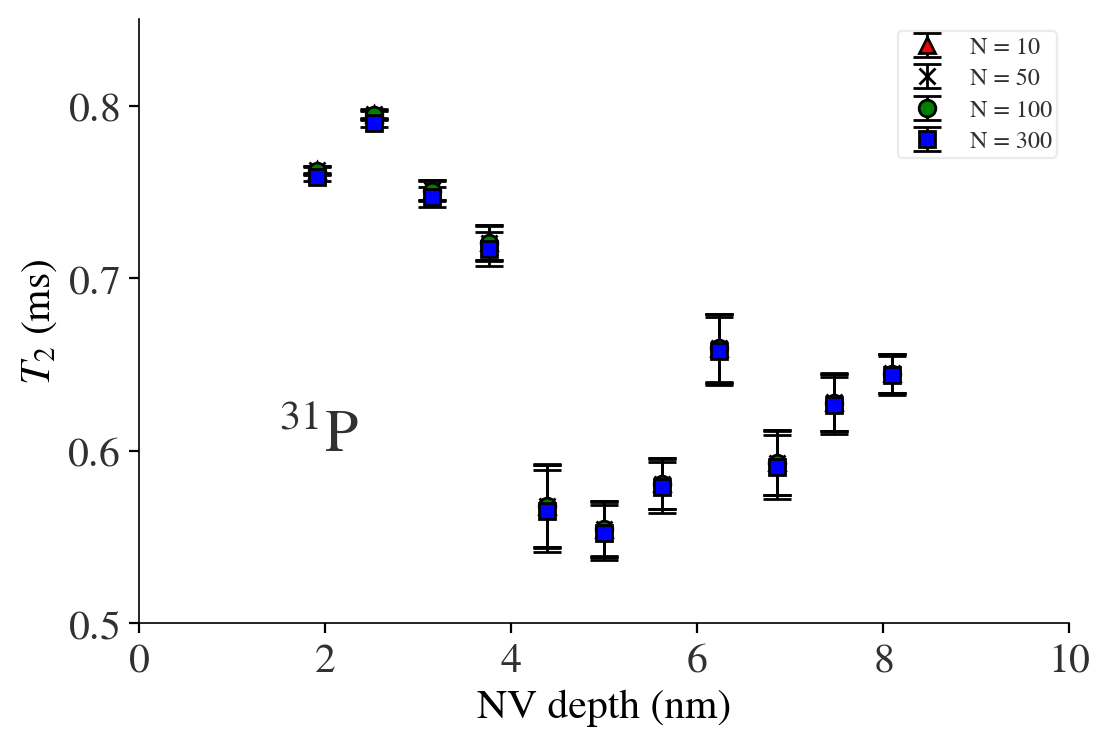

In [28]:
data = pd.read_csv('Nuclear Spins\datapoints_T2_P_depth.csv')
print(data)
depth = data['depth']
T2_P_10 = data['T2_P_10']
T2_err_P_10 = data['T2_err_P_10']
T2_P_50 = data['T2_P_50']
T2_err_P_50 = data['T2_err_P_50']
T2_P_100 = data['T2_P_100']
T2_err_P_100 = data['T2_err_P_100']
T2_P_300 = data['T2_P_300']
T2_err_P_300 = data['T2_err_P_300']

plt.figure()
# plt.plot(X,Y, 'k')
plt.errorbar(depth, T2_P_10, yerr=T2_err_P_10, fmt='r^', ecolor='k', elinewidth=1, capsize=5, label='N = 10')
plt.errorbar(depth, T2_P_50, yerr=T2_err_P_50, fmt='x', ecolor='k', elinewidth=1, capsize=5, label='N = 50')
plt.errorbar(depth, T2_P_100, yerr=T2_err_P_100, fmt='go', ecolor='k', elinewidth=1, capsize=5, label='N = 100')
plt.errorbar(depth, T2_P_300, yerr=T2_err_P_300, fmt='bs', ecolor='k', elinewidth=1, capsize=5, label='N = 300')
plt.xlabel('NV depth (nm)')
plt.ylabel('$T_2$ (ms)')
plt.text(1.5,0.6,r'$^{31}$P',fontsize='x-large')
# plt.yscale('log')
# plt.xscale('log')
plt.legend(fontsize='xx-small')

outpath = 'Nuclear Spins\datapoints_T2_P_depth.png'
plt.savefig(outpath)